In [1]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
from IPython.display import Image
import glob
import pandas as pd
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt

### Choose problem number

In [2]:
pb_num_list=['2A','2B','2C','2D','2E','2F','2G','2H','2I','2K','2J','2L','2M','2O','2P']


## Import OpenMC data

In [3]:
def import_output(pb_num):
    sp_file='/Users/pablogarcia44/repo/Garcia_OpenSn/benchmark/power/'+pb_num+'/sp_'+pb_num+'.h5'
    sm_file='/Users/pablogarcia44/repo/Garcia_OpenSn/benchmark/power/'+pb_num+'/sm_'+pb_num+'.h5'
    sm=openmc.Summary(sm_file)
    sp = openmc.StatePoint(sp_file)
    sp.link_with_summary(sm)
    model=openmc.model.Model
    model_file='/Users/pablogarcia44/repo/Garcia_OpenSn/benchmark/power/'+pb_num+'/model_'+pb_num+'.xml'
    model=openmc.model.Model.from_model_xml(model_file)
    return(model,sp,sm)

In [4]:
import_dict={}
for pb_num in pb_num_list:
        import_dict[pb_num]=[import_output(pb_num)[0],import_output(pb_num)[1],import_output(pb_num)[2]]

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=2.
  warn(msg, IDWarning)
/opt/a

## Keff

### Create keff dict 

In [5]:
keff_dict_vera = {}
keff_dict_vera['2A'] = 1.182175 
keff_dict_vera['2B'] = 1.183360
keff_dict_vera['2C'] = 1.173751
keff_dict_vera['2D'] = 1.165591
keff_dict_vera['2E'] = 1.069627
keff_dict_vera['2F'] = 0.976018
keff_dict_vera['2G'] = 0.847695
keff_dict_vera['2H'] = 0.788221
keff_dict_vera['2I'] = 1.179916 
keff_dict_vera['2J'] = 0.975193
keff_dict_vera['2K'] = 1.020063
keff_dict_vera['2L'] = 1.018915
keff_dict_vera['2M'] = 0.938796
keff_dict_vera['2N'] = 0.869615
keff_dict_vera['2O'] = 1.047729
keff_dict_vera['2P'] = 0.927410

keff_dict_opensn = {}
keff_dict_opensn['2A'] = 1.181466 
keff_dict_opensn['2B'] = 1.182488
keff_dict_opensn['2C'] = 1.173076
keff_dict_opensn['2D'] = 1.165284
keff_dict_opensn['2E'] = 1.068218
keff_dict_opensn['2F'] = 0.9742859
keff_dict_opensn['2G'] = 0.8457557
keff_dict_opensn['2H'] = 0.7863832
keff_dict_opensn['2I'] = 1.179916 
keff_dict_opensn['2J'] = 0.9743485
keff_dict_opensn['2K'] = 1.01844
keff_dict_opensn['2L'] = 1.017079
keff_dict_opensn['2M'] = 0.9367086
keff_dict_opensn['2N'] = 0.869615
keff_dict_opensn['2O'] = 1.046489
keff_dict_opensn['2P'] = 0.9259781


keff_dict_paper = {}
keff_dict_paper['2A'] = -13.3
keff_dict_paper['2B'] = -23.2
keff_dict_paper['2C'] = 15.7
keff_dict_paper['2D'] = 50.8
keff_dict_paper['2E'] = -79.1
keff_dict_paper['2F'] = -124.6
keff_dict_paper['2G'] = -169.5
keff_dict_paper['2H'] = -187.8
keff_dict_paper['2I'] = -32.7 
keff_dict_paper['2J'] = -118.5
keff_dict_paper['2K'] = -112.7
keff_dict_paper['2L'] = -85.3
keff_dict_paper['2M'] = -64.6
keff_dict_paper['2N'] = -188.8
keff_dict_paper['2O'] = -74.5
keff_dict_paper['2P'] = -73.4

def create_dict_openmc():
    keff_dict_openmc = {}
    for pb_num in pb_num_list:
        keff_dict_openmc[pb_num] = import_output(pb_num)[1].k_combined.nominal_value
    return(keff_dict_openmc)

keff_dict_openmc=create_dict_openmc()




/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=2.
  warn(msg, IDWarning)
/opt/a

### Plot keff 

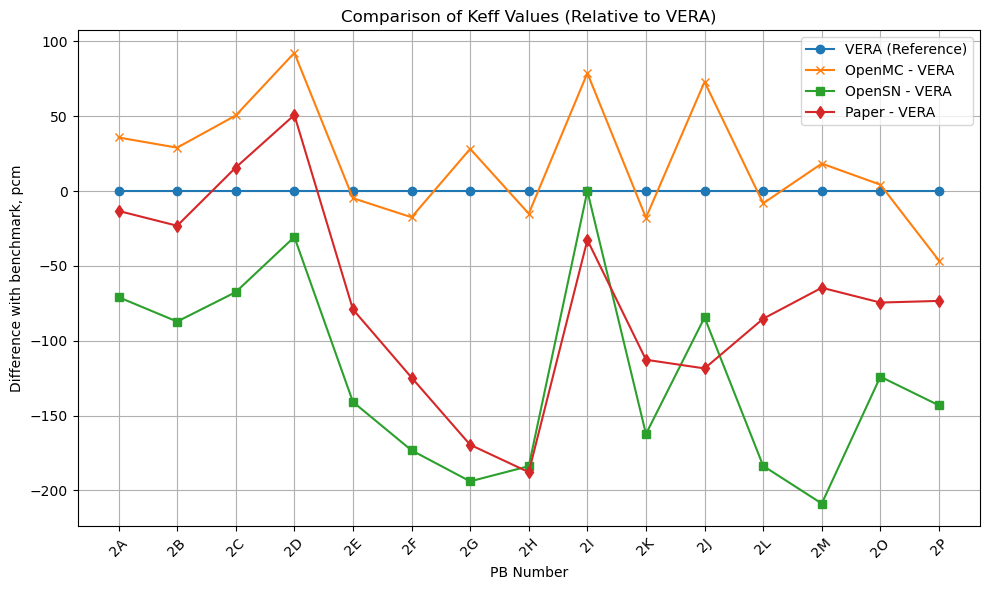

In [6]:
import matplotlib.pyplot as plt

def plot_keff_dicts(pb_num_list, keff_dict_vera, keff_dict_openmc, keff_dict_opensn, keff_dict_paper):
    # Calculate differences and multiply by 1e5 for OpenMC and OpenSN
    openmc_diff = [(keff_dict_openmc[key] - keff_dict_vera[key]) * 1e5 for key in pb_num_list]
    opensn_diff = [(keff_dict_opensn[key] - keff_dict_vera[key]) * 1e5 for key in pb_num_list]
    vera_diff = [0] * len(pb_num_list)  # Reference values (VERA - VERA = 0)
    
    # Paper differences (already a difference, so no multiplication)
    paper_diff = [keff_dict_paper[key] for key in pb_num_list]
    
    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.plot(pb_num_list, vera_diff, label='VERA (Reference)', marker='o')
    plt.plot(pb_num_list, openmc_diff, label='OpenMC - VERA', marker='x')
    plt.plot(pb_num_list, opensn_diff, label='OpenSN - VERA', marker='s')
    plt.plot(pb_num_list, paper_diff, label='Paper - VERA', marker='d')
    
    # Adding labels and title
    plt.xlabel('PB Number')
    plt.ylabel('Difference with benchmark, pcm')
    plt.title('Comparison of Keff Values (Relative to VERA)')
    plt.legend()
    
    # Show grid and plot
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_keff_dicts(pb_num_list, keff_dict_vera, keff_dict_openmc, keff_dict_opensn, keff_dict_paper)


## Power Map

### Create power map for OpenMc

In [7]:
def get_tally(pb_num,tally_name):
    sp_tally=import_dict[pb_num][1].tallies
    for index, tally in enumerate(sp_tally):
        if index==0:
            t_power=sp_tally[tally]
    tally_power_reshaped =t_power.get_reshaped_data()
    if tally_name=='fission':
        return(np.array(tally_power_reshaped)[:, 0, 0])
        print('ok')
    if tally_name=='nu-fission':
        return(np.array(tally_power_reshaped)[:, 0, 1])
    if tally_name=='kappa-fission':
        return(np.array(tally_power_reshaped)[:, 0, 2])        

    

In [8]:
import numpy as np

def normal_shape(pb_num, tally_name):
    # Get the tally based on pb_num and tally_name
    tally = get_tally(pb_num, tally_name)
    
    # Convert the tally to a numpy array and reshape it
    tally_array = (np.array(tally).reshape((17, 17)))[-9:, :9]
    
    # Apply specific modifications to elements of the array
    tally_array[0, :] *= 2
    tally_array[:, -1] *= 2
    
    # Create a mask for non-zero values
    mask = tally_array > 0
    
    # Compute the sum considering only non-zero values
    sum_non_zero = np.sum(tally_array[mask])
    
    # Print debugging information
    # print("Modified Tally Array:\n", tally_array)
    # print("Mask:\n", mask)
    # print("Sum of non-zero values:", sum_non_zero)
    
    # Handle the case where sum_non_zero is zero to avoid division by zero
    if sum_non_zero == 0:
        # print("All values are zero or there are no non-zero values.")
        return np.zeros_like(tally_array)  # Return a zero array
    
    # Normalize the array so that the sum of all non-zero values equals 100%
    normalized_tally = np.where(mask, tally_array / sum_non_zero * 100, 0)
    
    # Calculate the average of the normalized values
    average_normalized = np.mean(normalized_tally[mask])
    
    # Adjust values so that the average is 1 (original units)
    if average_normalized != 0:
        adjustment_factor = 1 / average_normalized
    else:
        adjustment_factor = 0
    
    adjusted_tally = np.where(mask, normalized_tally * adjustment_factor, 0)
    
    # Print adjusted array for debugging
    # print("Adjusted Tally Array (with average = 1):\n", adjusted_tally)
    
    return adjusted_tally


### Create power map for benchmark

In [9]:
GT=[(5,2),(8,2),(3,3),(2,5),(5,5),(8,5),(2,8),(5,8)]
IT=[(8,8)]

In [10]:
A2=[1.0364, 1.0089, 
1.0371, 1.0093, 1.0104, 
1.0368, 1.0386, 
1.0353, 1.0089, 1.0118, 1.0451, 1.0313,
1.0328, 1.0053, 1.0089, 1.0458, 1.0516, 
1.0266, 1.0281, 1.0360, 1.0180, 0.9736, 
1.0122, 0.9880, 0.9880, 1.0115, 0.9837, 0.9649, 0.9483, 0.9389, 
0.9764, 0.9721, 0.9714, 0.9739, 0.9645, 0.9551, 0.9458, 0.9418, 0.9476]

B2=[1.0355, 1.0113,
1.0362, 1.0113, 1.0121, 
1.0359, 1.0373, 
1.0337, 1.0099, 1.0124, 1.0424, 1.0308, 
1.0308, 1.0066, 1.0095, 1.0427, 1.0474, 
1.0243, 1.0258, 1.0326, 1.0146, 0.9745, 
1.0103, 0.9893, 0.9893, 1.0099, 0.9839, 0.9666, 0.9503, 0.9406, 
0.9781, 0.9742, 0.9738, 0.9752, 0.9662, 0.9565, 0.9475, 0.9435, 0.9478]

C2=[1.0357, 1.0109, 
1.0364, 1.0113, 1.0124, 
1.0364, 1.0375, 
1.0346, 1.0102, 1.0124, 1.0422, 1.0306, 
1.0306, 1.0066, 1.0095, 1.0426, 1.0473, 
1.0248, 1.0259, 1.0324, 1.0150, 0.9738, 
1.0102, 0.9891, 0.9891, 1.0102, 0.9840, 0.9666, 0.9494, 0.9411, 
0.9782, 0.9742, 0.9738, 0.9753, 0.9658, 0.9564, 0.9476, 0.9433, 0.9476 ]

D2=[1.0360, 1.0115, 
1.0364, 1.0119, 1.0122, 
1.0364, 1.0379, 
1.0342, 1.0100, 1.0122, 1.0426, 1.0313, 
1.0305, 1.0067, 1.0097, 1.0419, 1.0474, 
1.0243, 1.0258, 1.0327, 1.0148, 0.9741, 
1.0111, 0.9895, 0.9891, 1.0100, 0.9836, 0.9657, 0.9499, 0.9404, 
0.9785, 0.9741, 0.9737, 0.9752, 0.9664, 0.9565, 0.9474, 0.9426, 0.9477]

E2=[1.0170, 0.9930, 
0.9299, 0.9635, 0.9962, 
0.9331, 1.0250, 
0.9347, 0.9695, 1.0022, 1.0362, 1.0290, 
1.0290, 1.0034, 0.9751, 0.9523, 1.0226, 
1.0350, 0.9419, 0.9579, 1.0426, 1.0314, 
1.0578, 1.0222, 0.9763, 0.9355, 0.9787, 1.0146, 1.0246, 1.0290, 
1.0346, 1.0238, 1.0054, 0.9938, 1.0054, 1.0218, 1.0314, 1.0398, 1.0514]

F2=[1.0783, 1.0428, 
0.9714, 0.9907, 0.9736, 
0.9333, 0.9262, 
0.9258, 0.9591, 0.9543, 0.9118, 0.9262, 
0.9280, 0.9617, 0.9587, 0.9127, 0.9070, 
0.9420, 0.9411, 0.9350, 0.9670, 1.0340, 
0.9744, 1.0047, 1.0060, 0.9793, 1.0191, 1.0502, 1.0831, 1.1094, 
1.0472, 1.0529, 1.0551, 1.0551, 1.0717, 1.0923, 1.1138, 1.1339, 1.1541] 

G2=[1.0732, 1.0353, 
0.9393, 0.9660, 0.9411,
0.8855, 0.8762, 
0.8736, 0.9200, 0.9138, 0.8529, 0.8719, 
0.8784, 0.9273, 0.9212, 0.8559, 0.8507, 
0.9083, 0.9072, 0.9070, 0.9646, 1.0707, 
0.9646, 1.0058, 1.0098, 0.9778, 1.0394, 1.0944, 1.1525, 1.1999, 
1.0707, 1.0803, 1.0858, 1.0899, 1.1202, 1.1585, 1.2005, 1.2363, 1.2666]

H2=[1.0607, 1.0215, 
0.9221, 0.9481, 0.9210, 
0.8646, 0.8547, 
0.8516, 0.9001, 0.8931, 0.8311, 0.8511, 
0.8589, 0.9093, 0.9032, 0.8361, 0.8344, 
0.8952, 0.8962, 0.9022, 0.9707, 1.0905, 
0.9609, 1.0041, 1.0104, 0.9802, 1.0495, 1.1144, 1.1840, 1.2416, 
1.0751, 1.0862, 1.0943, 1.1019, 1.1405, 1.1873, 1.2384, 1.2829, 1.3188]

I2=[1.0045, 0.9929, 
1.0251, 1.0023, 1.0073, 
1.0334, 1.0367, 
1.0352, 1.0088, 1.0117, 1.0450, 1.0327, 
1.0327, 1.0070, 1.0102, 1.0457, 1.0515, 
1.0269, 1.0287, 1.0370, 1.0189, 0.9755, 
1.0128, 0.9900, 0.9903, 1.0128, 0.9856, 0.9679, 0.9513, 0.9415, 
0.9791, 0.9748, 0.9748, 0.9759, 0.9679, 0.9574, 0.9487, 0.9444, 0.9502] 

J2=[1.0415, 1.0226, 
0.9590, 0.9823, 0.9683, 
0.9305, 0.9248, 
0.9262, 0.9590, 0.9555, 0.9130, 0.9288, 
0.9288, 0.9630, 0.9595, 0.9143, 0.9086, 
0.9428, 0.9428, 0.9371, 0.9696, 1.0358, 
0.9762, 1.0060, 1.0077, 0.9805, 1.0213, 1.0529, 1.0849, 1.1121, 
1.0489, 1.0555, 1.0577, 1.0577, 1.0744, 1.0941, 1.1160, 1.1362, 1.1559]

K2=[0.9765, 1.0637, 
0.9899, 1.0055, 0.9849, 
0.9455, 0.9388, 
0.9380, 0.9690, 0.9644, 0.9237, 0.9388, 
0.9388, 0.9707, 0.9673, 0.9246, 0.9195, 
0.9510, 0.9505, 0.9476, 0.9807, 1.0495, 
0.9811, 1.0105, 1.0122, 0.9874, 1.0285, 1.0645, 1.1073, 1.0159, 
1.0524, 1.0578, 1.0608, 1.0620, 1.0813, 1.1098, 1.0147, 1.0453, 1.0687]

L2=[0.9481, 0.9967, 
1.0328, 1.0001, 0.9313,
0.9556, 1.0286, 
0.9606, 1.0093, 1.0106, 0.9409, 0.9816, 
1.0475, 1.0219, 1.0160, 0.9405, 0.9388, 
0.9690, 1.0466, 0.9544, 1.0332, 0.9388, 
0.9644, 1.0198, 1.0273, 0.9648, 1.0152, 1.0223, 1.0093, 1.0076, 
1.0311, 1.0362, 1.0383, 1.0307, 1.0341, 1.0353, 1.0257, 1.0026, 0.9053]

M2=[0.9833, 1.0389, 
0.9846, 1.0393, 1.0389, 
0.9833, 0.9824, 
0.9828, 1.0370, 1.0361, 0.9760, 1.0206, 
0.9814, 1.0361, 1.0343, 0.9714, 0.9696, 
0.9769, 0.9778, 0.9696, 0.9659, 1.0042, 
0.9728, 1.0193, 1.0297, 0.9792, 1.0170, 1.0170, 0.9441, 1.0152, 
1.0079, 0.9432, 1.0334, 1.0288, 0.9473, 1.0325, 1.0361, 1.0306, 0.9423]

N2=[0.9756, 1.0258,
0.8993, 0.9963, 1.0209, 
0.8923, 0.9657, 
0.8697, 0.9722, 1.0057, 0.9468, 0.9557, 
0.8678, 0.9644, 0.9700, 0.8651, 0.8467, 
0.8819, 0.8831, 0.8705, 0.9111, 1.0554, 
0.9247, 1.0155, 1.0180, 0.9318, 1.0367, 1.0824, 1.1272, 1.1538, 
1.0800, 1.0928, 1.0962, 1.0923, 1.1184, 1.1459, 1.1661, 1.1602, 1.0603]

O2=[1.1049, 1.0710, 
1.0889, 1.0502, 1.0180, 
1.0408, 0.9805, 
1.0478, 0.9658, 0.2175, 0.9882, 1.0367, 
1.0726, 1.0225, 0.9772, 1.0555, 1.0812, 
1.0926, 1.0824, 1.0788, 0.9931, 0.2173, 
1.1053, 1.0779, 1.0722, 1.0918, 1.0478, 0.9931, 0.9254, 0.9641, 
1.0771, 1.0714, 1.0677, 1.0637, 1.0429, 1.0168, 0.9935, 0.9996, 1.0164]

P2=[1.1688, 1.1116, 
1.1411, 1.0530, 0.2442, 
1.1180, 1.0636, 
1.0659, 1.0821, 1.0881, 1.0627, 0.2443, 
0.2459, 1.0401, 1.0950, 1.1088, 1.0608, 
1.1148, 1.1070, 1.0807, 1.0378, 0.2431, 
1.1476, 1.1088, 1.0332, 0.2440, 1.0078, 1.0406, 1.0050, 1.0608, 
1.1337, 1.1143, 1.0641, 0.9954, 1.0438, 1.0751, 1.0821, 1.1051, 1.1300]

Q2=[1.0368, 1.0105, 
1.0371, 1.0113, 1.0120, 
1.0375, 1.0389, 
1.0353, 1.0098, 1.0124, 1.0448, 1.0331, 
1.0320, 1.0069, 1.0098, 1.0448, 1.0513, 
1.0258, 1.0273, 1.0357, 1.0160, 0.9726,
1.0113, 0.9883, 0.9879, 1.0109, 0.9828, 0.9639, 0.9468, 0.9369, 
0.9774, 0.9726, 0.9723, 0.9745, 0.9646, 0.9548, 0.9457, 0.9413, 0.9479] 

In [11]:
def map_bench(bench_list):
    bench_result=[]
    pos=[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [2, 2], [3, 2], [4, 2], [6, 2], [7, 2], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [6, 5], [7, 5], [6, 6], [7, 6], [8, 6], [7, 7], [8, 7]]
    pos.reverse()
    for k in range(len(bench_list)):
        bench_result.append([pos[k][0],pos[k][1],bench_list[k]])
    return(bench_result)

power_dict = {}
power_dict['2A'] = map_bench(A2)
power_dict['2B'] = map_bench(B2)
power_dict['2C'] = map_bench(C2)
power_dict['2D'] = map_bench(D2)
power_dict['2E'] = map_bench(E2)
power_dict['2F'] = map_bench(F2)
power_dict['2G'] = map_bench(G2)
power_dict['2H'] = map_bench(H2)
power_dict['2I'] = map_bench(I2)
power_dict['2J'] = map_bench(J2)
power_dict['2K'] = map_bench(K2)
power_dict['2L'] = map_bench(L2)
power_dict['2M'] = map_bench(M2)
power_dict['2N'] = map_bench(N2)
power_dict['2O'] = map_bench(O2)
power_dict['2P'] = map_bench(P2)
power_dict['2Q'] = map_bench(A2)


In [12]:
print(power_dict['2A'])

[[8, 7, 1.0364], [7, 7, 1.0089], [8, 6, 1.0371], [7, 6, 1.0093], [6, 6, 1.0104], [7, 5, 1.0368], [6, 5, 1.0386], [8, 4, 1.0353], [7, 4, 1.0089], [6, 4, 1.0118], [5, 4, 1.0451], [4, 4, 1.0313], [8, 3, 1.0328], [7, 3, 1.0053], [6, 3, 1.0089], [5, 3, 1.0458], [4, 3, 1.0516], [7, 2, 1.0266], [6, 2, 1.0281], [4, 2, 1.036], [3, 2, 1.018], [2, 2, 0.9736], [8, 1, 1.0122], [7, 1, 0.988], [6, 1, 0.988], [5, 1, 1.0115], [4, 1, 0.9837], [3, 1, 0.9649], [2, 1, 0.9483], [1, 1, 0.9389], [8, 0, 0.9764], [7, 0, 0.9721], [6, 0, 0.9714], [5, 0, 0.9739], [4, 0, 0.9645], [3, 0, 0.9551], [2, 0, 0.9458], [1, 0, 0.9418], [0, 0, 0.9476]]


In [13]:
def generate_and_flip_matrix(data, size=9):
    """
    Crée une matrice de taille `size x size` à partir des données fournies.
    Les positions sans données spécifiques seront remplies avec des zéros.
    Les lignes sont inversées pour que la première ligne soit en bas.
    """
    # Crée un tableau de zéros de taille size x size
    matrix = np.zeros((size, size))
    
    for x, y, value in data:
        matrix[x, y] = value
        matrix[y, x] = value  # Ajoute la symétrie
    
    # Inverse les lignes pour que la première ligne soit en bas
    matrix = np.flipud(matrix)
    
    return matrix

### Create OpenSn power map

In [2]:
power_dict_opensn_raw = {}
power_dict_opensn_raw['2A'] = """
val_table[1][1] = 0.00213
val_table[1][2] = 0.00213
val_table[1][3] = 0.00215
val_table[1][4] = 0.00218
val_table[1][5] = 0.00221
val_table[1][6] = 0.00222
val_table[1][7] = 0.00221
val_table[1][8] = 0.00222
val_table[1][9] = 0.00222
val_table[1][10] = 0.00221
val_table[1][11] = 0.00222
val_table[1][12] = 0.00221
val_table[1][13] = 0.00218
val_table[1][14] = 0.00215
val_table[1][15] = 0.00213
val_table[1][16] = 0.00213
val_table[1][17] = 0.00119
val_table[2][1] = 0.00213
val_table[2][2] = 0.00215
val_table[2][3] = 0.00220
val_table[2][4] = 0.00225
val_table[2][5] = 0.00229
val_table[2][6] = 0.00229
val_table[2][7] = 0.00226
val_table[2][8] = 0.00229
val_table[2][9] = 0.00229
val_table[2][10] = 0.00226
val_table[2][11] = 0.00229
val_table[2][12] = 0.00229
val_table[2][13] = 0.00225
val_table[2][14] = 0.00220
val_table[2][15] = 0.00215
val_table[2][16] = 0.00213
val_table[2][17] = 0.00119
val_table[3][1] = 0.00215
val_table[3][2] = 0.00220
val_table[3][3] = 0.00228
val_table[3][4] = 0.00233
val_table[3][5] = 0.00235
val_table[3][6] = -1.00000
val_table[3][7] = 0.00228
val_table[3][8] = 0.00231
val_table[3][9] = -1.00000
val_table[3][10] = 0.00228
val_table[3][11] = 0.00232
val_table[3][12] = -1.00000
val_table[3][13] = 0.00233
val_table[3][14] = 0.00228
val_table[3][15] = 0.00220
val_table[3][16] = 0.00215
val_table[3][17] = 0.00119
val_table[4][1] = 0.00218
val_table[4][2] = 0.00225
val_table[4][3] = 0.00233
val_table[4][4] = -1.00000
val_table[4][5] = 0.00234
val_table[4][6] = 0.00230
val_table[4][7] = 0.00227
val_table[4][8] = 0.00229
val_table[4][9] = 0.00229
val_table[4][10] = 0.00227
val_table[4][11] = 0.00230
val_table[4][12] = 0.00234
val_table[4][13] = 0.00235
val_table[4][14] = -1.00000
val_table[4][15] = 0.00225
val_table[4][16] = 0.00218
val_table[4][17] = 0.00120
val_table[5][1] = 0.00221
val_table[5][2] = 0.00229
val_table[5][3] = 0.00235
val_table[5][4] = 0.00234
val_table[5][5] = 0.00235
val_table[5][6] = 0.00233
val_table[5][7] = 0.00230
val_table[5][8] = 0.00232
val_table[5][9] = 0.00232
val_table[5][10] = 0.00230
val_table[5][11] = 0.00233
val_table[5][12] = 0.00235
val_table[5][13] = 0.00234
val_table[5][14] = 0.00235
val_table[5][15] = 0.00229
val_table[5][16] = 0.00221
val_table[5][17] = 0.00122
val_table[6][1] = 0.00222
val_table[6][2] = 0.00229
val_table[6][3] = -1.00000
val_table[6][4] = 0.00230
val_table[6][5] = 0.00233
val_table[6][6] = -1.00000
val_table[6][7] = 0.00230
val_table[6][8] = 0.00232
val_table[6][9] = -1.00000
val_table[6][10] = 0.00230
val_table[6][11] = 0.00233
val_table[6][12] = -1.00000
val_table[6][13] = 0.00230
val_table[6][14] = 0.00232
val_table[6][15] = -1.00000
val_table[6][16] = 0.00222
val_table[6][17] = 0.00122
val_table[7][1] = 0.00221
val_table[7][2] = 0.00226
val_table[7][3] = 0.00228
val_table[7][4] = 0.00227
val_table[7][5] = 0.00230
val_table[7][6] = 0.00230
val_table[7][7] = 0.00227
val_table[7][8] = 0.00229
val_table[7][9] = 0.00229
val_table[7][10] = 0.00227
val_table[7][11] = 0.00230
val_table[7][12] = 0.00230
val_table[7][13] = 0.00227
val_table[7][14] = 0.00228
val_table[7][15] = 0.00226
val_table[7][16] = 0.00221
val_table[7][17] = 0.00122
val_table[8][1] = 0.00222
val_table[8][2] = 0.00229
val_table[8][3] = 0.00231
val_table[8][4] = 0.00229
val_table[8][5] = 0.00232
val_table[8][6] = 0.00232
val_table[8][7] = 0.00229
val_table[8][8] = 0.00233
val_table[8][9] = 0.00233
val_table[8][10] = 0.00229
val_table[8][11] = 0.00232
val_table[8][12] = 0.00232
val_table[8][13] = 0.00229
val_table[8][14] = 0.00231
val_table[8][15] = 0.00229
val_table[8][16] = 0.00222
val_table[8][17] = 0.00122
val_table[9][1] = 0.00222
val_table[9][2] = 0.00229
val_table[9][3] = -1.00000
val_table[9][4] = 0.00229
val_table[9][5] = 0.00232
val_table[9][6] = -1.00000
val_table[9][7] = 0.00229
val_table[9][8] = 0.00233
val_table[9][9] = -1.00000
val_table[9][10] = 0.00229
val_table[9][11] = 0.00232
val_table[9][12] = -1.00000
val_table[9][13] = 0.00229
val_table[9][14] = 0.00231
val_table[9][15] = -1.00000
val_table[9][16] = 0.00222
val_table[9][17] = 0.00122
val_table[10][1] = 0.00221
val_table[10][2] = 0.00226
val_table[10][3] = 0.00228
val_table[10][4] = 0.00227
val_table[10][5] = 0.00230
val_table[10][6] = 0.00230
val_table[10][7] = 0.00227
val_table[10][8] = 0.00229
val_table[10][9] = 0.00229
val_table[10][10] = 0.00227
val_table[10][11] = 0.00230
val_table[10][12] = 0.00230
val_table[10][13] = 0.00227
val_table[10][14] = 0.00228
val_table[10][15] = 0.00226
val_table[10][16] = 0.00221
val_table[10][17] = 0.00122
val_table[11][1] = 0.00222
val_table[11][2] = 0.00229
val_table[11][3] = 0.00232
val_table[11][4] = 0.00230
val_table[11][5] = 0.00233
val_table[11][6] = 0.00233
val_table[11][7] = 0.00230
val_table[11][8] = 0.00232
val_table[11][9] = 0.00232
val_table[11][10] = 0.00230
val_table[11][11] = 0.00233
val_table[11][12] = 0.00233
val_table[11][13] = 0.00230
val_table[11][14] = 0.00232
val_table[11][15] = 0.00229
val_table[11][16] = 0.00222
val_table[11][17] = 0.00122
val_table[12][1] = 0.00221
val_table[12][2] = 0.00229
val_table[12][3] = -1.00000
val_table[12][4] = 0.00234
val_table[12][5] = 0.00235
val_table[12][6] = -1.00000
val_table[12][7] = 0.00230
val_table[12][8] = 0.00232
val_table[12][9] = -1.00000
val_table[12][10] = 0.00230
val_table[12][11] = 0.00233
val_table[12][12] = -1.00000
val_table[12][13] = 0.00234
val_table[12][14] = 0.00235
val_table[12][15] = -1.00000
val_table[12][16] = 0.00221
val_table[12][17] = 0.00122
val_table[13][1] = 0.00218
val_table[13][2] = 0.00225
val_table[13][3] = 0.00233
val_table[13][4] = 0.00235
val_table[13][5] = 0.00234
val_table[13][6] = 0.00230
val_table[13][7] = 0.00227
val_table[13][8] = 0.00229
val_table[13][9] = 0.00229
val_table[13][10] = 0.00227
val_table[13][11] = 0.00230
val_table[13][12] = 0.00234
val_table[13][13] = 0.00235
val_table[13][14] = 0.00233
val_table[13][15] = 0.00225
val_table[13][16] = 0.00218
val_table[13][17] = 0.00120
val_table[14][1] = 0.00215
val_table[14][2] = 0.00220
val_table[14][3] = 0.00228
val_table[14][4] = -1.00000
val_table[14][5] = 0.00235
val_table[14][6] = 0.00232
val_table[14][7] = 0.00228
val_table[14][8] = 0.00231
val_table[14][9] = 0.00231
val_table[14][10] = 0.00228
val_table[14][11] = 0.00232
val_table[14][12] = 0.00235
val_table[14][13] = 0.00233
val_table[14][14] = -1.00000
val_table[14][15] = 0.00220
val_table[14][16] = 0.00215
val_table[14][17] = 0.00119
val_table[15][1] = 0.00213
val_table[15][2] = 0.00215
val_table[15][3] = 0.00220
val_table[15][4] = 0.00225
val_table[15][5] = 0.00229
val_table[15][6] = -1.00000
val_table[15][7] = 0.00226
val_table[15][8] = 0.00229
val_table[15][9] = -1.00000
val_table[15][10] = 0.00226
val_table[15][11] = 0.00229
val_table[15][12] = -1.00000
val_table[15][13] = 0.00225
val_table[15][14] = 0.00220
val_table[15][15] = 0.00215
val_table[15][16] = 0.00213
val_table[15][17] = 0.00119
val_table[16][1] = 0.00213
val_table[16][2] = 0.00213
val_table[16][3] = 0.00215
val_table[16][4] = 0.00218
val_table[16][5] = 0.00221
val_table[16][6] = 0.00222
val_table[16][7] = 0.00221
val_table[16][8] = 0.00222
val_table[16][9] = 0.00222
val_table[16][10] = 0.00221
val_table[16][11] = 0.00222
val_table[16][12] = 0.00221
val_table[16][13] = 0.00218
val_table[16][14] = 0.00215
val_table[16][15] = 0.00213
val_table[16][16] = 0.00213
val_table[16][17] = 0.00119
val_table[17][1] = 0.00119
val_table[17][2] = 0.00119
val_table[17][3] = 0.00119
val_table[17][4] = 0.00120
val_table[17][5] = 0.00122
val_table[17][6] = 0.00122
val_table[17][7] = 0.00122
val_table[17][8] = 0.00122
val_table[17][9] = 0.00122
val_table[17][10] = 0.00122
val_table[17][11] = 0.00122
val_table[17][12] = 0.00122
val_table[17][13] = 0.00120
val_table[17][14] = 0.00119
val_table[17][15] = 0.00119
val_table[17][16] = 0.00119
val_table[17][17] = 0.00066
"""
power_dict_opensn_raw['2B'] = '''val_table[1][1] = 0.00211
val_table[1][2] = 0.00212
val_table[1][3] = 0.00214
val_table[1][4] = 0.00217
val_table[1][5] = 0.00220
val_table[1][6] = 0.00220
val_table[1][7] = 0.00220
val_table[1][8] = 0.00221
val_table[1][9] = 0.00221
val_table[1][10] = 0.00220
val_table[1][11] = 0.00220
val_table[1][12] = 0.00220
val_table[1][13] = 0.00217
val_table[1][14] = 0.00214
val_table[1][15] = 0.00212
val_table[1][16] = 0.00211
val_table[1][17] = 0.00118
val_table[2][1] = 0.00212
val_table[2][2] = 0.00214
val_table[2][3] = 0.00218
val_table[2][4] = 0.00223
val_table[2][5] = 0.00227
val_table[2][6] = 0.00226
val_table[2][7] = 0.00225
val_table[2][8] = 0.00226
val_table[2][9] = 0.00226
val_table[2][10] = 0.00225
val_table[2][11] = 0.00226
val_table[2][12] = 0.00227
val_table[2][13] = 0.00223
val_table[2][14] = 0.00218
val_table[2][15] = 0.00214
val_table[2][16] = 0.00212
val_table[2][17] = 0.00118
val_table[3][1] = 0.00214
val_table[3][2] = 0.00218
val_table[3][3] = 0.00226
val_table[3][4] = 0.00230
val_table[3][5] = 0.00232
val_table[3][6] = -1.00000
val_table[3][7] = 0.00227
val_table[3][8] = 0.00228
val_table[3][9] = -1.00000
val_table[3][10] = 0.00227
val_table[3][11] = 0.00229
val_table[3][12] = -1.00000
val_table[3][13] = 0.00230
val_table[3][14] = 0.00226
val_table[3][15] = 0.00218
val_table[3][16] = 0.00214
val_table[3][17] = 0.00119
val_table[4][1] = 0.00217
val_table[4][2] = 0.00223
val_table[4][3] = 0.00230
val_table[4][4] = -1.00000
val_table[4][5] = 0.00232
val_table[4][6] = 0.00229
val_table[4][7] = 0.00226
val_table[4][8] = 0.00228
val_table[4][9] = 0.00228
val_table[4][10] = 0.00226
val_table[4][11] = 0.00229
val_table[4][12] = 0.00232
val_table[4][13] = 0.00232
val_table[4][14] = -1.00000
val_table[4][15] = 0.00223
val_table[4][16] = 0.00217
val_table[4][17] = 0.00120
val_table[5][1] = 0.00220
val_table[5][2] = 0.00227
val_table[5][3] = 0.00232
val_table[5][4] = 0.00232
val_table[5][5] = 0.00232
val_table[5][6] = 0.00231
val_table[5][7] = 0.00228
val_table[5][8] = 0.00230
val_table[5][9] = 0.00230
val_table[5][10] = 0.00228
val_table[5][11] = 0.00231
val_table[5][12] = 0.00232
val_table[5][13] = 0.00232
val_table[5][14] = 0.00232
val_table[5][15] = 0.00227
val_table[5][16] = 0.00220
val_table[5][17] = 0.00121
val_table[6][1] = 0.00220
val_table[6][2] = 0.00226
val_table[6][3] = -1.00000
val_table[6][4] = 0.00229
val_table[6][5] = 0.00231
val_table[6][6] = -1.00000
val_table[6][7] = 0.00228
val_table[6][8] = 0.00230
val_table[6][9] = -1.00000
val_table[6][10] = 0.00228
val_table[6][11] = 0.00231
val_table[6][12] = -1.00000
val_table[6][13] = 0.00229
val_table[6][14] = 0.00229
val_table[6][15] = -1.00000
val_table[6][16] = 0.00220
val_table[6][17] = 0.00121
val_table[7][1] = 0.00220
val_table[7][2] = 0.00225
val_table[7][3] = 0.00227
val_table[7][4] = 0.00226
val_table[7][5] = 0.00228
val_table[7][6] = 0.00228
val_table[7][7] = 0.00226
val_table[7][8] = 0.00228
val_table[7][9] = 0.00228
val_table[7][10] = 0.00226
val_table[7][11] = 0.00228
val_table[7][12] = 0.00228
val_table[7][13] = 0.00226
val_table[7][14] = 0.00227
val_table[7][15] = 0.00225
val_table[7][16] = 0.00220
val_table[7][17] = 0.00121
val_table[8][1] = 0.00221
val_table[8][2] = 0.00226
val_table[8][3] = 0.00228
val_table[8][4] = 0.00228
val_table[8][5] = 0.00230
val_table[8][6] = 0.00230
val_table[8][7] = 0.00228
val_table[8][8] = 0.00230
val_table[8][9] = 0.00230
val_table[8][10] = 0.00228
val_table[8][11] = 0.00230
val_table[8][12] = 0.00230
val_table[8][13] = 0.00228
val_table[8][14] = 0.00228
val_table[8][15] = 0.00226
val_table[8][16] = 0.00221
val_table[8][17] = 0.00121
val_table[9][1] = 0.00221
val_table[9][2] = 0.00226
val_table[9][3] = -1.00000
val_table[9][4] = 0.00228
val_table[9][5] = 0.00230
val_table[9][6] = -1.00000
val_table[9][7] = 0.00228
val_table[9][8] = 0.00230
val_table[9][9] = -1.00000
val_table[9][10] = 0.00228
val_table[9][11] = 0.00230
val_table[9][12] = -1.00000
val_table[9][13] = 0.00228
val_table[9][14] = 0.00228
val_table[9][15] = -1.00000
val_table[9][16] = 0.00221
val_table[9][17] = 0.00121
val_table[10][1] = 0.00220
val_table[10][2] = 0.00225
val_table[10][3] = 0.00227
val_table[10][4] = 0.00226
val_table[10][5] = 0.00228
val_table[10][6] = 0.00228
val_table[10][7] = 0.00226
val_table[10][8] = 0.00228
val_table[10][9] = 0.00228
val_table[10][10] = 0.00226
val_table[10][11] = 0.00228
val_table[10][12] = 0.00228
val_table[10][13] = 0.00226
val_table[10][14] = 0.00227
val_table[10][15] = 0.00225
val_table[10][16] = 0.00220
val_table[10][17] = 0.00121
val_table[11][1] = 0.00220
val_table[11][2] = 0.00226
val_table[11][3] = 0.00229
val_table[11][4] = 0.00229
val_table[11][5] = 0.00231
val_table[11][6] = 0.00231
val_table[11][7] = 0.00228
val_table[11][8] = 0.00230
val_table[11][9] = 0.00230
val_table[11][10] = 0.00228
val_table[11][11] = 0.00231
val_table[11][12] = 0.00231
val_table[11][13] = 0.00229
val_table[11][14] = 0.00229
val_table[11][15] = 0.00226
val_table[11][16] = 0.00220
val_table[11][17] = 0.00121
val_table[12][1] = 0.00220
val_table[12][2] = 0.00227
val_table[12][3] = -1.00000
val_table[12][4] = 0.00232
val_table[12][5] = 0.00232
val_table[12][6] = -1.00000
val_table[12][7] = 0.00228
val_table[12][8] = 0.00230
val_table[12][9] = -1.00000
val_table[12][10] = 0.00228
val_table[12][11] = 0.00231
val_table[12][12] = -1.00000
val_table[12][13] = 0.00232
val_table[12][14] = 0.00232
val_table[12][15] = -1.00000
val_table[12][16] = 0.00220
val_table[12][17] = 0.00121
val_table[13][1] = 0.00217
val_table[13][2] = 0.00223
val_table[13][3] = 0.00230
val_table[13][4] = 0.00232
val_table[13][5] = 0.00232
val_table[13][6] = 0.00229
val_table[13][7] = 0.00226
val_table[13][8] = 0.00228
val_table[13][9] = 0.00228
val_table[13][10] = 0.00226
val_table[13][11] = 0.00229
val_table[13][12] = 0.00232
val_table[13][13] = 0.00232
val_table[13][14] = 0.00230
val_table[13][15] = 0.00223
val_table[13][16] = 0.00217
val_table[13][17] = 0.00120
val_table[14][1] = 0.00214
val_table[14][2] = 0.00218
val_table[14][3] = 0.00226
val_table[14][4] = -1.00000
val_table[14][5] = 0.00232
val_table[14][6] = 0.00229
val_table[14][7] = 0.00227
val_table[14][8] = 0.00228
val_table[14][9] = 0.00228
val_table[14][10] = 0.00227
val_table[14][11] = 0.00229
val_table[14][12] = 0.00232
val_table[14][13] = 0.00230
val_table[14][14] = -1.00000
val_table[14][15] = 0.00218
val_table[14][16] = 0.00214
val_table[14][17] = 0.00119
val_table[15][1] = 0.00212
val_table[15][2] = 0.00214
val_table[15][3] = 0.00218
val_table[15][4] = 0.00223
val_table[15][5] = 0.00227
val_table[15][6] = -1.00000
val_table[15][7] = 0.00225
val_table[15][8] = 0.00226
val_table[15][9] = -1.00000
val_table[15][10] = 0.00225
val_table[15][11] = 0.00226
val_table[15][12] = -1.00000
val_table[15][13] = 0.00223
val_table[15][14] = 0.00218
val_table[15][15] = 0.00214
val_table[15][16] = 0.00212
val_table[15][17] = 0.00118
val_table[16][1] = 0.00211
val_table[16][2] = 0.00212
val_table[16][3] = 0.00214
val_table[16][4] = 0.00217
val_table[16][5] = 0.00220
val_table[16][6] = 0.00220
val_table[16][7] = 0.00220
val_table[16][8] = 0.00221
val_table[16][9] = 0.00221
val_table[16][10] = 0.00220
val_table[16][11] = 0.00220
val_table[16][12] = 0.00220
val_table[16][13] = 0.00217
val_table[16][14] = 0.00214
val_table[16][15] = 0.00212
val_table[16][16] = 0.00211
val_table[16][17] = 0.00118
val_table[17][1] = 0.00118
val_table[17][2] = 0.00118
val_table[17][3] = 0.00119
val_table[17][4] = 0.00120
val_table[17][5] = 0.00121
val_table[17][6] = 0.00121
val_table[17][7] = 0.00121
val_table[17][8] = 0.00121
val_table[17][9] = 0.00121
val_table[17][10] = 0.00121
val_table[17][11] = 0.00121
val_table[17][12] = 0.00121
val_table[17][13] = 0.00120
val_table[17][14] = 0.00119
val_table[17][15] = 0.00118
val_table[17][16] = 0.00118
val_table[17][17] = 0.00066
'''
power_dict_opensn_raw['2C'] = '''
val_table[1][1] = 0.00210
val_table[1][2] = 0.00210
val_table[1][3] = 0.00212
val_table[1][4] = 0.00215
val_table[1][5] = 0.00218
val_table[1][6] = 0.00219
val_table[1][7] = 0.00218
val_table[1][8] = 0.00219
val_table[1][9] = 0.00219
val_table[1][10] = 0.00218
val_table[1][11] = 0.00219
val_table[1][12] = 0.00218
val_table[1][13] = 0.00215
val_table[1][14] = 0.00212
val_table[1][15] = 0.00210
val_table[1][16] = 0.00210
val_table[1][17] = 0.00117
val_table[2][1] = 0.00210
val_table[2][2] = 0.00212
val_table[2][3] = 0.00217
val_table[2][4] = 0.00221
val_table[2][5] = 0.00225
val_table[2][6] = 0.00225
val_table[2][7] = 0.00223
val_table[2][8] = 0.00225
val_table[2][9] = 0.00225
val_table[2][10] = 0.00223
val_table[2][11] = 0.00225
val_table[2][12] = 0.00225
val_table[2][13] = 0.00221
val_table[2][14] = 0.00217
val_table[2][15] = 0.00212
val_table[2][16] = 0.00210
val_table[2][17] = 0.00117
val_table[3][1] = 0.00212
val_table[3][2] = 0.00217
val_table[3][3] = 0.00224
val_table[3][4] = 0.00229
val_table[3][5] = 0.00230
val_table[3][6] = -1.00000
val_table[3][7] = 0.00225
val_table[3][8] = 0.00227
val_table[3][9] = -1.00000
val_table[3][10] = 0.00225
val_table[3][11] = 0.00228
val_table[3][12] = -1.00000
val_table[3][13] = 0.00229
val_table[3][14] = 0.00224
val_table[3][15] = 0.00217
val_table[3][16] = 0.00212
val_table[3][17] = 0.00118
val_table[4][1] = 0.00215
val_table[4][2] = 0.00221
val_table[4][3] = 0.00229
val_table[4][4] = -1.00000
val_table[4][5] = 0.00230
val_table[4][6] = 0.00227
val_table[4][7] = 0.00224
val_table[4][8] = 0.00226
val_table[4][9] = 0.00226
val_table[4][10] = 0.00224
val_table[4][11] = 0.00227
val_table[4][12] = 0.00230
val_table[4][13] = 0.00231
val_table[4][14] = -1.00000
val_table[4][15] = 0.00221
val_table[4][16] = 0.00215
val_table[4][17] = 0.00119
val_table[5][1] = 0.00218
val_table[5][2] = 0.00225
val_table[5][3] = 0.00230
val_table[5][4] = 0.00230
val_table[5][5] = 0.00231
val_table[5][6] = 0.00229
val_table[5][7] = 0.00227
val_table[5][8] = 0.00228
val_table[5][9] = 0.00228
val_table[5][10] = 0.00227
val_table[5][11] = 0.00229
val_table[5][12] = 0.00231
val_table[5][13] = 0.00230
val_table[5][14] = 0.00230
val_table[5][15] = 0.00225
val_table[5][16] = 0.00218
val_table[5][17] = 0.00120
val_table[6][1] = 0.00219
val_table[6][2] = 0.00225
val_table[6][3] = -1.00000
val_table[6][4] = 0.00227
val_table[6][5] = 0.00229
val_table[6][6] = -1.00000
val_table[6][7] = 0.00227
val_table[6][8] = 0.00229
val_table[6][9] = -1.00000
val_table[6][10] = 0.00227
val_table[6][11] = 0.00229
val_table[6][12] = -1.00000
val_table[6][13] = 0.00227
val_table[6][14] = 0.00228
val_table[6][15] = -1.00000
val_table[6][16] = 0.00219
val_table[6][17] = 0.00120
val_table[7][1] = 0.00218
val_table[7][2] = 0.00223
val_table[7][3] = 0.00225
val_table[7][4] = 0.00224
val_table[7][5] = 0.00227
val_table[7][6] = 0.00227
val_table[7][7] = 0.00225
val_table[7][8] = 0.00227
val_table[7][9] = 0.00227
val_table[7][10] = 0.00225
val_table[7][11] = 0.00227
val_table[7][12] = 0.00227
val_table[7][13] = 0.00224
val_table[7][14] = 0.00225
val_table[7][15] = 0.00223
val_table[7][16] = 0.00218
val_table[7][17] = 0.00120
val_table[8][1] = 0.00219
val_table[8][2] = 0.00225
val_table[8][3] = 0.00227
val_table[8][4] = 0.00226
val_table[8][5] = 0.00228
val_table[8][6] = 0.00229
val_table[8][7] = 0.00227
val_table[8][8] = 0.00229
val_table[8][9] = 0.00229
val_table[8][10] = 0.00227
val_table[8][11] = 0.00229
val_table[8][12] = 0.00228
val_table[8][13] = 0.00226
val_table[8][14] = 0.00227
val_table[8][15] = 0.00225
val_table[8][16] = 0.00219
val_table[8][17] = 0.00121
val_table[9][1] = 0.00219
val_table[9][2] = 0.00225
val_table[9][3] = -1.00000
val_table[9][4] = 0.00226
val_table[9][5] = 0.00228
val_table[9][6] = -1.00000
val_table[9][7] = 0.00227
val_table[9][8] = 0.00229
val_table[9][9] = -1.00000
val_table[9][10] = 0.00227
val_table[9][11] = 0.00229
val_table[9][12] = -1.00000
val_table[9][13] = 0.00226
val_table[9][14] = 0.00227
val_table[9][15] = -1.00000
val_table[9][16] = 0.00219
val_table[9][17] = 0.00121
val_table[10][1] = 0.00218
val_table[10][2] = 0.00223
val_table[10][3] = 0.00225
val_table[10][4] = 0.00224
val_table[10][5] = 0.00227
val_table[10][6] = 0.00227
val_table[10][7] = 0.00225
val_table[10][8] = 0.00227
val_table[10][9] = 0.00227
val_table[10][10] = 0.00225
val_table[10][11] = 0.00227
val_table[10][12] = 0.00227
val_table[10][13] = 0.00224
val_table[10][14] = 0.00225
val_table[10][15] = 0.00223
val_table[10][16] = 0.00218
val_table[10][17] = 0.00120
val_table[11][1] = 0.00219
val_table[11][2] = 0.00225
val_table[11][3] = 0.00228
val_table[11][4] = 0.00227
val_table[11][5] = 0.00229
val_table[11][6] = 0.00229
val_table[11][7] = 0.00227
val_table[11][8] = 0.00229
val_table[11][9] = 0.00229
val_table[11][10] = 0.00227
val_table[11][11] = 0.00229
val_table[11][12] = 0.00229
val_table[11][13] = 0.00227
val_table[11][14] = 0.00228
val_table[11][15] = 0.00225
val_table[11][16] = 0.00219
val_table[11][17] = 0.00120
val_table[12][1] = 0.00218
val_table[12][2] = 0.00225
val_table[12][3] = -1.00000
val_table[12][4] = 0.00230
val_table[12][5] = 0.00231
val_table[12][6] = -1.00000
val_table[12][7] = 0.00227
val_table[12][8] = 0.00228
val_table[12][9] = -1.00000
val_table[12][10] = 0.00227
val_table[12][11] = 0.00229
val_table[12][12] = -1.00000
val_table[12][13] = 0.00230
val_table[12][14] = 0.00230
val_table[12][15] = -1.00000
val_table[12][16] = 0.00218
val_table[12][17] = 0.00120
val_table[13][1] = 0.00215
val_table[13][2] = 0.00221
val_table[13][3] = 0.00229
val_table[13][4] = 0.00231
val_table[13][5] = 0.00230
val_table[13][6] = 0.00227
val_table[13][7] = 0.00224
val_table[13][8] = 0.00226
val_table[13][9] = 0.00226
val_table[13][10] = 0.00224
val_table[13][11] = 0.00227
val_table[13][12] = 0.00230
val_table[13][13] = 0.00231
val_table[13][14] = 0.00229
val_table[13][15] = 0.00221
val_table[13][16] = 0.00215
val_table[13][17] = 0.00119
val_table[14][1] = 0.00212
val_table[14][2] = 0.00217
val_table[14][3] = 0.00224
val_table[14][4] = -1.00000
val_table[14][5] = 0.00230
val_table[14][6] = 0.00228
val_table[14][7] = 0.00225
val_table[14][8] = 0.00227
val_table[14][9] = 0.00227
val_table[14][10] = 0.00225
val_table[14][11] = 0.00228
val_table[14][12] = 0.00230
val_table[14][13] = 0.00229
val_table[14][14] = -1.00000
val_table[14][15] = 0.00217
val_table[14][16] = 0.00212
val_table[14][17] = 0.00118
val_table[15][1] = 0.00210
val_table[15][2] = 0.00212
val_table[15][3] = 0.00217
val_table[15][4] = 0.00221
val_table[15][5] = 0.00225
val_table[15][6] = -1.00000
val_table[15][7] = 0.00223
val_table[15][8] = 0.00225
val_table[15][9] = -1.00000
val_table[15][10] = 0.00223
val_table[15][11] = 0.00225
val_table[15][12] = -1.00000
val_table[15][13] = 0.00221
val_table[15][14] = 0.00217
val_table[15][15] = 0.00212
val_table[15][16] = 0.00210
val_table[15][17] = 0.00117
val_table[16][1] = 0.00210
val_table[16][2] = 0.00210
val_table[16][3] = 0.00212
val_table[16][4] = 0.00215
val_table[16][5] = 0.00218
val_table[16][6] = 0.00219
val_table[16][7] = 0.00218
val_table[16][8] = 0.00219
val_table[16][9] = 0.00219
val_table[16][10] = 0.00218
val_table[16][11] = 0.00219
val_table[16][12] = 0.00218
val_table[16][13] = 0.00215
val_table[16][14] = 0.00212
val_table[16][15] = 0.00210
val_table[16][16] = 0.00210
val_table[16][17] = 0.00117
val_table[17][1] = 0.00117
val_table[17][2] = 0.00117
val_table[17][3] = 0.00118
val_table[17][4] = 0.00119
val_table[17][5] = 0.00120
val_table[17][6] = 0.00120
val_table[17][7] = 0.00120
val_table[17][8] = 0.00121
val_table[17][9] = 0.00121
val_table[17][10] = 0.00120
val_table[17][11] = 0.00120
val_table[17][12] = 0.00120
val_table[17][13] = 0.00119
val_table[17][14] = 0.00118
val_table[17][15] = 0.00117
val_table[17][16] = 0.00117
val_table[17][17] = 0.00065
'''
power_dict_opensn_raw['2D'] = '''
val_table[1][1] = 0.00209
val_table[1][2] = 0.00209
val_table[1][3] = 0.00211
val_table[1][4] = 0.00214
val_table[1][5] = 0.00217
val_table[1][6] = 0.00218
val_table[1][7] = 0.00217
val_table[1][8] = 0.00218
val_table[1][9] = 0.00218
val_table[1][10] = 0.00217
val_table[1][11] = 0.00218
val_table[1][12] = 0.00217
val_table[1][13] = 0.00214
val_table[1][14] = 0.00211
val_table[1][15] = 0.00209
val_table[1][16] = 0.00209
val_table[1][17] = 0.00116
val_table[2][1] = 0.00209
val_table[2][2] = 0.00211
val_table[2][3] = 0.00215
val_table[2][4] = 0.00220
val_table[2][5] = 0.00224
val_table[2][6] = 0.00224
val_table[2][7] = 0.00222
val_table[2][8] = 0.00223
val_table[2][9] = 0.00223
val_table[2][10] = 0.00222
val_table[2][11] = 0.00224
val_table[2][12] = 0.00224
val_table[2][13] = 0.00220
val_table[2][14] = 0.00215
val_table[2][15] = 0.00211
val_table[2][16] = 0.00209
val_table[2][17] = 0.00116
val_table[3][1] = 0.00211
val_table[3][2] = 0.00215
val_table[3][3] = 0.00223
val_table[3][4] = 0.00227
val_table[3][5] = 0.00229
val_table[3][6] = -1.00000
val_table[3][7] = 0.00224
val_table[3][8] = 0.00226
val_table[3][9] = -1.00000
val_table[3][10] = 0.00224
val_table[3][11] = 0.00227
val_table[3][12] = -1.00000
val_table[3][13] = 0.00227
val_table[3][14] = 0.00223
val_table[3][15] = 0.00215
val_table[3][16] = 0.00211
val_table[3][17] = 0.00117
val_table[4][1] = 0.00214
val_table[4][2] = 0.00220
val_table[4][3] = 0.00227
val_table[4][4] = -1.00000
val_table[4][5] = 0.00229
val_table[4][6] = 0.00226
val_table[4][7] = 0.00223
val_table[4][8] = 0.00225
val_table[4][9] = 0.00225
val_table[4][10] = 0.00223
val_table[4][11] = 0.00226
val_table[4][12] = 0.00229
val_table[4][13] = 0.00229
val_table[4][14] = -1.00000
val_table[4][15] = 0.00220
val_table[4][16] = 0.00214
val_table[4][17] = 0.00118
val_table[5][1] = 0.00217
val_table[5][2] = 0.00224
val_table[5][3] = 0.00229
val_table[5][4] = 0.00229
val_table[5][5] = 0.00229
val_table[5][6] = 0.00228
val_table[5][7] = 0.00225
val_table[5][8] = 0.00227
val_table[5][9] = 0.00227
val_table[5][10] = 0.00225
val_table[5][11] = 0.00228
val_table[5][12] = 0.00229
val_table[5][13] = 0.00229
val_table[5][14] = 0.00229
val_table[5][15] = 0.00224
val_table[5][16] = 0.00217
val_table[5][17] = 0.00119
val_table[6][1] = 0.00218
val_table[6][2] = 0.00224
val_table[6][3] = -1.00000
val_table[6][4] = 0.00226
val_table[6][5] = 0.00228
val_table[6][6] = -1.00000
val_table[6][7] = 0.00225
val_table[6][8] = 0.00227
val_table[6][9] = -1.00000
val_table[6][10] = 0.00225
val_table[6][11] = 0.00228
val_table[6][12] = -1.00000
val_table[6][13] = 0.00226
val_table[6][14] = 0.00227
val_table[6][15] = -1.00000
val_table[6][16] = 0.00218
val_table[6][17] = 0.00120
val_table[7][1] = 0.00217
val_table[7][2] = 0.00222
val_table[7][3] = 0.00224
val_table[7][4] = 0.00223
val_table[7][5] = 0.00225
val_table[7][6] = 0.00225
val_table[7][7] = 0.00223
val_table[7][8] = 0.00225
val_table[7][9] = 0.00225
val_table[7][10] = 0.00223
val_table[7][11] = 0.00225
val_table[7][12] = 0.00225
val_table[7][13] = 0.00223
val_table[7][14] = 0.00224
val_table[7][15] = 0.00222
val_table[7][16] = 0.00217
val_table[7][17] = 0.00120
val_table[8][1] = 0.00218
val_table[8][2] = 0.00223
val_table[8][3] = 0.00226
val_table[8][4] = 0.00225
val_table[8][5] = 0.00227
val_table[8][6] = 0.00227
val_table[8][7] = 0.00225
val_table[8][8] = 0.00228
val_table[8][9] = 0.00228
val_table[8][10] = 0.00225
val_table[8][11] = 0.00227
val_table[8][12] = 0.00227
val_table[8][13] = 0.00225
val_table[8][14] = 0.00226
val_table[8][15] = 0.00223
val_table[8][16] = 0.00218
val_table[8][17] = 0.00120
val_table[9][1] = 0.00218
val_table[9][2] = 0.00223
val_table[9][3] = -1.00000
val_table[9][4] = 0.00225
val_table[9][5] = 0.00227
val_table[9][6] = -1.00000
val_table[9][7] = 0.00225
val_table[9][8] = 0.00228
val_table[9][9] = -1.00000
val_table[9][10] = 0.00225
val_table[9][11] = 0.00227
val_table[9][12] = -1.00000
val_table[9][13] = 0.00225
val_table[9][14] = 0.00226
val_table[9][15] = -1.00000
val_table[9][16] = 0.00218
val_table[9][17] = 0.00120
val_table[10][1] = 0.00217
val_table[10][2] = 0.00222
val_table[10][3] = 0.00224
val_table[10][4] = 0.00223
val_table[10][5] = 0.00225
val_table[10][6] = 0.00225
val_table[10][7] = 0.00223
val_table[10][8] = 0.00225
val_table[10][9] = 0.00225
val_table[10][10] = 0.00223
val_table[10][11] = 0.00225
val_table[10][12] = 0.00225
val_table[10][13] = 0.00223
val_table[10][14] = 0.00224
val_table[10][15] = 0.00222
val_table[10][16] = 0.00217
val_table[10][17] = 0.00120
val_table[11][1] = 0.00218
val_table[11][2] = 0.00224
val_table[11][3] = 0.00227
val_table[11][4] = 0.00226
val_table[11][5] = 0.00228
val_table[11][6] = 0.00228
val_table[11][7] = 0.00225
val_table[11][8] = 0.00227
val_table[11][9] = 0.00227
val_table[11][10] = 0.00225
val_table[11][11] = 0.00228
val_table[11][12] = 0.00228
val_table[11][13] = 0.00226
val_table[11][14] = 0.00227
val_table[11][15] = 0.00224
val_table[11][16] = 0.00218
val_table[11][17] = 0.00120
val_table[12][1] = 0.00217
val_table[12][2] = 0.00224
val_table[12][3] = -1.00000
val_table[12][4] = 0.00229
val_table[12][5] = 0.00229
val_table[12][6] = -1.00000
val_table[12][7] = 0.00225
val_table[12][8] = 0.00227
val_table[12][9] = -1.00000
val_table[12][10] = 0.00225
val_table[12][11] = 0.00228
val_table[12][12] = -1.00000
val_table[12][13] = 0.00229
val_table[12][14] = 0.00229
val_table[12][15] = -1.00000
val_table[12][16] = 0.00217
val_table[12][17] = 0.00119
val_table[13][1] = 0.00214
val_table[13][2] = 0.00220
val_table[13][3] = 0.00227
val_table[13][4] = 0.00229
val_table[13][5] = 0.00229
val_table[13][6] = 0.00226
val_table[13][7] = 0.00223
val_table[13][8] = 0.00225
val_table[13][9] = 0.00225
val_table[13][10] = 0.00223
val_table[13][11] = 0.00226
val_table[13][12] = 0.00229
val_table[13][13] = 0.00229
val_table[13][14] = 0.00227
val_table[13][15] = 0.00220
val_table[13][16] = 0.00214
val_table[13][17] = 0.00118
val_table[14][1] = 0.00211
val_table[14][2] = 0.00215
val_table[14][3] = 0.00223
val_table[14][4] = -1.00000
val_table[14][5] = 0.00229
val_table[14][6] = 0.00227
val_table[14][7] = 0.00224
val_table[14][8] = 0.00226
val_table[14][9] = 0.00226
val_table[14][10] = 0.00224
val_table[14][11] = 0.00227
val_table[14][12] = 0.00229
val_table[14][13] = 0.00227
val_table[14][14] = -1.00000
val_table[14][15] = 0.00215
val_table[14][16] = 0.00211
val_table[14][17] = 0.00117
val_table[15][1] = 0.00209
val_table[15][2] = 0.00211
val_table[15][3] = 0.00215
val_table[15][4] = 0.00220
val_table[15][5] = 0.00224
val_table[15][6] = -1.00000
val_table[15][7] = 0.00222
val_table[15][8] = 0.00223
val_table[15][9] = -1.00000
val_table[15][10] = 0.00222
val_table[15][11] = 0.00224
val_table[15][12] = -1.00000
val_table[15][13] = 0.00220
val_table[15][14] = 0.00215
val_table[15][15] = 0.00211
val_table[15][16] = 0.00209
val_table[15][17] = 0.00116
val_table[16][1] = 0.00209
val_table[16][2] = 0.00209
val_table[16][3] = 0.00211
val_table[16][4] = 0.00214
val_table[16][5] = 0.00217
val_table[16][6] = 0.00218
val_table[16][7] = 0.00217
val_table[16][8] = 0.00218
val_table[16][9] = 0.00218
val_table[16][10] = 0.00217
val_table[16][11] = 0.00218
val_table[16][12] = 0.00217
val_table[16][13] = 0.00214
val_table[16][14] = 0.00211
val_table[16][15] = 0.00209
val_table[16][16] = 0.00209
val_table[16][17] = 0.00116
val_table[17][1] = 0.00116
val_table[17][2] = 0.00116
val_table[17][3] = 0.00117
val_table[17][4] = 0.00118
val_table[17][5] = 0.00119
val_table[17][6] = 0.00120
val_table[17][7] = 0.00120
val_table[17][8] = 0.00120
val_table[17][9] = 0.00120
val_table[17][10] = 0.00120
val_table[17][11] = 0.00120
val_table[17][12] = 0.00119
val_table[17][13] = 0.00118
val_table[17][14] = 0.00117
val_table[17][15] = 0.00116
val_table[17][16] = 0.00116
val_table[17][17] = 0.00065
'''
power_dict_opensn_raw['2E'] = '''
val_table[1][1] = 0.00212
val_table[1][2] = 0.00210
val_table[1][3] = 0.00208
val_table[1][4] = 0.00205
val_table[1][5] = 0.00200
val_table[1][6] = 0.00200
val_table[1][7] = 0.00205
val_table[1][8] = 0.00210
val_table[1][9] = 0.00210
val_table[1][10] = 0.00205
val_table[1][11] = 0.00200
val_table[1][12] = 0.00200
val_table[1][13] = 0.00205
val_table[1][14] = 0.00208
val_table[1][15] = 0.00210
val_table[1][16] = 0.00212
val_table[1][17] = 0.00118
val_table[2][1] = 0.00210
val_table[2][2] = 0.00209
val_table[2][3] = 0.00209
val_table[2][4] = 0.00204
val_table[2][5] = 0.00182
val_table[2][6] = 0.00181
val_table[2][7] = 0.00203
val_table[2][8] = 0.00213
val_table[2][9] = 0.00213
val_table[2][10] = 0.00203
val_table[2][11] = 0.00181
val_table[2][12] = 0.00182
val_table[2][13] = 0.00204
val_table[2][14] = 0.00209
val_table[2][15] = 0.00209
val_table[2][16] = 0.00210
val_table[2][17] = 0.00117
val_table[3][1] = 0.00208
val_table[3][2] = 0.00209
val_table[3][3] = 0.00213
val_table[3][4] = 0.00208
val_table[3][5] = 0.00185
val_table[3][6] = -1.00000
val_table[3][7] = 0.00202
val_table[3][8] = 0.00211
val_table[3][9] = -1.00000
val_table[3][10] = 0.00202
val_table[3][11] = 0.00182
val_table[3][12] = -1.00000
val_table[3][13] = 0.00208
val_table[3][14] = 0.00213
val_table[3][15] = 0.00209
val_table[3][16] = 0.00208
val_table[3][17] = 0.00116
val_table[4][1] = 0.00205
val_table[4][2] = 0.00204
val_table[4][3] = 0.00208
val_table[4][4] = -1.00000
val_table[4][5] = 0.00206
val_table[4][6] = 0.00202
val_table[4][7] = 0.00201
val_table[4][8] = 0.00201
val_table[4][9] = 0.00201
val_table[4][10] = 0.00201
val_table[4][11] = 0.00202
val_table[4][12] = 0.00206
val_table[4][13] = 0.00210
val_table[4][14] = -1.00000
val_table[4][15] = 0.00204
val_table[4][16] = 0.00205
val_table[4][17] = 0.00115
val_table[5][1] = 0.00200
val_table[5][2] = 0.00182
val_table[5][3] = 0.00185
val_table[5][4] = 0.00206
val_table[5][5] = 0.00212
val_table[5][6] = 0.00210
val_table[5][7] = 0.00200
val_table[5][8] = 0.00180
val_table[5][9] = 0.00180
val_table[5][10] = 0.00200
val_table[5][11] = 0.00210
val_table[5][12] = 0.00212
val_table[5][13] = 0.00206
val_table[5][14] = 0.00185
val_table[5][15] = 0.00182
val_table[5][16] = 0.00200
val_table[5][17] = 0.00114
val_table[6][1] = 0.00200
val_table[6][2] = 0.00181
val_table[6][3] = -1.00000
val_table[6][4] = 0.00202
val_table[6][5] = 0.00210
val_table[6][6] = -1.00000
val_table[6][7] = 0.00200
val_table[6][8] = 0.00179
val_table[6][9] = -1.00000
val_table[6][10] = 0.00200
val_table[6][11] = 0.00209
val_table[6][12] = -1.00000
val_table[6][13] = 0.00202
val_table[6][14] = 0.00182
val_table[6][15] = -1.00000
val_table[6][16] = 0.00200
val_table[6][17] = 0.00114
val_table[7][1] = 0.00205
val_table[7][2] = 0.00203
val_table[7][3] = 0.00202
val_table[7][4] = 0.00201
val_table[7][5] = 0.00200
val_table[7][6] = 0.00200
val_table[7][7] = 0.00200
val_table[7][8] = 0.00199
val_table[7][9] = 0.00199
val_table[7][10] = 0.00200
val_table[7][11] = 0.00200
val_table[7][12] = 0.00200
val_table[7][13] = 0.00201
val_table[7][14] = 0.00202
val_table[7][15] = 0.00203
val_table[7][16] = 0.00205
val_table[7][17] = 0.00115
val_table[8][1] = 0.00210
val_table[8][2] = 0.00213
val_table[8][3] = 0.00211
val_table[8][4] = 0.00201
val_table[8][5] = 0.00180
val_table[8][6] = 0.00179
val_table[8][7] = 0.00199
val_table[8][8] = 0.00208
val_table[8][9] = 0.00208
val_table[8][10] = 0.00199
val_table[8][11] = 0.00179
val_table[8][12] = 0.00180
val_table[8][13] = 0.00201
val_table[8][14] = 0.00211
val_table[8][15] = 0.00213
val_table[8][16] = 0.00210
val_table[8][17] = 0.00117
val_table[9][1] = 0.00210
val_table[9][2] = 0.00213
val_table[9][3] = -1.00000
val_table[9][4] = 0.00201
val_table[9][5] = 0.00180
val_table[9][6] = -1.00000
val_table[9][7] = 0.00199
val_table[9][8] = 0.00208
val_table[9][9] = -1.00000
val_table[9][10] = 0.00199
val_table[9][11] = 0.00179
val_table[9][12] = -1.00000
val_table[9][13] = 0.00201
val_table[9][14] = 0.00211
val_table[9][15] = -1.00000
val_table[9][16] = 0.00210
val_table[9][17] = 0.00117
val_table[10][1] = 0.00205
val_table[10][2] = 0.00203
val_table[10][3] = 0.00202
val_table[10][4] = 0.00201
val_table[10][5] = 0.00200
val_table[10][6] = 0.00200
val_table[10][7] = 0.00200
val_table[10][8] = 0.00199
val_table[10][9] = 0.00199
val_table[10][10] = 0.00200
val_table[10][11] = 0.00200
val_table[10][12] = 0.00200
val_table[10][13] = 0.00201
val_table[10][14] = 0.00202
val_table[10][15] = 0.00203
val_table[10][16] = 0.00205
val_table[10][17] = 0.00115
val_table[11][1] = 0.00200
val_table[11][2] = 0.00181
val_table[11][3] = 0.00182
val_table[11][4] = 0.00202
val_table[11][5] = 0.00210
val_table[11][6] = 0.00209
val_table[11][7] = 0.00200
val_table[11][8] = 0.00179
val_table[11][9] = 0.00179
val_table[11][10] = 0.00200
val_table[11][11] = 0.00209
val_table[11][12] = 0.00210
val_table[11][13] = 0.00202
val_table[11][14] = 0.00182
val_table[11][15] = 0.00181
val_table[11][16] = 0.00200
val_table[11][17] = 0.00114
val_table[12][1] = 0.00200
val_table[12][2] = 0.00182
val_table[12][3] = -1.00000
val_table[12][4] = 0.00206
val_table[12][5] = 0.00212
val_table[12][6] = -1.00000
val_table[12][7] = 0.00200
val_table[12][8] = 0.00180
val_table[12][9] = -1.00000
val_table[12][10] = 0.00200
val_table[12][11] = 0.00210
val_table[12][12] = -1.00000
val_table[12][13] = 0.00206
val_table[12][14] = 0.00185
val_table[12][15] = -1.00000
val_table[12][16] = 0.00200
val_table[12][17] = 0.00114
val_table[13][1] = 0.00205
val_table[13][2] = 0.00204
val_table[13][3] = 0.00208
val_table[13][4] = 0.00210
val_table[13][5] = 0.00206
val_table[13][6] = 0.00202
val_table[13][7] = 0.00201
val_table[13][8] = 0.00201
val_table[13][9] = 0.00201
val_table[13][10] = 0.00201
val_table[13][11] = 0.00202
val_table[13][12] = 0.00206
val_table[13][13] = 0.00210
val_table[13][14] = 0.00208
val_table[13][15] = 0.00204
val_table[13][16] = 0.00205
val_table[13][17] = 0.00115
val_table[14][1] = 0.00208
val_table[14][2] = 0.00209
val_table[14][3] = 0.00213
val_table[14][4] = -1.00000
val_table[14][5] = 0.00185
val_table[14][6] = 0.00182
val_table[14][7] = 0.00202
val_table[14][8] = 0.00211
val_table[14][9] = 0.00211
val_table[14][10] = 0.00202
val_table[14][11] = 0.00182
val_table[14][12] = 0.00185
val_table[14][13] = 0.00208
val_table[14][14] = -1.00000
val_table[14][15] = 0.00209
val_table[14][16] = 0.00208
val_table[14][17] = 0.00116
val_table[15][1] = 0.00210
val_table[15][2] = 0.00209
val_table[15][3] = 0.00209
val_table[15][4] = 0.00204
val_table[15][5] = 0.00182
val_table[15][6] = -1.00000
val_table[15][7] = 0.00203
val_table[15][8] = 0.00213
val_table[15][9] = -1.00000
val_table[15][10] = 0.00203
val_table[15][11] = 0.00181
val_table[15][12] = -1.00000
val_table[15][13] = 0.00204
val_table[15][14] = 0.00209
val_table[15][15] = 0.00209
val_table[15][16] = 0.00210
val_table[15][17] = 0.00117
val_table[16][1] = 0.00212
val_table[16][2] = 0.00210
val_table[16][3] = 0.00208
val_table[16][4] = 0.00205
val_table[16][5] = 0.00200
val_table[16][6] = 0.00200
val_table[16][7] = 0.00205
val_table[16][8] = 0.00210
val_table[16][9] = 0.00210
val_table[16][10] = 0.00205
val_table[16][11] = 0.00200
val_table[16][12] = 0.00200
val_table[16][13] = 0.00205
val_table[16][14] = 0.00208
val_table[16][15] = 0.00210
val_table[16][16] = 0.00212
val_table[16][17] = 0.00118
val_table[17][1] = 0.00118
val_table[17][2] = 0.00117
val_table[17][3] = 0.00116
val_table[17][4] = 0.00115
val_table[17][5] = 0.00114
val_table[17][6] = 0.00114
val_table[17][7] = 0.00115
val_table[17][8] = 0.00117
val_table[17][9] = 0.00117
val_table[17][10] = 0.00115
val_table[17][11] = 0.00114
val_table[17][12] = 0.00114
val_table[17][13] = 0.00115
val_table[17][14] = 0.00116
val_table[17][15] = 0.00117
val_table[17][16] = 0.00118
val_table[17][17] = 0.00066
'''
power_dict_opensn_raw['2F'] = '''
val_table[1][1] = 0.00210
val_table[1][2] = 0.00206
val_table[1][3] = 0.00202
val_table[1][4] = 0.00197
val_table[1][5] = 0.00193
val_table[1][6] = 0.00191
val_table[1][7] = 0.00192
val_table[1][8] = 0.00191
val_table[1][9] = 0.00191
val_table[1][10] = 0.00192
val_table[1][11] = 0.00191
val_table[1][12] = 0.00193
val_table[1][13] = 0.00197
val_table[1][14] = 0.00202
val_table[1][15] = 0.00206
val_table[1][16] = 0.00210
val_table[1][17] = 0.00118
val_table[2][1] = 0.00206
val_table[2][2] = 0.00201
val_table[2][3] = 0.00193
val_table[2][4] = 0.00186
val_table[2][5] = 0.00170
val_table[2][6] = 0.00170
val_table[2][7] = 0.00183
val_table[2][8] = 0.00170
val_table[2][9] = 0.00170
val_table[2][10] = 0.00183
val_table[2][11] = 0.00170
val_table[2][12] = 0.00170
val_table[2][13] = 0.00186
val_table[2][14] = 0.00193
val_table[2][15] = 0.00201
val_table[2][16] = 0.00206
val_table[2][17] = 0.00116
val_table[3][1] = 0.00202
val_table[3][2] = 0.00193
val_table[3][3] = 0.00172
val_table[3][4] = 0.00165
val_table[3][5] = 0.00162
val_table[3][6] = -1.00000
val_table[3][7] = 0.00179
val_table[3][8] = 0.00166
val_table[3][9] = -1.00000
val_table[3][10] = 0.00179
val_table[3][11] = 0.00165
val_table[3][12] = -1.00000
val_table[3][13] = 0.00165
val_table[3][14] = 0.00172
val_table[3][15] = 0.00193
val_table[3][16] = 0.00202
val_table[3][17] = 0.00114
val_table[4][1] = 0.00197
val_table[4][2] = 0.00186
val_table[4][3] = 0.00165
val_table[4][4] = -1.00000
val_table[4][5] = 0.00172
val_table[4][6] = 0.00176
val_table[4][7] = 0.00179
val_table[4][8] = 0.00177
val_table[4][9] = 0.00177
val_table[4][10] = 0.00179
val_table[4][11] = 0.00176
val_table[4][12] = 0.00172
val_table[4][13] = 0.00161
val_table[4][14] = -1.00000
val_table[4][15] = 0.00186
val_table[4][16] = 0.00197
val_table[4][17] = 0.00112
val_table[5][1] = 0.00193
val_table[5][2] = 0.00170
val_table[5][3] = 0.00162
val_table[5][4] = 0.00172
val_table[5][5] = 0.00161
val_table[5][6] = 0.00163
val_table[5][7] = 0.00177
val_table[5][8] = 0.00165
val_table[5][9] = 0.00165
val_table[5][10] = 0.00177
val_table[5][11] = 0.00163
val_table[5][12] = 0.00161
val_table[5][13] = 0.00172
val_table[5][14] = 0.00162
val_table[5][15] = 0.00170
val_table[5][16] = 0.00193
val_table[5][17] = 0.00110
val_table[6][1] = 0.00191
val_table[6][2] = 0.00170
val_table[6][3] = -1.00000
val_table[6][4] = 0.00176
val_table[6][5] = 0.00163
val_table[6][6] = -1.00000
val_table[6][7] = 0.00179
val_table[6][8] = 0.00168
val_table[6][9] = -1.00000
val_table[6][10] = 0.00179
val_table[6][11] = 0.00165
val_table[6][12] = -1.00000
val_table[6][13] = 0.00176
val_table[6][14] = 0.00165
val_table[6][15] = -1.00000
val_table[6][16] = 0.00191
val_table[6][17] = 0.00110
val_table[7][1] = 0.00192
val_table[7][2] = 0.00183
val_table[7][3] = 0.00179
val_table[7][4] = 0.00179
val_table[7][5] = 0.00177
val_table[7][6] = 0.00179
val_table[7][7] = 0.00187
val_table[7][8] = 0.00190
val_table[7][9] = 0.00190
val_table[7][10] = 0.00187
val_table[7][11] = 0.00179
val_table[7][12] = 0.00177
val_table[7][13] = 0.00179
val_table[7][14] = 0.00179
val_table[7][15] = 0.00183
val_table[7][16] = 0.00192
val_table[7][17] = 0.00109
val_table[8][1] = 0.00191
val_table[8][2] = 0.00170
val_table[8][3] = 0.00166
val_table[8][4] = 0.00177
val_table[8][5] = 0.00165
val_table[8][6] = 0.00168
val_table[8][7] = 0.00190
val_table[8][8] = 0.00201
val_table[8][9] = 0.00201
val_table[8][10] = 0.00190
val_table[8][11] = 0.00168
val_table[8][12] = 0.00165
val_table[8][13] = 0.00177
val_table[8][14] = 0.00166
val_table[8][15] = 0.00170
val_table[8][16] = 0.00191
val_table[8][17] = 0.00109
val_table[9][1] = 0.00191
val_table[9][2] = 0.00170
val_table[9][3] = -1.00000
val_table[9][4] = 0.00177
val_table[9][5] = 0.00165
val_table[9][6] = -1.00000
val_table[9][7] = 0.00190
val_table[9][8] = 0.00201
val_table[9][9] = -1.00000
val_table[9][10] = 0.00190
val_table[9][11] = 0.00168
val_table[9][12] = -1.00000
val_table[9][13] = 0.00177
val_table[9][14] = 0.00166
val_table[9][15] = -1.00000
val_table[9][16] = 0.00191
val_table[9][17] = 0.00109
val_table[10][1] = 0.00192
val_table[10][2] = 0.00183
val_table[10][3] = 0.00179
val_table[10][4] = 0.00179
val_table[10][5] = 0.00177
val_table[10][6] = 0.00179
val_table[10][7] = 0.00187
val_table[10][8] = 0.00190
val_table[10][9] = 0.00190
val_table[10][10] = 0.00187
val_table[10][11] = 0.00179
val_table[10][12] = 0.00177
val_table[10][13] = 0.00179
val_table[10][14] = 0.00179
val_table[10][15] = 0.00183
val_table[10][16] = 0.00192
val_table[10][17] = 0.00109
val_table[11][1] = 0.00191
val_table[11][2] = 0.00170
val_table[11][3] = 0.00165
val_table[11][4] = 0.00176
val_table[11][5] = 0.00163
val_table[11][6] = 0.00165
val_table[11][7] = 0.00179
val_table[11][8] = 0.00168
val_table[11][9] = 0.00168
val_table[11][10] = 0.00179
val_table[11][11] = 0.00165
val_table[11][12] = 0.00163
val_table[11][13] = 0.00176
val_table[11][14] = 0.00165
val_table[11][15] = 0.00170
val_table[11][16] = 0.00191
val_table[11][17] = 0.00110
val_table[12][1] = 0.00193
val_table[12][2] = 0.00170
val_table[12][3] = -1.00000
val_table[12][4] = 0.00172
val_table[12][5] = 0.00161
val_table[12][6] = -1.00000
val_table[12][7] = 0.00177
val_table[12][8] = 0.00165
val_table[12][9] = -1.00000
val_table[12][10] = 0.00177
val_table[12][11] = 0.00163
val_table[12][12] = -1.00000
val_table[12][13] = 0.00172
val_table[12][14] = 0.00162
val_table[12][15] = -1.00000
val_table[12][16] = 0.00193
val_table[12][17] = 0.00110
val_table[13][1] = 0.00197
val_table[13][2] = 0.00186
val_table[13][3] = 0.00165
val_table[13][4] = 0.00161
val_table[13][5] = 0.00172
val_table[13][6] = 0.00176
val_table[13][7] = 0.00179
val_table[13][8] = 0.00177
val_table[13][9] = 0.00177
val_table[13][10] = 0.00179
val_table[13][11] = 0.00176
val_table[13][12] = 0.00172
val_table[13][13] = 0.00161
val_table[13][14] = 0.00165
val_table[13][15] = 0.00186
val_table[13][16] = 0.00197
val_table[13][17] = 0.00112
val_table[14][1] = 0.00202
val_table[14][2] = 0.00193
val_table[14][3] = 0.00172
val_table[14][4] = -1.00000
val_table[14][5] = 0.00162
val_table[14][6] = 0.00165
val_table[14][7] = 0.00179
val_table[14][8] = 0.00166
val_table[14][9] = 0.00166
val_table[14][10] = 0.00179
val_table[14][11] = 0.00165
val_table[14][12] = 0.00162
val_table[14][13] = 0.00165
val_table[14][14] = -1.00000
val_table[14][15] = 0.00193
val_table[14][16] = 0.00202
val_table[14][17] = 0.00114
val_table[15][1] = 0.00206
val_table[15][2] = 0.00201
val_table[15][3] = 0.00193
val_table[15][4] = 0.00186
val_table[15][5] = 0.00170
val_table[15][6] = -1.00000
val_table[15][7] = 0.00183
val_table[15][8] = 0.00170
val_table[15][9] = -1.00000
val_table[15][10] = 0.00183
val_table[15][11] = 0.00170
val_table[15][12] = -1.00000
val_table[15][13] = 0.00186
val_table[15][14] = 0.00193
val_table[15][15] = 0.00201
val_table[15][16] = 0.00206
val_table[15][17] = 0.00116
val_table[16][1] = 0.00210
val_table[16][2] = 0.00206
val_table[16][3] = 0.00202
val_table[16][4] = 0.00197
val_table[16][5] = 0.00193
val_table[16][6] = 0.00191
val_table[16][7] = 0.00192
val_table[16][8] = 0.00191
val_table[16][9] = 0.00191
val_table[16][10] = 0.00192
val_table[16][11] = 0.00191
val_table[16][12] = 0.00193
val_table[16][13] = 0.00197
val_table[16][14] = 0.00202
val_table[16][15] = 0.00206
val_table[16][16] = 0.00210
val_table[16][17] = 0.00118
val_table[17][1] = 0.00118
val_table[17][2] = 0.00116
val_table[17][3] = 0.00114
val_table[17][4] = 0.00112
val_table[17][5] = 0.00110
val_table[17][6] = 0.00110
val_table[17][7] = 0.00109
val_table[17][8] = 0.00109
val_table[17][9] = 0.00109
val_table[17][10] = 0.00109
val_table[17][11] = 0.00110
val_table[17][12] = 0.00110
val_table[17][13] = 0.00112
val_table[17][14] = 0.00114
val_table[17][15] = 0.00116
val_table[17][16] = 0.00118
val_table[17][17] = 0.00066
'''
power_dict_opensn_raw['2G'] = '''
val_table[1][1] = 0.00199
val_table[1][2] = 0.00193
val_table[1][3] = 0.00186
val_table[1][4] = 0.00178
val_table[1][5] = 0.00171
val_table[1][6] = 0.00169
val_table[1][7] = 0.00169
val_table[1][8] = 0.00167
val_table[1][9] = 0.00167
val_table[1][10] = 0.00169
val_table[1][11] = 0.00169
val_table[1][12] = 0.00171
val_table[1][13] = 0.00178
val_table[1][14] = 0.00186
val_table[1][15] = 0.00193
val_table[1][16] = 0.00199
val_table[1][17] = 0.00112
val_table[2][1] = 0.00193
val_table[2][2] = 0.00185
val_table[2][3] = 0.00174
val_table[2][4] = 0.00163
val_table[2][5] = 0.00143
val_table[2][6] = 0.00142
val_table[2][7] = 0.00156
val_table[2][8] = 0.00142
val_table[2][9] = 0.00142
val_table[2][10] = 0.00156
val_table[2][11] = 0.00142
val_table[2][12] = 0.00143
val_table[2][13] = 0.00163
val_table[2][14] = 0.00174
val_table[2][15] = 0.00185
val_table[2][16] = 0.00193
val_table[2][17] = 0.00109
val_table[3][1] = 0.00186
val_table[3][2] = 0.00174
val_table[3][3] = 0.00147
val_table[3][4] = 0.00135
val_table[3][5] = 0.00131
val_table[3][6] = -1.00000
val_table[3][7] = 0.00149
val_table[3][8] = 0.00135
val_table[3][9] = -1.00000
val_table[3][10] = 0.00149
val_table[3][11] = 0.00133
val_table[3][12] = -1.00000
val_table[3][13] = 0.00135
val_table[3][14] = 0.00147
val_table[3][15] = 0.00174
val_table[3][16] = 0.00186
val_table[3][17] = 0.00106
val_table[4][1] = 0.00178
val_table[4][2] = 0.00163
val_table[4][3] = 0.00135
val_table[4][4] = -1.00000
val_table[4][5] = 0.00141
val_table[4][6] = 0.00145
val_table[4][7] = 0.00150
val_table[4][8] = 0.00147
val_table[4][9] = 0.00147
val_table[4][10] = 0.00150
val_table[4][11] = 0.00145
val_table[4][12] = 0.00141
val_table[4][13] = 0.00128
val_table[4][14] = -1.00000
val_table[4][15] = 0.00163
val_table[4][16] = 0.00178
val_table[4][17] = 0.00102
val_table[5][1] = 0.00171
val_table[5][2] = 0.00143
val_table[5][3] = 0.00131
val_table[5][4] = 0.00141
val_table[5][5] = 0.00128
val_table[5][6] = 0.00131
val_table[5][7] = 0.00147
val_table[5][8] = 0.00133
val_table[5][9] = 0.00133
val_table[5][10] = 0.00147
val_table[5][11] = 0.00131
val_table[5][12] = 0.00128
val_table[5][13] = 0.00141
val_table[5][14] = 0.00131
val_table[5][15] = 0.00143
val_table[5][16] = 0.00171
val_table[5][17] = 0.00100
val_table[6][1] = 0.00169
val_table[6][2] = 0.00142
val_table[6][3] = -1.00000
val_table[6][4] = 0.00145
val_table[6][5] = 0.00131
val_table[6][6] = -1.00000
val_table[6][7] = 0.00150
val_table[6][8] = 0.00137
val_table[6][9] = -1.00000
val_table[6][10] = 0.00150
val_table[6][11] = 0.00133
val_table[6][12] = -1.00000
val_table[6][13] = 0.00145
val_table[6][14] = 0.00133
val_table[6][15] = -1.00000
val_table[6][16] = 0.00169
val_table[6][17] = 0.00098
val_table[7][1] = 0.00169
val_table[7][2] = 0.00156
val_table[7][3] = 0.00149
val_table[7][4] = 0.00150
val_table[7][5] = 0.00147
val_table[7][6] = 0.00150
val_table[7][7] = 0.00158
val_table[7][8] = 0.00163
val_table[7][9] = 0.00163
val_table[7][10] = 0.00158
val_table[7][11] = 0.00150
val_table[7][12] = 0.00147
val_table[7][13] = 0.00150
val_table[7][14] = 0.00149
val_table[7][15] = 0.00156
val_table[7][16] = 0.00169
val_table[7][17] = 0.00097
val_table[8][1] = 0.00167
val_table[8][2] = 0.00142
val_table[8][3] = 0.00135
val_table[8][4] = 0.00147
val_table[8][5] = 0.00133
val_table[8][6] = 0.00137
val_table[8][7] = 0.00163
val_table[8][8] = 0.00174
val_table[8][9] = 0.00174
val_table[8][10] = 0.00163
val_table[8][11] = 0.00137
val_table[8][12] = 0.00133
val_table[8][13] = 0.00147
val_table[8][14] = 0.00135
val_table[8][15] = 0.00142
val_table[8][16] = 0.00167
val_table[8][17] = 0.00097
val_table[9][1] = 0.00167
val_table[9][2] = 0.00142
val_table[9][3] = -1.00000
val_table[9][4] = 0.00147
val_table[9][5] = 0.00133
val_table[9][6] = -1.00000
val_table[9][7] = 0.00163
val_table[9][8] = 0.00174
val_table[9][9] = -1.00000
val_table[9][10] = 0.00163
val_table[9][11] = 0.00137
val_table[9][12] = -1.00000
val_table[9][13] = 0.00147
val_table[9][14] = 0.00135
val_table[9][15] = -1.00000
val_table[9][16] = 0.00167
val_table[9][17] = 0.00097
val_table[10][1] = 0.00169
val_table[10][2] = 0.00156
val_table[10][3] = 0.00149
val_table[10][4] = 0.00150
val_table[10][5] = 0.00147
val_table[10][6] = 0.00150
val_table[10][7] = 0.00158
val_table[10][8] = 0.00163
val_table[10][9] = 0.00163
val_table[10][10] = 0.00158
val_table[10][11] = 0.00150
val_table[10][12] = 0.00147
val_table[10][13] = 0.00150
val_table[10][14] = 0.00149
val_table[10][15] = 0.00156
val_table[10][16] = 0.00169
val_table[10][17] = 0.00097
val_table[11][1] = 0.00169
val_table[11][2] = 0.00142
val_table[11][3] = 0.00133
val_table[11][4] = 0.00145
val_table[11][5] = 0.00131
val_table[11][6] = 0.00133
val_table[11][7] = 0.00150
val_table[11][8] = 0.00137
val_table[11][9] = 0.00137
val_table[11][10] = 0.00150
val_table[11][11] = 0.00133
val_table[11][12] = 0.00131
val_table[11][13] = 0.00145
val_table[11][14] = 0.00133
val_table[11][15] = 0.00142
val_table[11][16] = 0.00169
val_table[11][17] = 0.00098
val_table[12][1] = 0.00171
val_table[12][2] = 0.00143
val_table[12][3] = -1.00000
val_table[12][4] = 0.00141
val_table[12][5] = 0.00128
val_table[12][6] = -1.00000
val_table[12][7] = 0.00147
val_table[12][8] = 0.00133
val_table[12][9] = -1.00000
val_table[12][10] = 0.00147
val_table[12][11] = 0.00131
val_table[12][12] = -1.00000
val_table[12][13] = 0.00141
val_table[12][14] = 0.00131
val_table[12][15] = -1.00000
val_table[12][16] = 0.00171
val_table[12][17] = 0.00100
val_table[13][1] = 0.00178
val_table[13][2] = 0.00163
val_table[13][3] = 0.00135
val_table[13][4] = 0.00128
val_table[13][5] = 0.00141
val_table[13][6] = 0.00145
val_table[13][7] = 0.00150
val_table[13][8] = 0.00147
val_table[13][9] = 0.00147
val_table[13][10] = 0.00150
val_table[13][11] = 0.00145
val_table[13][12] = 0.00141
val_table[13][13] = 0.00128
val_table[13][14] = 0.00135
val_table[13][15] = 0.00163
val_table[13][16] = 0.00178
val_table[13][17] = 0.00102
val_table[14][1] = 0.00186
val_table[14][2] = 0.00174
val_table[14][3] = 0.00147
val_table[14][4] = -1.00000
val_table[14][5] = 0.00131
val_table[14][6] = 0.00133
val_table[14][7] = 0.00149
val_table[14][8] = 0.00135
val_table[14][9] = 0.00135
val_table[14][10] = 0.00149
val_table[14][11] = 0.00133
val_table[14][12] = 0.00131
val_table[14][13] = 0.00135
val_table[14][14] = -1.00000
val_table[14][15] = 0.00174
val_table[14][16] = 0.00186
val_table[14][17] = 0.00106
val_table[15][1] = 0.00193
val_table[15][2] = 0.00185
val_table[15][3] = 0.00174
val_table[15][4] = 0.00163
val_table[15][5] = 0.00143
val_table[15][6] = -1.00000
val_table[15][7] = 0.00156
val_table[15][8] = 0.00142
val_table[15][9] = -1.00000
val_table[15][10] = 0.00156
val_table[15][11] = 0.00142
val_table[15][12] = -1.00000
val_table[15][13] = 0.00163
val_table[15][14] = 0.00174
val_table[15][15] = 0.00185
val_table[15][16] = 0.00193
val_table[15][17] = 0.00109
val_table[16][1] = 0.00199
val_table[16][2] = 0.00193
val_table[16][3] = 0.00186
val_table[16][4] = 0.00178
val_table[16][5] = 0.00171
val_table[16][6] = 0.00169
val_table[16][7] = 0.00169
val_table[16][8] = 0.00167
val_table[16][9] = 0.00167
val_table[16][10] = 0.00169
val_table[16][11] = 0.00169
val_table[16][12] = 0.00171
val_table[16][13] = 0.00178
val_table[16][14] = 0.00186
val_table[16][15] = 0.00193
val_table[16][16] = 0.00199
val_table[16][17] = 0.00112
val_table[17][1] = 0.00112
val_table[17][2] = 0.00109
val_table[17][3] = 0.00106
val_table[17][4] = 0.00102
val_table[17][5] = 0.00100
val_table[17][6] = 0.00098
val_table[17][7] = 0.00097
val_table[17][8] = 0.00097
val_table[17][9] = 0.00097
val_table[17][10] = 0.00097
val_table[17][11] = 0.00098
val_table[17][12] = 0.00100
val_table[17][13] = 0.00102
val_table[17][14] = 0.00106
val_table[17][15] = 0.00109
val_table[17][16] = 0.00112
val_table[17][17] = 0.00063
'''
power_dict_opensn_raw['2H'] = '''
val_table[1][1] = 0.00192
val_table[1][2] = 0.00185
val_table[1][3] = 0.00177
val_table[1][4] = 0.00169
val_table[1][5] = 0.00161
val_table[1][6] = 0.00157
val_table[1][7] = 0.00157
val_table[1][8] = 0.00155
val_table[1][9] = 0.00155
val_table[1][10] = 0.00157
val_table[1][11] = 0.00157
val_table[1][12] = 0.00161
val_table[1][13] = 0.00169
val_table[1][14] = 0.00177
val_table[1][15] = 0.00185
val_table[1][16] = 0.00192
val_table[1][17] = 0.00108
val_table[2][1] = 0.00185
val_table[2][2] = 0.00176
val_table[2][3] = 0.00164
val_table[2][4] = 0.00152
val_table[2][5] = 0.00132
val_table[2][6] = 0.00131
val_table[2][7] = 0.00144
val_table[2][8] = 0.00130
val_table[2][9] = 0.00130
val_table[2][10] = 0.00144
val_table[2][11] = 0.00131
val_table[2][12] = 0.00132
val_table[2][13] = 0.00152
val_table[2][14] = 0.00164
val_table[2][15] = 0.00176
val_table[2][16] = 0.00185
val_table[2][17] = 0.00105
val_table[3][1] = 0.00177
val_table[3][2] = 0.00164
val_table[3][3] = 0.00137
val_table[3][4] = 0.00124
val_table[3][5] = 0.00119
val_table[3][6] = -1.00000
val_table[3][7] = 0.00136
val_table[3][8] = 0.00122
val_table[3][9] = -1.00000
val_table[3][10] = 0.00136
val_table[3][11] = 0.00121
val_table[3][12] = -1.00000
val_table[3][13] = 0.00124
val_table[3][14] = 0.00137
val_table[3][15] = 0.00164
val_table[3][16] = 0.00177
val_table[3][17] = 0.00101
val_table[4][1] = 0.00169
val_table[4][2] = 0.00152
val_table[4][3] = 0.00124
val_table[4][4] = -1.00000
val_table[4][5] = 0.00127
val_table[4][6] = 0.00131
val_table[4][7] = 0.00136
val_table[4][8] = 0.00133
val_table[4][9] = 0.00133
val_table[4][10] = 0.00136
val_table[4][11] = 0.00131
val_table[4][12] = 0.00127
val_table[4][13] = 0.00116
val_table[4][14] = -1.00000
val_table[4][15] = 0.00152
val_table[4][16] = 0.00169
val_table[4][17] = 0.00097
val_table[5][1] = 0.00161
val_table[5][2] = 0.00132
val_table[5][3] = 0.00119
val_table[5][4] = 0.00127
val_table[5][5] = 0.00115
val_table[5][6] = 0.00118
val_table[5][7] = 0.00133
val_table[5][8] = 0.00120
val_table[5][9] = 0.00120
val_table[5][10] = 0.00133
val_table[5][11] = 0.00118
val_table[5][12] = 0.00115
val_table[5][13] = 0.00127
val_table[5][14] = 0.00119
val_table[5][15] = 0.00132
val_table[5][16] = 0.00161
val_table[5][17] = 0.00094
val_table[6][1] = 0.00157
val_table[6][2] = 0.00131
val_table[6][3] = -1.00000
val_table[6][4] = 0.00131
val_table[6][5] = 0.00118
val_table[6][6] = -1.00000
val_table[6][7] = 0.00136
val_table[6][8] = 0.00124
val_table[6][9] = -1.00000
val_table[6][10] = 0.00136
val_table[6][11] = 0.00120
val_table[6][12] = -1.00000
val_table[6][13] = 0.00131
val_table[6][14] = 0.00121
val_table[6][15] = -1.00000
val_table[6][16] = 0.00157
val_table[6][17] = 0.00092
val_table[7][1] = 0.00157
val_table[7][2] = 0.00144
val_table[7][3] = 0.00136
val_table[7][4] = 0.00136
val_table[7][5] = 0.00133
val_table[7][6] = 0.00136
val_table[7][7] = 0.00144
val_table[7][8] = 0.00149
val_table[7][9] = 0.00149
val_table[7][10] = 0.00144
val_table[7][11] = 0.00136
val_table[7][12] = 0.00133
val_table[7][13] = 0.00136
val_table[7][14] = 0.00136
val_table[7][15] = 0.00144
val_table[7][16] = 0.00157
val_table[7][17] = 0.00091
val_table[8][1] = 0.00155
val_table[8][2] = 0.00130
val_table[8][3] = 0.00122
val_table[8][4] = 0.00133
val_table[8][5] = 0.00120
val_table[8][6] = 0.00124
val_table[8][7] = 0.00149
val_table[8][8] = 0.00160
val_table[8][9] = 0.00160
val_table[8][10] = 0.00149
val_table[8][11] = 0.00124
val_table[8][12] = 0.00120
val_table[8][13] = 0.00133
val_table[8][14] = 0.00122
val_table[8][15] = 0.00130
val_table[8][16] = 0.00155
val_table[8][17] = 0.00090
val_table[9][1] = 0.00155
val_table[9][2] = 0.00130
val_table[9][3] = -1.00000
val_table[9][4] = 0.00133
val_table[9][5] = 0.00120
val_table[9][6] = -1.00000
val_table[9][7] = 0.00149
val_table[9][8] = 0.00160
val_table[9][9] = -1.00000
val_table[9][10] = 0.00149
val_table[9][11] = 0.00124
val_table[9][12] = -1.00000
val_table[9][13] = 0.00133
val_table[9][14] = 0.00122
val_table[9][15] = -1.00000
val_table[9][16] = 0.00155
val_table[9][17] = 0.00090
val_table[10][1] = 0.00157
val_table[10][2] = 0.00144
val_table[10][3] = 0.00136
val_table[10][4] = 0.00136
val_table[10][5] = 0.00133
val_table[10][6] = 0.00136
val_table[10][7] = 0.00144
val_table[10][8] = 0.00149
val_table[10][9] = 0.00149
val_table[10][10] = 0.00144
val_table[10][11] = 0.00136
val_table[10][12] = 0.00133
val_table[10][13] = 0.00136
val_table[10][14] = 0.00136
val_table[10][15] = 0.00144
val_table[10][16] = 0.00157
val_table[10][17] = 0.00091
val_table[11][1] = 0.00157
val_table[11][2] = 0.00131
val_table[11][3] = 0.00121
val_table[11][4] = 0.00131
val_table[11][5] = 0.00118
val_table[11][6] = 0.00120
val_table[11][7] = 0.00136
val_table[11][8] = 0.00124
val_table[11][9] = 0.00124
val_table[11][10] = 0.00136
val_table[11][11] = 0.00120
val_table[11][12] = 0.00118
val_table[11][13] = 0.00131
val_table[11][14] = 0.00121
val_table[11][15] = 0.00131
val_table[11][16] = 0.00157
val_table[11][17] = 0.00092
val_table[12][1] = 0.00161
val_table[12][2] = 0.00132
val_table[12][3] = -1.00000
val_table[12][4] = 0.00127
val_table[12][5] = 0.00115
val_table[12][6] = -1.00000
val_table[12][7] = 0.00133
val_table[12][8] = 0.00120
val_table[12][9] = -1.00000
val_table[12][10] = 0.00133
val_table[12][11] = 0.00118
val_table[12][12] = -1.00000
val_table[12][13] = 0.00127
val_table[12][14] = 0.00119
val_table[12][15] = -1.00000
val_table[12][16] = 0.00161
val_table[12][17] = 0.00094
val_table[13][1] = 0.00169
val_table[13][2] = 0.00152
val_table[13][3] = 0.00124
val_table[13][4] = 0.00116
val_table[13][5] = 0.00127
val_table[13][6] = 0.00131
val_table[13][7] = 0.00136
val_table[13][8] = 0.00133
val_table[13][9] = 0.00133
val_table[13][10] = 0.00136
val_table[13][11] = 0.00131
val_table[13][12] = 0.00127
val_table[13][13] = 0.00116
val_table[13][14] = 0.00124
val_table[13][15] = 0.00152
val_table[13][16] = 0.00169
val_table[13][17] = 0.00097
val_table[14][1] = 0.00177
val_table[14][2] = 0.00164
val_table[14][3] = 0.00137
val_table[14][4] = -1.00000
val_table[14][5] = 0.00119
val_table[14][6] = 0.00121
val_table[14][7] = 0.00136
val_table[14][8] = 0.00122
val_table[14][9] = 0.00122
val_table[14][10] = 0.00136
val_table[14][11] = 0.00121
val_table[14][12] = 0.00119
val_table[14][13] = 0.00124
val_table[14][14] = -1.00000
val_table[14][15] = 0.00164
val_table[14][16] = 0.00177
val_table[14][17] = 0.00101
val_table[15][1] = 0.00185
val_table[15][2] = 0.00176
val_table[15][3] = 0.00164
val_table[15][4] = 0.00152
val_table[15][5] = 0.00132
val_table[15][6] = -1.00000
val_table[15][7] = 0.00144
val_table[15][8] = 0.00130
val_table[15][9] = -1.00000
val_table[15][10] = 0.00144
val_table[15][11] = 0.00131
val_table[15][12] = -1.00000
val_table[15][13] = 0.00152
val_table[15][14] = 0.00164
val_table[15][15] = 0.00176
val_table[15][16] = 0.00185
val_table[15][17] = 0.00105
val_table[16][1] = 0.00192
val_table[16][2] = 0.00185
val_table[16][3] = 0.00177
val_table[16][4] = 0.00169
val_table[16][5] = 0.00161
val_table[16][6] = 0.00157
val_table[16][7] = 0.00157
val_table[16][8] = 0.00155
val_table[16][9] = 0.00155
val_table[16][10] = 0.00157
val_table[16][11] = 0.00157
val_table[16][12] = 0.00161
val_table[16][13] = 0.00169
val_table[16][14] = 0.00177
val_table[16][15] = 0.00185
val_table[16][16] = 0.00192
val_table[16][17] = 0.00108
val_table[17][1] = 0.00108
val_table[17][2] = 0.00105
val_table[17][3] = 0.00101
val_table[17][4] = 0.00097
val_table[17][5] = 0.00094
val_table[17][6] = 0.00092
val_table[17][7] = 0.00091
val_table[17][8] = 0.00090
val_table[17][9] = 0.00090
val_table[17][10] = 0.00091
val_table[17][11] = 0.00092
val_table[17][12] = 0.00094
val_table[17][13] = 0.00097
val_table[17][14] = 0.00101
val_table[17][15] = 0.00105
val_table[17][16] = 0.00108
val_table[17][17] = 0.00061
'''
power_dict_opensn_raw['2I'] = '''
val_table[1][1] = 0.00212
val_table[1][2] = 0.00212
val_table[1][3] = 0.00214
val_table[1][4] = 0.00217
val_table[1][5] = 0.00220
val_table[1][6] = 0.00221
val_table[1][7] = 0.00220
val_table[1][8] = 0.00221
val_table[1][9] = 0.00221
val_table[1][10] = 0.00220
val_table[1][11] = 0.00221
val_table[1][12] = 0.00220
val_table[1][13] = 0.00217
val_table[1][14] = 0.00214
val_table[1][15] = 0.00212
val_table[1][16] = 0.00212
val_table[1][17] = 0.00118
val_table[2][1] = 0.00212
val_table[2][2] = 0.00214
val_table[2][3] = 0.00219
val_table[2][4] = 0.00224
val_table[2][5] = 0.00228
val_table[2][6] = 0.00228
val_table[2][7] = 0.00225
val_table[2][8] = 0.00227
val_table[2][9] = 0.00227
val_table[2][10] = 0.00225
val_table[2][11] = 0.00228
val_table[2][12] = 0.00228
val_table[2][13] = 0.00224
val_table[2][14] = 0.00219
val_table[2][15] = 0.00214
val_table[2][16] = 0.00212
val_table[2][17] = 0.00118
val_table[3][1] = 0.00214
val_table[3][2] = 0.00219
val_table[3][3] = 0.00227
val_table[3][4] = 0.00232
val_table[3][5] = 0.00233
val_table[3][6] = -1.00000
val_table[3][7] = 0.00227
val_table[3][8] = 0.00230
val_table[3][9] = -1.00000
val_table[3][10] = 0.00227
val_table[3][11] = 0.00231
val_table[3][12] = -1.00000
val_table[3][13] = 0.00232
val_table[3][14] = 0.00227
val_table[3][15] = 0.00219
val_table[3][16] = 0.00214
val_table[3][17] = 0.00119
val_table[4][1] = 0.00217
val_table[4][2] = 0.00224
val_table[4][3] = 0.00232
val_table[4][4] = -1.00000
val_table[4][5] = 0.00233
val_table[4][6] = 0.00230
val_table[4][7] = 0.00226
val_table[4][8] = 0.00228
val_table[4][9] = 0.00228
val_table[4][10] = 0.00226
val_table[4][11] = 0.00230
val_table[4][12] = 0.00233
val_table[4][13] = 0.00234
val_table[4][14] = -1.00000
val_table[4][15] = 0.00224
val_table[4][16] = 0.00217
val_table[4][17] = 0.00120
val_table[5][1] = 0.00220
val_table[5][2] = 0.00228
val_table[5][3] = 0.00233
val_table[5][4] = 0.00233
val_table[5][5] = 0.00233
val_table[5][6] = 0.00232
val_table[5][7] = 0.00229
val_table[5][8] = 0.00231
val_table[5][9] = 0.00231
val_table[5][10] = 0.00229
val_table[5][11] = 0.00232
val_table[5][12] = 0.00233
val_table[5][13] = 0.00233
val_table[5][14] = 0.00233
val_table[5][15] = 0.00228
val_table[5][16] = 0.00220
val_table[5][17] = 0.00121
val_table[6][1] = 0.00221
val_table[6][2] = 0.00228
val_table[6][3] = -1.00000
val_table[6][4] = 0.00230
val_table[6][5] = 0.00232
val_table[6][6] = -1.00000
val_table[6][7] = 0.00228
val_table[6][8] = 0.00231
val_table[6][9] = -1.00000
val_table[6][10] = 0.00228
val_table[6][11] = 0.00231
val_table[6][12] = -1.00000
val_table[6][13] = 0.00230
val_table[6][14] = 0.00231
val_table[6][15] = -1.00000
val_table[6][16] = 0.00221
val_table[6][17] = 0.00122
val_table[7][1] = 0.00220
val_table[7][2] = 0.00225
val_table[7][3] = 0.00227
val_table[7][4] = 0.00226
val_table[7][5] = 0.00229
val_table[7][6] = 0.00228
val_table[7][7] = 0.00226
val_table[7][8] = 0.00227
val_table[7][9] = 0.00227
val_table[7][10] = 0.00226
val_table[7][11] = 0.00228
val_table[7][12] = 0.00229
val_table[7][13] = 0.00226
val_table[7][14] = 0.00227
val_table[7][15] = 0.00225
val_table[7][16] = 0.00220
val_table[7][17] = 0.00122
val_table[8][1] = 0.00221
val_table[8][2] = 0.00227
val_table[8][3] = 0.00230
val_table[8][4] = 0.00228
val_table[8][5] = 0.00231
val_table[8][6] = 0.00231
val_table[8][7] = 0.00227
val_table[8][8] = 0.00228
val_table[8][9] = 0.00228
val_table[8][10] = 0.00227
val_table[8][11] = 0.00231
val_table[8][12] = 0.00231
val_table[8][13] = 0.00228
val_table[8][14] = 0.00230
val_table[8][15] = 0.00227
val_table[8][16] = 0.00221
val_table[8][17] = 0.00122
val_table[9][1] = 0.00221
val_table[9][2] = 0.00227
val_table[9][3] = -1.00000
val_table[9][4] = 0.00228
val_table[9][5] = 0.00231
val_table[9][6] = -1.00000
val_table[9][7] = 0.00227
val_table[9][8] = 0.00228
val_table[9][9] = -1.00000
val_table[9][10] = 0.00227
val_table[9][11] = 0.00231
val_table[9][12] = -1.00000
val_table[9][13] = 0.00228
val_table[9][14] = 0.00230
val_table[9][15] = -1.00000
val_table[9][16] = 0.00221
val_table[9][17] = 0.00122
val_table[10][1] = 0.00220
val_table[10][2] = 0.00225
val_table[10][3] = 0.00227
val_table[10][4] = 0.00226
val_table[10][5] = 0.00229
val_table[10][6] = 0.00228
val_table[10][7] = 0.00226
val_table[10][8] = 0.00227
val_table[10][9] = 0.00227
val_table[10][10] = 0.00226
val_table[10][11] = 0.00228
val_table[10][12] = 0.00229
val_table[10][13] = 0.00226
val_table[10][14] = 0.00227
val_table[10][15] = 0.00225
val_table[10][16] = 0.00220
val_table[10][17] = 0.00122
val_table[11][1] = 0.00221
val_table[11][2] = 0.00228
val_table[11][3] = 0.00231
val_table[11][4] = 0.00230
val_table[11][5] = 0.00232
val_table[11][6] = 0.00231
val_table[11][7] = 0.00228
val_table[11][8] = 0.00231
val_table[11][9] = 0.00231
val_table[11][10] = 0.00228
val_table[11][11] = 0.00231
val_table[11][12] = 0.00232
val_table[11][13] = 0.00230
val_table[11][14] = 0.00231
val_table[11][15] = 0.00228
val_table[11][16] = 0.00221
val_table[11][17] = 0.00122
val_table[12][1] = 0.00220
val_table[12][2] = 0.00228
val_table[12][3] = -1.00000
val_table[12][4] = 0.00233
val_table[12][5] = 0.00233
val_table[12][6] = -1.00000
val_table[12][7] = 0.00229
val_table[12][8] = 0.00231
val_table[12][9] = -1.00000
val_table[12][10] = 0.00229
val_table[12][11] = 0.00232
val_table[12][12] = -1.00000
val_table[12][13] = 0.00233
val_table[12][14] = 0.00233
val_table[12][15] = -1.00000
val_table[12][16] = 0.00220
val_table[12][17] = 0.00121
val_table[13][1] = 0.00217
val_table[13][2] = 0.00224
val_table[13][3] = 0.00232
val_table[13][4] = 0.00234
val_table[13][5] = 0.00233
val_table[13][6] = 0.00230
val_table[13][7] = 0.00226
val_table[13][8] = 0.00228
val_table[13][9] = 0.00228
val_table[13][10] = 0.00226
val_table[13][11] = 0.00230
val_table[13][12] = 0.00233
val_table[13][13] = 0.00234
val_table[13][14] = 0.00232
val_table[13][15] = 0.00224
val_table[13][16] = 0.00217
val_table[13][17] = 0.00120
val_table[14][1] = 0.00214
val_table[14][2] = 0.00219
val_table[14][3] = 0.00227
val_table[14][4] = -1.00000
val_table[14][5] = 0.00233
val_table[14][6] = 0.00231
val_table[14][7] = 0.00227
val_table[14][8] = 0.00230
val_table[14][9] = 0.00230
val_table[14][10] = 0.00227
val_table[14][11] = 0.00231
val_table[14][12] = 0.00233
val_table[14][13] = 0.00232
val_table[14][14] = -1.00000
val_table[14][15] = 0.00219
val_table[14][16] = 0.00214
val_table[14][17] = 0.00119
val_table[15][1] = 0.00212
val_table[15][2] = 0.00214
val_table[15][3] = 0.00219
val_table[15][4] = 0.00224
val_table[15][5] = 0.00228
val_table[15][6] = -1.00000
val_table[15][7] = 0.00225
val_table[15][8] = 0.00227
val_table[15][9] = -1.00000
val_table[15][10] = 0.00225
val_table[15][11] = 0.00228
val_table[15][12] = -1.00000
val_table[15][13] = 0.00224
val_table[15][14] = 0.00219
val_table[15][15] = 0.00214
val_table[15][16] = 0.00212
val_table[15][17] = 0.00118
val_table[16][1] = 0.00212
val_table[16][2] = 0.00212
val_table[16][3] = 0.00214
val_table[16][4] = 0.00217
val_table[16][5] = 0.00220
val_table[16][6] = 0.00221
val_table[16][7] = 0.00220
val_table[16][8] = 0.00221
val_table[16][9] = 0.00221
val_table[16][10] = 0.00220
val_table[16][11] = 0.00221
val_table[16][12] = 0.00220
val_table[16][13] = 0.00217
val_table[16][14] = 0.00214
val_table[16][15] = 0.00212
val_table[16][16] = 0.00212
val_table[16][17] = 0.00118
val_table[17][1] = 0.00118
val_table[17][2] = 0.00118
val_table[17][3] = 0.00119
val_table[17][4] = 0.00120
val_table[17][5] = 0.00121
val_table[17][6] = 0.00122
val_table[17][7] = 0.00122
val_table[17][8] = 0.00122
val_table[17][9] = 0.00122
val_table[17][10] = 0.00122
val_table[17][11] = 0.00122
val_table[17][12] = 0.00121
val_table[17][13] = 0.00120
val_table[17][14] = 0.00119
val_table[17][15] = 0.00118
val_table[17][16] = 0.00118
val_table[17][17] = 0.00066
'''
power_dict_opensn_raw['2J'] = '''
val_table[1][1] = 0.00211
val_table[1][2] = 0.00207
val_table[1][3] = 0.00202
val_table[1][4] = 0.00197
val_table[1][5] = 0.00193
val_table[1][6] = 0.00191
val_table[1][7] = 0.00192
val_table[1][8] = 0.00191
val_table[1][9] = 0.00191
val_table[1][10] = 0.00192
val_table[1][11] = 0.00191
val_table[1][12] = 0.00193
val_table[1][13] = 0.00197
val_table[1][14] = 0.00202
val_table[1][15] = 0.00207
val_table[1][16] = 0.00211
val_table[1][17] = 0.00118
val_table[2][1] = 0.00207
val_table[2][2] = 0.00201
val_table[2][3] = 0.00193
val_table[2][4] = 0.00186
val_table[2][5] = 0.00170
val_table[2][6] = 0.00170
val_table[2][7] = 0.00183
val_table[2][8] = 0.00170
val_table[2][9] = 0.00170
val_table[2][10] = 0.00183
val_table[2][11] = 0.00170
val_table[2][12] = 0.00170
val_table[2][13] = 0.00186
val_table[2][14] = 0.00193
val_table[2][15] = 0.00201
val_table[2][16] = 0.00207
val_table[2][17] = 0.00116
val_table[3][1] = 0.00202
val_table[3][2] = 0.00193
val_table[3][3] = 0.00172
val_table[3][4] = 0.00165
val_table[3][5] = 0.00162
val_table[3][6] = -1.00000
val_table[3][7] = 0.00179
val_table[3][8] = 0.00166
val_table[3][9] = -1.00000
val_table[3][10] = 0.00179
val_table[3][11] = 0.00165
val_table[3][12] = -1.00000
val_table[3][13] = 0.00165
val_table[3][14] = 0.00172
val_table[3][15] = 0.00193
val_table[3][16] = 0.00202
val_table[3][17] = 0.00114
val_table[4][1] = 0.00197
val_table[4][2] = 0.00186
val_table[4][3] = 0.00165
val_table[4][4] = -1.00000
val_table[4][5] = 0.00172
val_table[4][6] = 0.00176
val_table[4][7] = 0.00179
val_table[4][8] = 0.00177
val_table[4][9] = 0.00177
val_table[4][10] = 0.00179
val_table[4][11] = 0.00176
val_table[4][12] = 0.00172
val_table[4][13] = 0.00161
val_table[4][14] = -1.00000
val_table[4][15] = 0.00186
val_table[4][16] = 0.00197
val_table[4][17] = 0.00112
val_table[5][1] = 0.00193
val_table[5][2] = 0.00170
val_table[5][3] = 0.00162
val_table[5][4] = 0.00172
val_table[5][5] = 0.00161
val_table[5][6] = 0.00163
val_table[5][7] = 0.00177
val_table[5][8] = 0.00165
val_table[5][9] = 0.00165
val_table[5][10] = 0.00177
val_table[5][11] = 0.00163
val_table[5][12] = 0.00161
val_table[5][13] = 0.00172
val_table[5][14] = 0.00162
val_table[5][15] = 0.00170
val_table[5][16] = 0.00193
val_table[5][17] = 0.00111
val_table[6][1] = 0.00191
val_table[6][2] = 0.00170
val_table[6][3] = -1.00000
val_table[6][4] = 0.00176
val_table[6][5] = 0.00163
val_table[6][6] = -1.00000
val_table[6][7] = 0.00179
val_table[6][8] = 0.00168
val_table[6][9] = -1.00000
val_table[6][10] = 0.00179
val_table[6][11] = 0.00165
val_table[6][12] = -1.00000
val_table[6][13] = 0.00176
val_table[6][14] = 0.00165
val_table[6][15] = -1.00000
val_table[6][16] = 0.00191
val_table[6][17] = 0.00110
val_table[7][1] = 0.00192
val_table[7][2] = 0.00183
val_table[7][3] = 0.00179
val_table[7][4] = 0.00179
val_table[7][5] = 0.00177
val_table[7][6] = 0.00179
val_table[7][7] = 0.00186
val_table[7][8] = 0.00189
val_table[7][9] = 0.00189
val_table[7][10] = 0.00186
val_table[7][11] = 0.00179
val_table[7][12] = 0.00177
val_table[7][13] = 0.00179
val_table[7][14] = 0.00179
val_table[7][15] = 0.00183
val_table[7][16] = 0.00192
val_table[7][17] = 0.00109
val_table[8][1] = 0.00191
val_table[8][2] = 0.00170
val_table[8][3] = 0.00166
val_table[8][4] = 0.00177
val_table[8][5] = 0.00165
val_table[8][6] = 0.00168
val_table[8][7] = 0.00189
val_table[8][8] = 0.00198
val_table[8][9] = 0.00198
val_table[8][10] = 0.00189
val_table[8][11] = 0.00168
val_table[8][12] = 0.00165
val_table[8][13] = 0.00177
val_table[8][14] = 0.00166
val_table[8][15] = 0.00170
val_table[8][16] = 0.00191
val_table[8][17] = 0.00109
val_table[9][1] = 0.00191
val_table[9][2] = 0.00170
val_table[9][3] = -1.00000
val_table[9][4] = 0.00177
val_table[9][5] = 0.00165
val_table[9][6] = -1.00000
val_table[9][7] = 0.00189
val_table[9][8] = 0.00198
val_table[9][9] = -1.00000
val_table[9][10] = 0.00189
val_table[9][11] = 0.00168
val_table[9][12] = -1.00000
val_table[9][13] = 0.00177
val_table[9][14] = 0.00166
val_table[9][15] = -1.00000
val_table[9][16] = 0.00191
val_table[9][17] = 0.00109
val_table[10][1] = 0.00192
val_table[10][2] = 0.00183
val_table[10][3] = 0.00179
val_table[10][4] = 0.00179
val_table[10][5] = 0.00177
val_table[10][6] = 0.00179
val_table[10][7] = 0.00186
val_table[10][8] = 0.00189
val_table[10][9] = 0.00189
val_table[10][10] = 0.00186
val_table[10][11] = 0.00179
val_table[10][12] = 0.00177
val_table[10][13] = 0.00179
val_table[10][14] = 0.00179
val_table[10][15] = 0.00183
val_table[10][16] = 0.00192
val_table[10][17] = 0.00109
val_table[11][1] = 0.00191
val_table[11][2] = 0.00170
val_table[11][3] = 0.00165
val_table[11][4] = 0.00176
val_table[11][5] = 0.00163
val_table[11][6] = 0.00165
val_table[11][7] = 0.00179
val_table[11][8] = 0.00168
val_table[11][9] = 0.00168
val_table[11][10] = 0.00179
val_table[11][11] = 0.00165
val_table[11][12] = 0.00163
val_table[11][13] = 0.00176
val_table[11][14] = 0.00165
val_table[11][15] = 0.00170
val_table[11][16] = 0.00191
val_table[11][17] = 0.00110
val_table[12][1] = 0.00193
val_table[12][2] = 0.00170
val_table[12][3] = -1.00000
val_table[12][4] = 0.00172
val_table[12][5] = 0.00161
val_table[12][6] = -1.00000
val_table[12][7] = 0.00177
val_table[12][8] = 0.00165
val_table[12][9] = -1.00000
val_table[12][10] = 0.00177
val_table[12][11] = 0.00163
val_table[12][12] = -1.00000
val_table[12][13] = 0.00172
val_table[12][14] = 0.00162
val_table[12][15] = -1.00000
val_table[12][16] = 0.00193
val_table[12][17] = 0.00111
val_table[13][1] = 0.00197
val_table[13][2] = 0.00186
val_table[13][3] = 0.00165
val_table[13][4] = 0.00161
val_table[13][5] = 0.00172
val_table[13][6] = 0.00176
val_table[13][7] = 0.00179
val_table[13][8] = 0.00177
val_table[13][9] = 0.00177
val_table[13][10] = 0.00179
val_table[13][11] = 0.00176
val_table[13][12] = 0.00172
val_table[13][13] = 0.00161
val_table[13][14] = 0.00165
val_table[13][15] = 0.00186
val_table[13][16] = 0.00197
val_table[13][17] = 0.00112
val_table[14][1] = 0.00202
val_table[14][2] = 0.00193
val_table[14][3] = 0.00172
val_table[14][4] = -1.00000
val_table[14][5] = 0.00162
val_table[14][6] = 0.00165
val_table[14][7] = 0.00179
val_table[14][8] = 0.00166
val_table[14][9] = 0.00166
val_table[14][10] = 0.00179
val_table[14][11] = 0.00165
val_table[14][12] = 0.00162
val_table[14][13] = 0.00165
val_table[14][14] = -1.00000
val_table[14][15] = 0.00193
val_table[14][16] = 0.00202
val_table[14][17] = 0.00114
val_table[15][1] = 0.00207
val_table[15][2] = 0.00201
val_table[15][3] = 0.00193
val_table[15][4] = 0.00186
val_table[15][5] = 0.00170
val_table[15][6] = -1.00000
val_table[15][7] = 0.00183
val_table[15][8] = 0.00170
val_table[15][9] = -1.00000
val_table[15][10] = 0.00183
val_table[15][11] = 0.00170
val_table[15][12] = -1.00000
val_table[15][13] = 0.00186
val_table[15][14] = 0.00193
val_table[15][15] = 0.00201
val_table[15][16] = 0.00207
val_table[15][17] = 0.00116
val_table[16][1] = 0.00211
val_table[16][2] = 0.00207
val_table[16][3] = 0.00202
val_table[16][4] = 0.00197
val_table[16][5] = 0.00193
val_table[16][6] = 0.00191
val_table[16][7] = 0.00192
val_table[16][8] = 0.00191
val_table[16][9] = 0.00191
val_table[16][10] = 0.00192
val_table[16][11] = 0.00191
val_table[16][12] = 0.00193
val_table[16][13] = 0.00197
val_table[16][14] = 0.00202
val_table[16][15] = 0.00207
val_table[16][16] = 0.00211
val_table[16][17] = 0.00118
val_table[17][1] = 0.00118
val_table[17][2] = 0.00116
val_table[17][3] = 0.00114
val_table[17][4] = 0.00112
val_table[17][5] = 0.00111
val_table[17][6] = 0.00110
val_table[17][7] = 0.00109
val_table[17][8] = 0.00109
val_table[17][9] = 0.00109
val_table[17][10] = 0.00109
val_table[17][11] = 0.00110
val_table[17][12] = 0.00111
val_table[17][13] = 0.00112
val_table[17][14] = 0.00114
val_table[17][15] = 0.00116
val_table[17][16] = 0.00118
val_table[17][17] = 0.00066
'''
power_dict_opensn_raw['2K'] = '''
val_table[1][1] = 0.00203
val_table[1][2] = 0.00197
val_table[1][3] = 0.00190
val_table[1][4] = 0.00212
val_table[1][5] = 0.00206
val_table[1][6] = 0.00204
val_table[1][7] = 0.00205
val_table[1][8] = 0.00203
val_table[1][9] = 0.00203
val_table[1][10] = 0.00205
val_table[1][11] = 0.00204
val_table[1][12] = 0.00206
val_table[1][13] = 0.00212
val_table[1][14] = 0.00219
val_table[1][15] = 0.00197
val_table[1][16] = 0.00203
val_table[1][17] = 0.00114
val_table[2][1] = 0.00197
val_table[2][2] = 0.00190
val_table[2][3] = 0.00208
val_table[2][4] = 0.00200
val_table[2][5] = 0.00183
val_table[2][6] = 0.00182
val_table[2][7] = 0.00195
val_table[2][8] = 0.00182
val_table[2][9] = 0.00182
val_table[2][10] = 0.00195
val_table[2][11] = 0.00182
val_table[2][12] = 0.00183
val_table[2][13] = 0.00200
val_table[2][14] = 0.00208
val_table[2][15] = 0.00218
val_table[2][16] = 0.00197
val_table[2][17] = 0.00112
val_table[3][1] = 0.00190
val_table[3][2] = 0.00208
val_table[3][3] = 0.00185
val_table[3][4] = 0.00177
val_table[3][5] = 0.00175
val_table[3][6] = -1.00000
val_table[3][7] = 0.00191
val_table[3][8] = 0.00178
val_table[3][9] = -1.00000
val_table[3][10] = 0.00191
val_table[3][11] = 0.00177
val_table[3][12] = -1.00000
val_table[3][13] = 0.00177
val_table[3][14] = 0.00185
val_table[3][15] = 0.00208
val_table[3][16] = 0.00219
val_table[3][17] = 0.00108
val_table[4][1] = 0.00212
val_table[4][2] = 0.00200
val_table[4][3] = 0.00177
val_table[4][4] = -1.00000
val_table[4][5] = 0.00185
val_table[4][6] = 0.00188
val_table[4][7] = 0.00192
val_table[4][8] = 0.00190
val_table[4][9] = 0.00190
val_table[4][10] = 0.00192
val_table[4][11] = 0.00188
val_table[4][12] = 0.00185
val_table[4][13] = 0.00173
val_table[4][14] = -1.00000
val_table[4][15] = 0.00200
val_table[4][16] = 0.00212
val_table[4][17] = 0.00120
val_table[5][1] = 0.00206
val_table[5][2] = 0.00183
val_table[5][3] = 0.00175
val_table[5][4] = 0.00185
val_table[5][5] = 0.00174
val_table[5][6] = 0.00176
val_table[5][7] = 0.00190
val_table[5][8] = 0.00177
val_table[5][9] = 0.00177
val_table[5][10] = 0.00190
val_table[5][11] = 0.00176
val_table[5][12] = 0.00174
val_table[5][13] = 0.00185
val_table[5][14] = 0.00175
val_table[5][15] = 0.00183
val_table[5][16] = 0.00206
val_table[5][17] = 0.00118
val_table[6][1] = 0.00204
val_table[6][2] = 0.00182
val_table[6][3] = -1.00000
val_table[6][4] = 0.00188
val_table[6][5] = 0.00176
val_table[6][6] = -1.00000
val_table[6][7] = 0.00193
val_table[6][8] = 0.00181
val_table[6][9] = -1.00000
val_table[6][10] = 0.00193
val_table[6][11] = 0.00177
val_table[6][12] = -1.00000
val_table[6][13] = 0.00188
val_table[6][14] = 0.00177
val_table[6][15] = -1.00000
val_table[6][16] = 0.00204
val_table[6][17] = 0.00117
val_table[7][1] = 0.00205
val_table[7][2] = 0.00195
val_table[7][3] = 0.00191
val_table[7][4] = 0.00192
val_table[7][5] = 0.00190
val_table[7][6] = 0.00193
val_table[7][7] = 0.00201
val_table[7][8] = 0.00206
val_table[7][9] = 0.00206
val_table[7][10] = 0.00201
val_table[7][11] = 0.00193
val_table[7][12] = 0.00190
val_table[7][13] = 0.00192
val_table[7][14] = 0.00191
val_table[7][15] = 0.00195
val_table[7][16] = 0.00205
val_table[7][17] = 0.00117
val_table[8][1] = 0.00203
val_table[8][2] = 0.00182
val_table[8][3] = 0.00178
val_table[8][4] = 0.00190
val_table[8][5] = 0.00177
val_table[8][6] = 0.00181
val_table[8][7] = 0.00206
val_table[8][8] = 0.00220
val_table[8][9] = 0.00191
val_table[8][10] = 0.00206
val_table[8][11] = 0.00181
val_table[8][12] = 0.00177
val_table[8][13] = 0.00190
val_table[8][14] = 0.00178
val_table[8][15] = 0.00182
val_table[8][16] = 0.00203
val_table[8][17] = 0.00116
val_table[9][1] = 0.00203
val_table[9][2] = 0.00182
val_table[9][3] = -1.00000
val_table[9][4] = 0.00190
val_table[9][5] = 0.00177
val_table[9][6] = -1.00000
val_table[9][7] = 0.00206
val_table[9][8] = 0.00191
val_table[9][9] = -1.00000
val_table[9][10] = 0.00179
val_table[9][11] = 0.00181
val_table[9][12] = -1.00000
val_table[9][13] = 0.00190
val_table[9][14] = 0.00178
val_table[9][15] = -1.00000
val_table[9][16] = 0.00203
val_table[9][17] = 0.00116
val_table[10][1] = 0.00205
val_table[10][2] = 0.00195
val_table[10][3] = 0.00191
val_table[10][4] = 0.00192
val_table[10][5] = 0.00190
val_table[10][6] = 0.00193
val_table[10][7] = 0.00201
val_table[10][8] = 0.00206
val_table[10][9] = 0.00179
val_table[10][10] = 0.00201
val_table[10][11] = 0.00193
val_table[10][12] = 0.00190
val_table[10][13] = 0.00192
val_table[10][14] = 0.00191
val_table[10][15] = 0.00195
val_table[10][16] = 0.00205
val_table[10][17] = 0.00117
val_table[11][1] = 0.00204
val_table[11][2] = 0.00182
val_table[11][3] = 0.00177
val_table[11][4] = 0.00188
val_table[11][5] = 0.00176
val_table[11][6] = 0.00177
val_table[11][7] = 0.00193
val_table[11][8] = 0.00181
val_table[11][9] = 0.00181
val_table[11][10] = 0.00193
val_table[11][11] = 0.00177
val_table[11][12] = 0.00176
val_table[11][13] = 0.00188
val_table[11][14] = 0.00177
val_table[11][15] = 0.00182
val_table[11][16] = 0.00204
val_table[11][17] = 0.00117
val_table[12][1] = 0.00206
val_table[12][2] = 0.00183
val_table[12][3] = -1.00000
val_table[12][4] = 0.00185
val_table[12][5] = 0.00174
val_table[12][6] = -1.00000
val_table[12][7] = 0.00190
val_table[12][8] = 0.00177
val_table[12][9] = -1.00000
val_table[12][10] = 0.00190
val_table[12][11] = 0.00176
val_table[12][12] = -1.00000
val_table[12][13] = 0.00185
val_table[12][14] = 0.00175
val_table[12][15] = -1.00000
val_table[12][16] = 0.00206
val_table[12][17] = 0.00118
val_table[13][1] = 0.00212
val_table[13][2] = 0.00200
val_table[13][3] = 0.00177
val_table[13][4] = 0.00173
val_table[13][5] = 0.00185
val_table[13][6] = 0.00188
val_table[13][7] = 0.00192
val_table[13][8] = 0.00190
val_table[13][9] = 0.00190
val_table[13][10] = 0.00192
val_table[13][11] = 0.00188
val_table[13][12] = 0.00185
val_table[13][13] = 0.00173
val_table[13][14] = 0.00177
val_table[13][15] = 0.00200
val_table[13][16] = 0.00212
val_table[13][17] = 0.00120
val_table[14][1] = 0.00219
val_table[14][2] = 0.00208
val_table[14][3] = 0.00185
val_table[14][4] = -1.00000
val_table[14][5] = 0.00175
val_table[14][6] = 0.00177
val_table[14][7] = 0.00191
val_table[14][8] = 0.00178
val_table[14][9] = 0.00178
val_table[14][10] = 0.00191
val_table[14][11] = 0.00177
val_table[14][12] = 0.00175
val_table[14][13] = 0.00177
val_table[14][14] = -1.00000
val_table[14][15] = 0.00208
val_table[14][16] = 0.00219
val_table[14][17] = 0.00124
val_table[15][1] = 0.00197
val_table[15][2] = 0.00218
val_table[15][3] = 0.00208
val_table[15][4] = 0.00200
val_table[15][5] = 0.00183
val_table[15][6] = -1.00000
val_table[15][7] = 0.00195
val_table[15][8] = 0.00182
val_table[15][9] = -1.00000
val_table[15][10] = 0.00195
val_table[15][11] = 0.00182
val_table[15][12] = -1.00000
val_table[15][13] = 0.00200
val_table[15][14] = 0.00208
val_table[15][15] = 0.00218
val_table[15][16] = 0.00227
val_table[15][17] = 0.00112
val_table[16][1] = 0.00203
val_table[16][2] = 0.00197
val_table[16][3] = 0.00219
val_table[16][4] = 0.00212
val_table[16][5] = 0.00206
val_table[16][6] = 0.00204
val_table[16][7] = 0.00205
val_table[16][8] = 0.00203
val_table[16][9] = 0.00203
val_table[16][10] = 0.00205
val_table[16][11] = 0.00204
val_table[16][12] = 0.00206
val_table[16][13] = 0.00212
val_table[16][14] = 0.00219
val_table[16][15] = 0.00227
val_table[16][16] = 0.00203
val_table[16][17] = 0.00114
val_table[17][1] = 0.00114
val_table[17][2] = 0.00112
val_table[17][3] = 0.00108
val_table[17][4] = 0.00120
val_table[17][5] = 0.00118
val_table[17][6] = 0.00117
val_table[17][7] = 0.00117
val_table[17][8] = 0.00116
val_table[17][9] = 0.00116
val_table[17][10] = 0.00117
val_table[17][11] = 0.00117
val_table[17][12] = 0.00118
val_table[17][13] = 0.00120
val_table[17][14] = 0.00124
val_table[17][15] = 0.00112
val_table[17][16] = 0.00114
val_table[17][17] = 0.00064
'''
power_dict_opensn_raw['2L'] = '''
val_table[1][1] = 0.00191
val_table[1][2] = 0.00197
val_table[1][3] = 0.00199
val_table[1][4] = 0.00199
val_table[1][5] = 0.00197
val_table[1][6] = 0.00197
val_table[1][7] = 0.00200
val_table[1][8] = 0.00197
val_table[1][9] = 0.00197
val_table[1][10] = 0.00200
val_table[1][11] = 0.00197
val_table[1][12] = 0.00197
val_table[1][13] = 0.00199
val_table[1][14] = 0.00199
val_table[1][15] = 0.00197
val_table[1][16] = 0.00191
val_table[1][17] = 0.00104
val_table[2][1] = 0.00197
val_table[2][2] = 0.00193
val_table[2][3] = 0.00195
val_table[2][4] = 0.00196
val_table[2][5] = 0.00195
val_table[2][6] = 0.00199
val_table[2][7] = 0.00197
val_table[2][8] = 0.00196
val_table[2][9] = 0.00196
val_table[2][10] = 0.00197
val_table[2][11] = 0.00199
val_table[2][12] = 0.00194
val_table[2][13] = 0.00196
val_table[2][14] = 0.00195
val_table[2][15] = 0.00193
val_table[2][16] = 0.00197
val_table[2][17] = 0.00110
val_table[3][1] = 0.00199
val_table[3][2] = 0.00195
val_table[3][3] = 0.00197
val_table[3][4] = 0.00194
val_table[3][5] = 0.00190
val_table[3][6] = -1.00000
val_table[3][7] = 0.00197
val_table[3][8] = 0.00199
val_table[3][9] = -1.00000
val_table[3][10] = 0.00197
val_table[3][11] = 0.00197
val_table[3][12] = -1.00000
val_table[3][13] = 0.00194
val_table[3][14] = 0.00197
val_table[3][15] = 0.00195
val_table[3][16] = 0.00199
val_table[3][17] = 0.00111
val_table[4][1] = 0.00199
val_table[4][2] = 0.00196
val_table[4][3] = 0.00194
val_table[4][4] = -1.00000
val_table[4][5] = 0.00186
val_table[4][6] = 0.00191
val_table[4][7] = 0.00198
val_table[4][8] = 0.00196
val_table[4][9] = 0.00196
val_table[4][10] = 0.00198
val_table[4][11] = 0.00191
val_table[4][12] = 0.00186
val_table[4][13] = 0.00191
val_table[4][14] = -1.00000
val_table[4][15] = 0.00196
val_table[4][16] = 0.00199
val_table[4][17] = 0.00112
val_table[5][1] = 0.00197
val_table[5][2] = 0.00195
val_table[5][3] = 0.00190
val_table[5][4] = 0.00186
val_table[5][5] = 0.00191
val_table[5][6] = 0.00196
val_table[5][7] = 0.00195
val_table[5][8] = 0.00194
val_table[5][9] = 0.00194
val_table[5][10] = 0.00195
val_table[5][11] = 0.00196
val_table[5][12] = 0.00191
val_table[5][13] = 0.00186
val_table[5][14] = 0.00190
val_table[5][15] = 0.00194
val_table[5][16] = 0.00197
val_table[5][17] = 0.00112
val_table[6][1] = 0.00197
val_table[6][2] = 0.00199
val_table[6][3] = -1.00000
val_table[6][4] = 0.00191
val_table[6][5] = 0.00196
val_table[6][6] = -1.00000
val_table[6][7] = 0.00191
val_table[6][8] = 0.00196
val_table[6][9] = -1.00000
val_table[6][10] = 0.00191
val_table[6][11] = 0.00197
val_table[6][12] = -1.00000
val_table[6][13] = 0.00191
val_table[6][14] = 0.00197
val_table[6][15] = -1.00000
val_table[6][16] = 0.00197
val_table[6][17] = 0.00112
val_table[7][1] = 0.00200
val_table[7][2] = 0.00197
val_table[7][3] = 0.00197
val_table[7][4] = 0.00198
val_table[7][5] = 0.00195
val_table[7][6] = 0.00191
val_table[7][7] = 0.00192
val_table[7][8] = 0.00194
val_table[7][9] = 0.00194
val_table[7][10] = 0.00192
val_table[7][11] = 0.00191
val_table[7][12] = 0.00195
val_table[7][13] = 0.00198
val_table[7][14] = 0.00197
val_table[7][15] = 0.00197
val_table[7][16] = 0.00200
val_table[7][17] = 0.00112
val_table[8][1] = 0.00197
val_table[8][2] = 0.00196
val_table[8][3] = 0.00199
val_table[8][4] = 0.00196
val_table[8][5] = 0.00194
val_table[8][6] = 0.00196
val_table[8][7] = 0.00194
val_table[8][8] = 0.00192
val_table[8][9] = 0.00192
val_table[8][10] = 0.00194
val_table[8][11] = 0.00197
val_table[8][12] = 0.00194
val_table[8][13] = 0.00196
val_table[8][14] = 0.00199
val_table[8][15] = 0.00196
val_table[8][16] = 0.00197
val_table[8][17] = 0.00112
val_table[9][1] = 0.00197
val_table[9][2] = 0.00196
val_table[9][3] = -1.00000
val_table[9][4] = 0.00196
val_table[9][5] = 0.00194
val_table[9][6] = -1.00000
val_table[9][7] = 0.00194
val_table[9][8] = 0.00192
val_table[9][9] = -1.00000
val_table[9][10] = 0.00194
val_table[9][11] = 0.00197
val_table[9][12] = -1.00000
val_table[9][13] = 0.00196
val_table[9][14] = 0.00199
val_table[9][15] = -1.00000
val_table[9][16] = 0.00197
val_table[9][17] = 0.00112
val_table[10][1] = 0.00200
val_table[10][2] = 0.00197
val_table[10][3] = 0.00197
val_table[10][4] = 0.00198
val_table[10][5] = 0.00195
val_table[10][6] = 0.00191
val_table[10][7] = 0.00192
val_table[10][8] = 0.00194
val_table[10][9] = 0.00194
val_table[10][10] = 0.00192
val_table[10][11] = 0.00191
val_table[10][12] = 0.00195
val_table[10][13] = 0.00198
val_table[10][14] = 0.00197
val_table[10][15] = 0.00197
val_table[10][16] = 0.00200
val_table[10][17] = 0.00112
val_table[11][1] = 0.00197
val_table[11][2] = 0.00199
val_table[11][3] = 0.00197
val_table[11][4] = 0.00191
val_table[11][5] = 0.00196
val_table[11][6] = 0.00197
val_table[11][7] = 0.00191
val_table[11][8] = 0.00197
val_table[11][9] = 0.00197
val_table[11][10] = 0.00191
val_table[11][11] = 0.00197
val_table[11][12] = 0.00196
val_table[11][13] = 0.00191
val_table[11][14] = 0.00197
val_table[11][15] = 0.00199
val_table[11][16] = 0.00197
val_table[11][17] = 0.00112
val_table[12][1] = 0.00197
val_table[12][2] = 0.00194
val_table[12][3] = -1.00000
val_table[12][4] = 0.00186
val_table[12][5] = 0.00191
val_table[12][6] = -1.00000
val_table[12][7] = 0.00195
val_table[12][8] = 0.00194
val_table[12][9] = -1.00000
val_table[12][10] = 0.00195
val_table[12][11] = 0.00196
val_table[12][12] = -1.00000
val_table[12][13] = 0.00186
val_table[12][14] = 0.00190
val_table[12][15] = -1.00000
val_table[12][16] = 0.00197
val_table[12][17] = 0.00112
val_table[13][1] = 0.00199
val_table[13][2] = 0.00196
val_table[13][3] = 0.00194
val_table[13][4] = 0.00191
val_table[13][5] = 0.00186
val_table[13][6] = 0.00191
val_table[13][7] = 0.00198
val_table[13][8] = 0.00196
val_table[13][9] = 0.00196
val_table[13][10] = 0.00198
val_table[13][11] = 0.00191
val_table[13][12] = 0.00186
val_table[13][13] = 0.00191
val_table[13][14] = 0.00194
val_table[13][15] = 0.00196
val_table[13][16] = 0.00199
val_table[13][17] = 0.00112
val_table[14][1] = 0.00199
val_table[14][2] = 0.00195
val_table[14][3] = 0.00197
val_table[14][4] = -1.00000
val_table[14][5] = 0.00190
val_table[14][6] = 0.00197
val_table[14][7] = 0.00197
val_table[14][8] = 0.00199
val_table[14][9] = 0.00199
val_table[14][10] = 0.00197
val_table[14][11] = 0.00197
val_table[14][12] = 0.00190
val_table[14][13] = 0.00194
val_table[14][14] = -1.00000
val_table[14][15] = 0.00195
val_table[14][16] = 0.00199
val_table[14][17] = 0.00111
val_table[15][1] = 0.00197
val_table[15][2] = 0.00193
val_table[15][3] = 0.00195
val_table[15][4] = 0.00196
val_table[15][5] = 0.00194
val_table[15][6] = -1.00000
val_table[15][7] = 0.00197
val_table[15][8] = 0.00196
val_table[15][9] = -1.00000
val_table[15][10] = 0.00197
val_table[15][11] = 0.00199
val_table[15][12] = -1.00000
val_table[15][13] = 0.00196
val_table[15][14] = 0.00195
val_table[15][15] = 0.00193
val_table[15][16] = 0.00197
val_table[15][17] = 0.00110
val_table[16][1] = 0.00191
val_table[16][2] = 0.00197
val_table[16][3] = 0.00199
val_table[16][4] = 0.00199
val_table[16][5] = 0.00197
val_table[16][6] = 0.00197
val_table[16][7] = 0.00200
val_table[16][8] = 0.00197
val_table[16][9] = 0.00197
val_table[16][10] = 0.00200
val_table[16][11] = 0.00197
val_table[16][12] = 0.00197
val_table[16][13] = 0.00199
val_table[16][14] = 0.00199
val_table[16][15] = 0.00197
val_table[16][16] = 0.00191
val_table[16][17] = 0.00104
val_table[17][1] = 0.00104
val_table[17][2] = 0.00110
val_table[17][3] = 0.00111
val_table[17][4] = 0.00112
val_table[17][5] = 0.00112
val_table[17][6] = 0.00112
val_table[17][7] = 0.00112
val_table[17][8] = 0.00112
val_table[17][9] = 0.00112
val_table[17][10] = 0.00112
val_table[17][11] = 0.00112
val_table[17][12] = 0.00112
val_table[17][13] = 0.00112
val_table[17][14] = 0.00111
val_table[17][15] = 0.00110
val_table[17][16] = 0.00104
val_table[17][17] = 0.00056
'''
power_dict_opensn_raw['2M'] = '''val_table[1][1] = 0.00181
val_table[1][2] = 0.00181
val_table[1][3] = 0.00181
val_table[1][4] = 0.00181
val_table[1][5] = 0.00179
val_table[1][6] = 0.00183
val_table[1][7] = 0.00182
val_table[1][8] = 0.00178
val_table[1][9] = 0.00178
val_table[1][10] = 0.00182
val_table[1][11] = 0.00183
val_table[1][12] = 0.00179
val_table[1][13] = 0.00181
val_table[1][14] = 0.00181
val_table[1][15] = 0.00181
val_table[1][16] = 0.00181
val_table[1][17] = 0.00099
val_table[2][1] = 0.00181
val_table[2][2] = 0.00177
val_table[2][3] = 0.00178
val_table[2][4] = 0.00179
val_table[2][5] = 0.00182
val_table[2][6] = 0.00183
val_table[2][7] = 0.00180
val_table[2][8] = 0.00182
val_table[2][9] = 0.00182
val_table[2][10] = 0.00180
val_table[2][11] = 0.00183
val_table[2][12] = 0.00182
val_table[2][13] = 0.00179
val_table[2][14] = 0.00178
val_table[2][15] = 0.00177
val_table[2][16] = 0.00181
val_table[2][17] = 0.00103
val_table[3][1] = 0.00181
val_table[3][2] = 0.00178
val_table[3][3] = 0.00181
val_table[3][4] = 0.00179
val_table[3][5] = 0.00180
val_table[3][6] = -1.00000
val_table[3][7] = 0.00181
val_table[3][8] = 0.00183
val_table[3][9] = -1.00000
val_table[3][10] = 0.00181
val_table[3][11] = 0.00183
val_table[3][12] = -1.00000
val_table[3][13] = 0.00179
val_table[3][14] = 0.00181
val_table[3][15] = 0.00178
val_table[3][16] = 0.00181
val_table[3][17] = 0.00103
val_table[4][1] = 0.00181
val_table[4][2] = 0.00179
val_table[4][3] = 0.00179
val_table[4][4] = -1.00000
val_table[4][5] = 0.00178
val_table[4][6] = 0.00181
val_table[4][7] = 0.00186
val_table[4][8] = 0.00182
val_table[4][9] = 0.00182
val_table[4][10] = 0.00186
val_table[4][11] = 0.00181
val_table[4][12] = 0.00178
val_table[4][13] = 0.00182
val_table[4][14] = -1.00000
val_table[4][15] = 0.00179
val_table[4][16] = 0.00181
val_table[4][17] = 0.00100
val_table[5][1] = 0.00179
val_table[5][2] = 0.00182
val_table[5][3] = 0.00180
val_table[5][4] = 0.00178
val_table[5][5] = 0.00183
val_table[5][6] = 0.00184
val_table[5][7] = 0.00182
val_table[5][8] = 0.00184
val_table[5][9] = 0.00184
val_table[5][10] = 0.00182
val_table[5][11] = 0.00184
val_table[5][12] = 0.00183
val_table[5][13] = 0.00178
val_table[5][14] = 0.00180
val_table[5][15] = 0.00182
val_table[5][16] = 0.00179
val_table[5][17] = 0.00100
val_table[6][1] = 0.00183
val_table[6][2] = 0.00183
val_table[6][3] = -1.00000
val_table[6][4] = 0.00181
val_table[6][5] = 0.00184
val_table[6][6] = -1.00000
val_table[6][7] = 0.00182
val_table[6][8] = 0.00184
val_table[6][9] = -1.00000
val_table[6][10] = 0.00182
val_table[6][11] = 0.00184
val_table[6][12] = -1.00000
val_table[6][13] = 0.00181
val_table[6][14] = 0.00183
val_table[6][15] = -1.00000
val_table[6][16] = 0.00183
val_table[6][17] = 0.00103
val_table[7][1] = 0.00182
val_table[7][2] = 0.00180
val_table[7][3] = 0.00181
val_table[7][4] = 0.00186
val_table[7][5] = 0.00182
val_table[7][6] = 0.00182
val_table[7][7] = 0.00187
val_table[7][8] = 0.00182
val_table[7][9] = 0.00182
val_table[7][10] = 0.00187
val_table[7][11] = 0.00182
val_table[7][12] = 0.00182
val_table[7][13] = 0.00186
val_table[7][14] = 0.00181
val_table[7][15] = 0.00180
val_table[7][16] = 0.00182
val_table[7][17] = 0.00100
val_table[8][1] = 0.00178
val_table[8][2] = 0.00182
val_table[8][3] = 0.00183
val_table[8][4] = 0.00182
val_table[8][5] = 0.00184
val_table[8][6] = 0.00184
val_table[8][7] = 0.00182
val_table[8][8] = 0.00184
val_table[8][9] = 0.00184
val_table[8][10] = 0.00182
val_table[8][11] = 0.00184
val_table[8][12] = 0.00184
val_table[8][13] = 0.00182
val_table[8][14] = 0.00183
val_table[8][15] = 0.00182
val_table[8][16] = 0.00178
val_table[8][17] = 0.00098
val_table[9][1] = 0.00178
val_table[9][2] = 0.00182
val_table[9][3] = -1.00000
val_table[9][4] = 0.00182
val_table[9][5] = 0.00184
val_table[9][6] = -1.00000
val_table[9][7] = 0.00182
val_table[9][8] = 0.00184
val_table[9][9] = -1.00000
val_table[9][10] = 0.00182
val_table[9][11] = 0.00184
val_table[9][12] = -1.00000
val_table[9][13] = 0.00182
val_table[9][14] = 0.00183
val_table[9][15] = -1.00000
val_table[9][16] = 0.00178
val_table[9][17] = 0.00098
val_table[10][1] = 0.00182
val_table[10][2] = 0.00180
val_table[10][3] = 0.00181
val_table[10][4] = 0.00186
val_table[10][5] = 0.00182
val_table[10][6] = 0.00182
val_table[10][7] = 0.00187
val_table[10][8] = 0.00182
val_table[10][9] = 0.00182
val_table[10][10] = 0.00187
val_table[10][11] = 0.00182
val_table[10][12] = 0.00182
val_table[10][13] = 0.00186
val_table[10][14] = 0.00181
val_table[10][15] = 0.00180
val_table[10][16] = 0.00182
val_table[10][17] = 0.00100
val_table[11][1] = 0.00183
val_table[11][2] = 0.00183
val_table[11][3] = 0.00183
val_table[11][4] = 0.00181
val_table[11][5] = 0.00184
val_table[11][6] = 0.00184
val_table[11][7] = 0.00182
val_table[11][8] = 0.00184
val_table[11][9] = 0.00184
val_table[11][10] = 0.00182
val_table[11][11] = 0.00184
val_table[11][12] = 0.00184
val_table[11][13] = 0.00181
val_table[11][14] = 0.00183
val_table[11][15] = 0.00183
val_table[11][16] = 0.00183
val_table[11][17] = 0.00103
val_table[12][1] = 0.00179
val_table[12][2] = 0.00182
val_table[12][3] = -1.00000
val_table[12][4] = 0.00178
val_table[12][5] = 0.00183
val_table[12][6] = -1.00000
val_table[12][7] = 0.00182
val_table[12][8] = 0.00184
val_table[12][9] = -1.00000
val_table[12][10] = 0.00182
val_table[12][11] = 0.00184
val_table[12][12] = -1.00000
val_table[12][13] = 0.00178
val_table[12][14] = 0.00180
val_table[12][15] = -1.00000
val_table[12][16] = 0.00179
val_table[12][17] = 0.00100
val_table[13][1] = 0.00181
val_table[13][2] = 0.00179
val_table[13][3] = 0.00179
val_table[13][4] = 0.00182
val_table[13][5] = 0.00178
val_table[13][6] = 0.00181
val_table[13][7] = 0.00186
val_table[13][8] = 0.00182
val_table[13][9] = 0.00182
val_table[13][10] = 0.00186
val_table[13][11] = 0.00181
val_table[13][12] = 0.00178
val_table[13][13] = 0.00182
val_table[13][14] = 0.00179
val_table[13][15] = 0.00179
val_table[13][16] = 0.00181
val_table[13][17] = 0.00100
val_table[14][1] = 0.00181
val_table[14][2] = 0.00178
val_table[14][3] = 0.00181
val_table[14][4] = -1.00000
val_table[14][5] = 0.00180
val_table[14][6] = 0.00183
val_table[14][7] = 0.00181
val_table[14][8] = 0.00183
val_table[14][9] = 0.00183
val_table[14][10] = 0.00181
val_table[14][11] = 0.00183
val_table[14][12] = 0.00180
val_table[14][13] = 0.00179
val_table[14][14] = -1.00000
val_table[14][15] = 0.00178
val_table[14][16] = 0.00181
val_table[14][17] = 0.00103
val_table[15][1] = 0.00181
val_table[15][2] = 0.00177
val_table[15][3] = 0.00178
val_table[15][4] = 0.00179
val_table[15][5] = 0.00182
val_table[15][6] = -1.00000
val_table[15][7] = 0.00180
val_table[15][8] = 0.00182
val_table[15][9] = -1.00000
val_table[15][10] = 0.00180
val_table[15][11] = 0.00183
val_table[15][12] = -1.00000
val_table[15][13] = 0.00179
val_table[15][14] = 0.00178
val_table[15][15] = 0.00177
val_table[15][16] = 0.00181
val_table[15][17] = 0.00103
val_table[16][1] = 0.00181
val_table[16][2] = 0.00181
val_table[16][3] = 0.00181
val_table[16][4] = 0.00181
val_table[16][5] = 0.00179
val_table[16][6] = 0.00183
val_table[16][7] = 0.00182
val_table[16][8] = 0.00178
val_table[16][9] = 0.00178
val_table[16][10] = 0.00182
val_table[16][11] = 0.00183
val_table[16][12] = 0.00179
val_table[16][13] = 0.00181
val_table[16][14] = 0.00181
val_table[16][15] = 0.00181
val_table[16][16] = 0.00181
val_table[16][17] = 0.00099
val_table[17][1] = 0.00099
val_table[17][2] = 0.00103
val_table[17][3] = 0.00103
val_table[17][4] = 0.00100
val_table[17][5] = 0.00100
val_table[17][6] = 0.00103
val_table[17][7] = 0.00100
val_table[17][8] = 0.00098
val_table[17][9] = 0.00098
val_table[17][10] = 0.00100
val_table[17][11] = 0.00103
val_table[17][12] = 0.00100
val_table[17][13] = 0.00100
val_table[17][14] = 0.00103
val_table[17][15] = 0.00103
val_table[17][16] = 0.00099
val_table[17][17] = 0.00053
'''
power_dict_opensn_raw['2N'] = 0.869615
power_dict_opensn_raw['2O'] = '''
val_table[1][1] = 0.00199
val_table[1][2] = 0.00194
val_table[1][3] = 0.00197
val_table[1][4] = 0.00204
val_table[1][5] = 0.00211
val_table[1][6] = 0.00213
val_table[1][7] = 0.00213
val_table[1][8] = 0.00215
val_table[1][9] = 0.00215
val_table[1][10] = 0.00213
val_table[1][11] = 0.00213
val_table[1][12] = 0.00211
val_table[1][13] = 0.00204
val_table[1][14] = 0.00197
val_table[1][15] = 0.00194
val_table[1][16] = 0.00199
val_table[1][17] = 0.00112
val_table[2][1] = 0.00194
val_table[2][2] = 0.00173
val_table[2][3] = 0.00178
val_table[2][4] = 0.00205
val_table[2][5] = 0.00215
val_table[2][6] = 0.00216
val_table[2][7] = 0.00215
val_table[2][8] = 0.00218
val_table[2][9] = 0.00218
val_table[2][10] = 0.00215
val_table[2][11] = 0.00216
val_table[2][12] = 0.00215
val_table[2][13] = 0.00205
val_table[2][14] = 0.00178
val_table[2][15] = 0.00173
val_table[2][16] = 0.00194
val_table[2][17] = 0.00111
val_table[3][1] = 0.00197
val_table[3][2] = 0.00178
val_table[3][3] = 0.00105
val_table[3][4] = 0.00210
val_table[3][5] = 0.00214
val_table[3][6] = -1.00000
val_table[3][7] = 0.00208
val_table[3][8] = 0.00214
val_table[3][9] = -1.00000
val_table[3][10] = 0.00208
val_table[3][11] = 0.00210
val_table[3][12] = -1.00000
val_table[3][13] = 0.00210
val_table[3][14] = 0.00185
val_table[3][15] = 0.00101
val_table[3][16] = 0.00197
val_table[3][17] = 0.00112
val_table[4][1] = 0.00204
val_table[4][2] = 0.00205
val_table[4][3] = 0.00210
val_table[4][4] = -1.00000
val_table[4][5] = 0.00207
val_table[4][6] = 0.00184
val_table[4][7] = 0.00181
val_table[4][8] = 0.00205
val_table[4][9] = 0.00205
val_table[4][10] = 0.00181
val_table[4][11] = 0.00184
val_table[4][12] = 0.00207
val_table[4][13] = 0.00213
val_table[4][14] = -1.00000
val_table[4][15] = 0.00205
val_table[4][16] = 0.00204
val_table[4][17] = 0.00114
val_table[5][1] = 0.00211
val_table[5][2] = 0.00215
val_table[5][3] = 0.00214
val_table[5][4] = 0.00207
val_table[5][5] = 0.00201
val_table[5][6] = 0.00183
val_table[5][7] = 0.00103
val_table[5][8] = 0.00206
val_table[5][9] = 0.00206
val_table[5][10] = 0.00182
val_table[5][11] = 0.00103
val_table[5][12] = 0.00201
val_table[5][13] = 0.00207
val_table[5][14] = 0.00214
val_table[5][15] = 0.00215
val_table[5][16] = 0.00211
val_table[5][17] = 0.00117
val_table[6][1] = 0.00213
val_table[6][2] = 0.00216
val_table[6][3] = -1.00000
val_table[6][4] = 0.00184
val_table[6][5] = 0.00183
val_table[6][6] = -1.00000
val_table[6][7] = 0.00204
val_table[6][8] = 0.00212
val_table[6][9] = -1.00000
val_table[6][10] = 0.00204
val_table[6][11] = 0.00199
val_table[6][12] = -1.00000
val_table[6][13] = 0.00184
val_table[6][14] = 0.00210
val_table[6][15] = -1.00000
val_table[6][16] = 0.00213
val_table[6][17] = 0.00118
val_table[7][1] = 0.00213
val_table[7][2] = 0.00215
val_table[7][3] = 0.00208
val_table[7][4] = 0.00181
val_table[7][5] = 0.00103
val_table[7][6] = 0.00204
val_table[7][7] = 0.00209
val_table[7][8] = 0.00214
val_table[7][9] = 0.00214
val_table[7][10] = 0.00209
val_table[7][11] = 0.00204
val_table[7][12] = 0.00182
val_table[7][13] = 0.00103
val_table[7][14] = 0.00208
val_table[7][15] = 0.00215
val_table[7][16] = 0.00213
val_table[7][17] = 0.00118
val_table[8][1] = 0.00215
val_table[8][2] = 0.00218
val_table[8][3] = 0.00214
val_table[8][4] = 0.00205
val_table[8][5] = 0.00206
val_table[8][6] = 0.00212
val_table[8][7] = 0.00214
val_table[8][8] = 0.00219
val_table[8][9] = 0.00219
val_table[8][10] = 0.00214
val_table[8][11] = 0.00212
val_table[8][12] = 0.00206
val_table[8][13] = 0.00205
val_table[8][14] = 0.00214
val_table[8][15] = 0.00218
val_table[8][16] = 0.00215
val_table[8][17] = 0.00119
val_table[9][1] = 0.00215
val_table[9][2] = 0.00218
val_table[9][3] = -1.00000
val_table[9][4] = 0.00205
val_table[9][5] = 0.00206
val_table[9][6] = -1.00000
val_table[9][7] = 0.00214
val_table[9][8] = 0.00219
val_table[9][9] = -1.00000
val_table[9][10] = 0.00214
val_table[9][11] = 0.00212
val_table[9][12] = -1.00000
val_table[9][13] = 0.00205
val_table[9][14] = 0.00214
val_table[9][15] = -1.00000
val_table[9][16] = 0.00215
val_table[9][17] = 0.00119
val_table[10][1] = 0.00213
val_table[10][2] = 0.00215
val_table[10][3] = 0.00208
val_table[10][4] = 0.00181
val_table[10][5] = 0.00182
val_table[10][6] = 0.00204
val_table[10][7] = 0.00209
val_table[10][8] = 0.00214
val_table[10][9] = 0.00214
val_table[10][10] = 0.00209
val_table[10][11] = 0.00204
val_table[10][12] = 0.00182
val_table[10][13] = 0.00181
val_table[10][14] = 0.00208
val_table[10][15] = 0.00215
val_table[10][16] = 0.00213
val_table[10][17] = 0.00118
val_table[11][1] = 0.00213
val_table[11][2] = 0.00216
val_table[11][3] = 0.00210
val_table[11][4] = 0.00184
val_table[11][5] = 0.00103
val_table[11][6] = 0.00199
val_table[11][7] = 0.00204
val_table[11][8] = 0.00212
val_table[11][9] = 0.00212
val_table[11][10] = 0.00204
val_table[11][11] = 0.00199
val_table[11][12] = 0.00183
val_table[11][13] = 0.00104
val_table[11][14] = 0.00210
val_table[11][15] = 0.00216
val_table[11][16] = 0.00213
val_table[11][17] = 0.00118
val_table[12][1] = 0.00211
val_table[12][2] = 0.00215
val_table[12][3] = -1.00000
val_table[12][4] = 0.00207
val_table[12][5] = 0.00201
val_table[12][6] = -1.00000
val_table[12][7] = 0.00182
val_table[12][8] = 0.00206
val_table[12][9] = -1.00000
val_table[12][10] = 0.00182
val_table[12][11] = 0.00183
val_table[12][12] = -1.00000
val_table[12][13] = 0.00207
val_table[12][14] = 0.00214
val_table[12][15] = -1.00000
val_table[12][16] = 0.00211
val_table[12][17] = 0.00117
val_table[13][1] = 0.00204
val_table[13][2] = 0.00205
val_table[13][3] = 0.00210
val_table[13][4] = 0.00213
val_table[13][5] = 0.00207
val_table[13][6] = 0.00184
val_table[13][7] = 0.00103
val_table[13][8] = 0.00205
val_table[13][9] = 0.00205
val_table[13][10] = 0.00181
val_table[13][11] = 0.00104
val_table[13][12] = 0.00207
val_table[13][13] = 0.00213
val_table[13][14] = 0.00210
val_table[13][15] = 0.00205
val_table[13][16] = 0.00204
val_table[13][17] = 0.00114
val_table[14][1] = 0.00197
val_table[14][2] = 0.00178
val_table[14][3] = 0.00185
val_table[14][4] = -1.00000
val_table[14][5] = 0.00214
val_table[14][6] = 0.00210
val_table[14][7] = 0.00208
val_table[14][8] = 0.00214
val_table[14][9] = 0.00214
val_table[14][10] = 0.00208
val_table[14][11] = 0.00210
val_table[14][12] = 0.00214
val_table[14][13] = 0.00210
val_table[14][14] = -1.00000
val_table[14][15] = 0.00178
val_table[14][16] = 0.00197
val_table[14][17] = 0.00112
val_table[15][1] = 0.00194
val_table[15][2] = 0.00173
val_table[15][3] = 0.00101
val_table[15][4] = 0.00205
val_table[15][5] = 0.00215
val_table[15][6] = -1.00000
val_table[15][7] = 0.00215
val_table[15][8] = 0.00218
val_table[15][9] = -1.00000
val_table[15][10] = 0.00215
val_table[15][11] = 0.00216
val_table[15][12] = -1.00000
val_table[15][13] = 0.00205
val_table[15][14] = 0.00178
val_table[15][15] = 0.00099
val_table[15][16] = 0.00194
val_table[15][17] = 0.00111
val_table[16][1] = 0.00199
val_table[16][2] = 0.00194
val_table[16][3] = 0.00197
val_table[16][4] = 0.00204
val_table[16][5] = 0.00211
val_table[16][6] = 0.00213
val_table[16][7] = 0.00213
val_table[16][8] = 0.00215
val_table[16][9] = 0.00215
val_table[16][10] = 0.00213
val_table[16][11] = 0.00213
val_table[16][12] = 0.00211
val_table[16][13] = 0.00204
val_table[16][14] = 0.00197
val_table[16][15] = 0.00194
val_table[16][16] = 0.00199
val_table[16][17] = 0.00112
val_table[17][1] = 0.00112
val_table[17][2] = 0.00111
val_table[17][3] = 0.00112
val_table[17][4] = 0.00114
val_table[17][5] = 0.00117
val_table[17][6] = 0.00118
val_table[17][7] = 0.00118
val_table[17][8] = 0.00119
val_table[17][9] = 0.00119
val_table[17][10] = 0.00118
val_table[17][11] = 0.00118
val_table[17][12] = 0.00117
val_table[17][13] = 0.00114
val_table[17][14] = 0.00112
val_table[17][15] = 0.00111
val_table[17][16] = 0.00112
val_table[17][17] = 0.00063
'''
power_dict_opensn_raw['2P'] = '''
val_table[1][1] = 0.00194
val_table[1][2] = 0.00189
val_table[1][3] = 0.00187
val_table[1][4] = 0.00185
val_table[1][5] = 0.00167
val_table[1][6] = 0.00169
val_table[1][7] = 0.00191
val_table[1][8] = 0.00199
val_table[1][9] = 0.00199
val_table[1][10] = 0.00191
val_table[1][11] = 0.00169
val_table[1][12] = 0.00167
val_table[1][13] = 0.00185
val_table[1][14] = 0.00187
val_table[1][15] = 0.00189
val_table[1][16] = 0.00194
val_table[1][17] = 0.00110
val_table[2][1] = 0.00189
val_table[2][2] = 0.00167
val_table[2][3] = 0.00168
val_table[2][4] = 0.00185
val_table[2][5] = 0.00173
val_table[2][6] = 0.00098
val_table[2][7] = 0.00193
val_table[2][8] = 0.00198
val_table[2][9] = 0.00198
val_table[2][10] = 0.00193
val_table[2][11] = 0.00175
val_table[2][12] = 0.00097
val_table[2][13] = 0.00185
val_table[2][14] = 0.00168
val_table[2][15] = 0.00167
val_table[2][16] = 0.00189
val_table[2][17] = 0.00108
val_table[3][1] = 0.00187
val_table[3][2] = 0.00168
val_table[3][3] = 0.00097
val_table[3][4] = 0.00189
val_table[3][5] = 0.00192
val_table[3][6] = -1.00000
val_table[3][7] = 0.00193
val_table[3][8] = 0.00176
val_table[3][9] = -1.00000
val_table[3][10] = 0.00193
val_table[3][11] = 0.00195
val_table[3][12] = -1.00000
val_table[3][13] = 0.00189
val_table[3][14] = 0.00172
val_table[3][15] = 0.00095
val_table[3][16] = 0.00187
val_table[3][17] = 0.00106
val_table[4][1] = 0.00185
val_table[4][2] = 0.00185
val_table[4][3] = 0.00189
val_table[4][4] = -1.00000
val_table[4][5] = 0.00175
val_table[4][6] = 0.00193
val_table[4][7] = 0.00191
val_table[4][8] = 0.00173
val_table[4][9] = 0.00097
val_table[4][10] = 0.00191
val_table[4][11] = 0.00193
val_table[4][12] = 0.00175
val_table[4][13] = 0.00175
val_table[4][14] = -1.00000
val_table[4][15] = 0.00185
val_table[4][16] = 0.00185
val_table[4][17] = 0.00104
val_table[5][1] = 0.00167
val_table[5][2] = 0.00173
val_table[5][3] = 0.00192
val_table[5][4] = 0.00175
val_table[5][5] = 0.00098
val_table[5][6] = 0.00191
val_table[5][7] = 0.00192
val_table[5][8] = 0.00195
val_table[5][9] = 0.00195
val_table[5][10] = 0.00192
val_table[5][11] = 0.00191
val_table[5][12] = 0.00176
val_table[5][13] = 0.00098
val_table[5][14] = 0.00192
val_table[5][15] = 0.00173
val_table[5][16] = 0.00167
val_table[5][17] = 0.00101
val_table[6][1] = 0.00169
val_table[6][2] = 0.00098
val_table[6][3] = -1.00000
val_table[6][4] = 0.00193
val_table[6][5] = 0.00191
val_table[6][6] = -1.00000
val_table[6][7] = 0.00175
val_table[6][8] = 0.00198
val_table[6][9] = -1.00000
val_table[6][10] = 0.00175
val_table[6][11] = 0.00176
val_table[6][12] = -1.00000
val_table[6][13] = 0.00193
val_table[6][14] = 0.00195
val_table[6][15] = -1.00000
val_table[6][16] = 0.00095
val_table[6][17] = 0.00102
val_table[7][1] = 0.00191
val_table[7][2] = 0.00193
val_table[7][3] = 0.00193
val_table[7][4] = 0.00191
val_table[7][5] = 0.00192
val_table[7][6] = 0.00175
val_table[7][7] = 0.00098
val_table[7][8] = 0.00197
val_table[7][9] = 0.00197
val_table[7][10] = 0.00175
val_table[7][11] = 0.00098
val_table[7][12] = 0.00192
val_table[7][13] = 0.00191
val_table[7][14] = 0.00193
val_table[7][15] = 0.00193
val_table[7][16] = 0.00191
val_table[7][17] = 0.00107
val_table[8][1] = 0.00199
val_table[8][2] = 0.00198
val_table[8][3] = 0.00176
val_table[8][4] = 0.00173
val_table[8][5] = 0.00195
val_table[8][6] = 0.00198
val_table[8][7] = 0.00197
val_table[8][8] = 0.00191
val_table[8][9] = 0.00191
val_table[8][10] = 0.00197
val_table[8][11] = 0.00198
val_table[8][12] = 0.00195
val_table[8][13] = 0.00173
val_table[8][14] = 0.00176
val_table[8][15] = 0.00198
val_table[8][16] = 0.00199
val_table[8][17] = 0.00110
val_table[9][1] = 0.00199
val_table[9][2] = 0.00198
val_table[9][3] = -1.00000
val_table[9][4] = 0.00097
val_table[9][5] = 0.00195
val_table[9][6] = -1.00000
val_table[9][7] = 0.00197
val_table[9][8] = 0.00191
val_table[9][9] = -1.00000
val_table[9][10] = 0.00197
val_table[9][11] = 0.00198
val_table[9][12] = -1.00000
val_table[9][13] = 0.00173
val_table[9][14] = 0.00099
val_table[9][15] = -1.00000
val_table[9][16] = 0.00199
val_table[9][17] = 0.00110
val_table[10][1] = 0.00191
val_table[10][2] = 0.00193
val_table[10][3] = 0.00193
val_table[10][4] = 0.00191
val_table[10][5] = 0.00192
val_table[10][6] = 0.00175
val_table[10][7] = 0.00175
val_table[10][8] = 0.00197
val_table[10][9] = 0.00197
val_table[10][10] = 0.00175
val_table[10][11] = 0.00175
val_table[10][12] = 0.00192
val_table[10][13] = 0.00191
val_table[10][14] = 0.00193
val_table[10][15] = 0.00193
val_table[10][16] = 0.00191
val_table[10][17] = 0.00107
val_table[11][1] = 0.00169
val_table[11][2] = 0.00175
val_table[11][3] = 0.00195
val_table[11][4] = 0.00193
val_table[11][5] = 0.00191
val_table[11][6] = 0.00176
val_table[11][7] = 0.00098
val_table[11][8] = 0.00198
val_table[11][9] = 0.00198
val_table[11][10] = 0.00175
val_table[11][11] = 0.00099
val_table[11][12] = 0.00191
val_table[11][13] = 0.00193
val_table[11][14] = 0.00195
val_table[11][15] = 0.00175
val_table[11][16] = 0.00169
val_table[11][17] = 0.00102
val_table[12][1] = 0.00167
val_table[12][2] = 0.00097
val_table[12][3] = -1.00000
val_table[12][4] = 0.00175
val_table[12][5] = 0.00176
val_table[12][6] = -1.00000
val_table[12][7] = 0.00192
val_table[12][8] = 0.00195
val_table[12][9] = -1.00000
val_table[12][10] = 0.00192
val_table[12][11] = 0.00191
val_table[12][12] = -1.00000
val_table[12][13] = 0.00175
val_table[12][14] = 0.00192
val_table[12][15] = -1.00000
val_table[12][16] = 0.00094
val_table[12][17] = 0.00101
val_table[13][1] = 0.00185
val_table[13][2] = 0.00185
val_table[13][3] = 0.00189
val_table[13][4] = 0.00175
val_table[13][5] = 0.00098
val_table[13][6] = 0.00193
val_table[13][7] = 0.00191
val_table[13][8] = 0.00173
val_table[13][9] = 0.00173
val_table[13][10] = 0.00191
val_table[13][11] = 0.00193
val_table[13][12] = 0.00175
val_table[13][13] = 0.00098
val_table[13][14] = 0.00189
val_table[13][15] = 0.00185
val_table[13][16] = 0.00185
val_table[13][17] = 0.00104
val_table[14][1] = 0.00187
val_table[14][2] = 0.00168
val_table[14][3] = 0.00172
val_table[14][4] = -1.00000
val_table[14][5] = 0.00192
val_table[14][6] = 0.00195
val_table[14][7] = 0.00193
val_table[14][8] = 0.00176
val_table[14][9] = 0.00099
val_table[14][10] = 0.00193
val_table[14][11] = 0.00195
val_table[14][12] = 0.00192
val_table[14][13] = 0.00189
val_table[14][14] = -1.00000
val_table[14][15] = 0.00168
val_table[14][16] = 0.00187
val_table[14][17] = 0.00106
val_table[15][1] = 0.00189
val_table[15][2] = 0.00167
val_table[15][3] = 0.00095
val_table[15][4] = 0.00185
val_table[15][5] = 0.00173
val_table[15][6] = -1.00000
val_table[15][7] = 0.00193
val_table[15][8] = 0.00198
val_table[15][9] = -1.00000
val_table[15][10] = 0.00193
val_table[15][11] = 0.00175
val_table[15][12] = -1.00000
val_table[15][13] = 0.00185
val_table[15][14] = 0.00168
val_table[15][15] = 0.00094
val_table[15][16] = 0.00189
val_table[15][17] = 0.00108
val_table[16][1] = 0.00194
val_table[16][2] = 0.00189
val_table[16][3] = 0.00187
val_table[16][4] = 0.00185
val_table[16][5] = 0.00167
val_table[16][6] = 0.00095
val_table[16][7] = 0.00191
val_table[16][8] = 0.00199
val_table[16][9] = 0.00199
val_table[16][10] = 0.00191
val_table[16][11] = 0.00169
val_table[16][12] = 0.00094
val_table[16][13] = 0.00185
val_table[16][14] = 0.00187
val_table[16][15] = 0.00189
val_table[16][16] = 0.00194
val_table[16][17] = 0.00110
val_table[17][1] = 0.00110
val_table[17][2] = 0.00108
val_table[17][3] = 0.00106
val_table[17][4] = 0.00104
val_table[17][5] = 0.00101
val_table[17][6] = 0.00102
val_table[17][7] = 0.00107
val_table[17][8] = 0.00110
val_table[17][9] = 0.00110
val_table[17][10] = 0.00107
val_table[17][11] = 0.00102
val_table[17][12] = 0.00101
val_table[17][13] = 0.00104
val_table[17][14] = 0.00106
val_table[17][15] = 0.00108
val_table[17][16] = 0.00110
val_table[17][17] = 0.00062
'''

In [3]:
import numpy as np
import re

def text_to_numpy_array(text):
    """
    Convertit un texte de valeurs tabulaires copié-collé en tableau numpy.
    
    Parameters:
    - text (str): Texte avec des valeurs tabulaires au format `val_table[i][j] = value`.
    
    Returns:
    - numpy.ndarray: Tableau numpy contenant les valeurs.
    """
    # Trouver toutes les occurrences de `val_table[i][j] = value` dans le texte
    pattern = r"val_table\[(\d+)\]\[(\d+)\] = ([\d.-]+)"
    matches = re.findall(pattern, text)
    
    # Extraire les données et déterminer la taille du tableau
    rows = {}
    for match in matches:
        row_idx, col_idx, value = int(match[0]) - 1, int(match[1]) - 1, float(match[2])
        if row_idx not in rows:
            rows[row_idx] = {}
        rows[row_idx][col_idx] = value
    
    # Trouver le nombre total de lignes et de colonnes
    num_rows = max(rows.keys()) + 1
    num_cols = max(max(cols.keys()) for cols in rows.values()) + 1
    
    # Créer le tableau numpy avec les valeurs
    array = np.full((num_rows, num_cols), np.nan)
    for row_idx, cols in rows.items():
        for col_idx, value in cols.items():
            array[row_idx, col_idx] = value
    
    return array

def extract_subarray(array, start_row, start_col, size):
    """
    Extrait un sous-tableau carré d'une taille spécifiée à partir d'un tableau numpy.
    
    Parameters:
    - array (numpy.ndarray): Tableau d'origine.
    - start_row (int): Indice de la ligne de départ pour l'extraction.
    - start_col (int): Indice de la colonne de départ pour l'extraction.
    - size (int): Taille du sous-tableau (doit être un carré).
    
    Returns:
    - numpy.ndarray: Sous-tableau extrait.
    """
    return array[start_row:start_row+size, start_col:start_col+size]

def reverse_rows(array):
    """
    Renverse l'ordre des lignes dans un tableau numpy.
    
    Parameters:
    - array (numpy.ndarray): Tableau à renverser.
    
    Returns:
    - numpy.ndarray: Tableau avec l'ordre des lignes renversé.
    """
    return np.flipud(array)

def replace_negatives_with_zeros(array):
    """
    Remplace toutes les occurrences de -1 par 0 dans un tableau numpy.
    
    Parameters:
    - array (numpy.ndarray): Tableau dans lequel remplacer les valeurs.
    
    Returns:
    - numpy.ndarray: Tableau avec les valeurs -1 remplacées par 0.
    """
    return np.where(array == -1, 0, array)

def adjust_array(array, size):
    """
    Ajuste un tableau numpy selon des spécifications: extrait un sous-tableau, renverse les lignes, remplace les négatifs par zéro,
    normalise et ajuste les valeurs pour que la moyenne des valeurs non nulles soit 1.
    
    Parameters:
    - array (numpy.ndarray): Tableau d'origine.
    - size (int): Taille du sous-tableau.
    
    Returns:
    - numpy.ndarray: Tableau ajusté.
    """
    # Extraire le sous-tableau
    subarray = extract_subarray(array, 0, 0, size)

    # Renverser les lignes
    subarray = reverse_rows(subarray)

    # Remplacer les valeurs négatives par zéro
    subarray = replace_negatives_with_zeros(subarray)

    # Calculer la somme des valeurs non nulles
    non_zero_sum = np.sum(subarray[subarray != 0])

    # Normaliser
    normalized_array = np.where(subarray != 0, subarray / non_zero_sum, 0)

    # Ajuster pour que la moyenne des valeurs non nulles soit 1
    mean_non_zero = np.mean(normalized_array[normalized_array != 0])
    adjustment_factor = 1 / mean_non_zero
    adjusted_array = np.where(subarray != 0, normalized_array * adjustment_factor, 0)

    return adjusted_array


full_array = text_to_numpy_array(power_dict_opensn_raw['2B'])
adjusted_array = adjust_array(full_array, 9)  # Taille du sous-tableau 9x9
print(adjusted_array)

[[0.98119258 1.0033915  0.         1.01227107 1.02115064 0.
  1.01227107 1.02115064 0.        ]
 [0.98119258 1.0033915  1.01227107 1.01227107 1.02115064 1.02115064
  1.01227107 1.02115064 1.02115064]
 [0.97675279 0.99895172 1.00783129 1.0033915  1.01227107 1.01227107
  1.0033915  1.01227107 1.01227107]
 [0.97675279 1.0033915  0.         1.01671086 1.02559043 0.
  1.01227107 1.02115064 0.        ]
 [0.97675279 1.00783129 1.03003022 1.03003022 1.03003022 1.02559043
  1.01227107 1.02115064 1.02115064]
 [0.96343343 0.99007215 1.02115064 0.         1.03003022 1.01671086
  1.0033915  1.01227107 1.01227107]
 [0.95011408 0.96787322 1.0033915  1.02115064 1.03003022 0.
  1.00783129 1.01227107 0.        ]
 [0.94123451 0.95011408 0.96787322 0.99007215 1.00783129 1.0033915
  0.99895172 1.0033915  1.0033915 ]
 [0.93679472 0.94123451 0.95011408 0.96343343 0.97675279 0.97675279
  0.97675279 0.98119258 0.98119258]]


### Create power map dict

In [16]:
def create_dict_power_vera():
    power_dict_opensn = {}
    for pb_num in pb_num_list:
        power_dict_opensn[pb_num] = generate_and_flip_matrix(power_dict[pb_num])
    return(power_dict_opensn)
power_dict_vera=create_dict_power_vera()

In [17]:
def create_dict_power_openmc():
    power_dict_openmc = {}
    for pb_num in pb_num_list:
        power_dict_openmc[pb_num] = normal_shape(pb_num,'fission')
    return(power_dict_openmc)
power_dict_openmc=create_dict_power_openmc()

In [18]:
def create_dict_power_opensn():
    power_dict_opensn = {}
    for pb_num in pb_num_list:
        full_array = text_to_numpy_array(power_dict_opensn_raw[pb_num])
        adjusted_array = adjust_array(full_array, 9)  
        power_dict_opensn[pb_num] = adjusted_array
    return(power_dict_opensn)
power_dict_opensn=create_dict_power_opensn()

### Plot Map power

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def create_custom_colormap():
    # Créer un colormap allant de bleu foncé à bleu clair, puis à vert, jaune, orange et rouge
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'blue_red', ['darkblue', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red']
    )
    
    return cmap

def apply_colormap(data, cmap):
    # Créer une image avec les valeurs normalisées
    img = np.zeros(data.shape + (4,))
    
    # Normaliser les valeurs entre 0.9 et 1.1 pour s'adapter au colormap
    min_val, max_val = 0.95, 1.05
    normalized_data = np.clip((data - min_val) / (max_val - min_val), 0, 1)  # Normaliser entre 0 et 1
    
    # Appliquer le colormap
    img[:] = cmap(normalized_data)
    
    # Appliquer la couleur noire pour les valeurs égales à 0
    mask_black = (data == 0)
    img[mask_black] = [0, 0, 0, 1]  # RGBA pour le noir

    return img

def plot_power(data):
    # Créer le colormap personnalisé
    cmap = create_custom_colormap()

    # Obtenir les données normalisées (assurez-vous que cette fonction existe)
 
    
    # Appliquer le colormap personnalisé
    colored_data = apply_colormap(data, cmap)
    
    # Tracer la carte de chaleur
    plt.figure(figsize=(8, 8))
    plt.imshow(colored_data, interpolation='nearest')
    plt.colorbar(label='Valeurs Normalisées')
    plt.title('Carte de Chaleur 9x9 Normalisée')
    plt.xlabel('Colonne')
    plt.ylabel('Ligne')
    plt.show()


In [20]:
def plot_pb(pb_num):
    plot_power(power_dict_vera[pb_num])
    plot_power(power_dict_openmc[pb_num])
    plot_power(power_dict_opensn[pb_num])

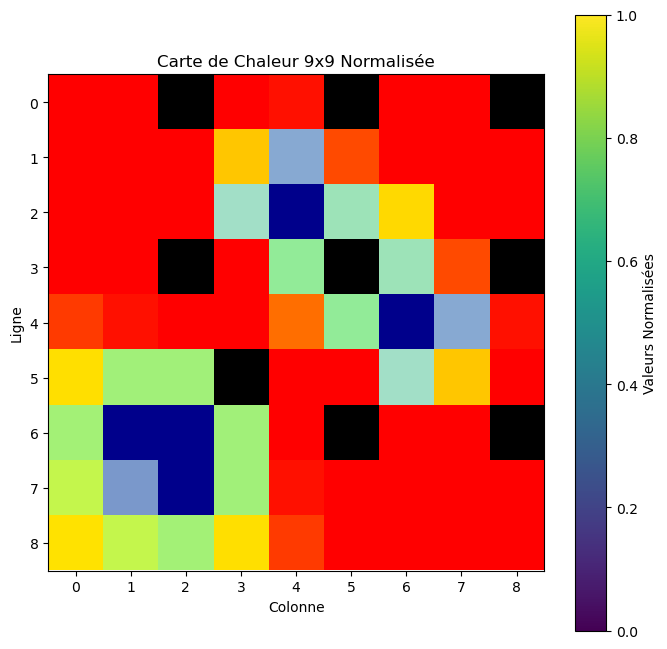

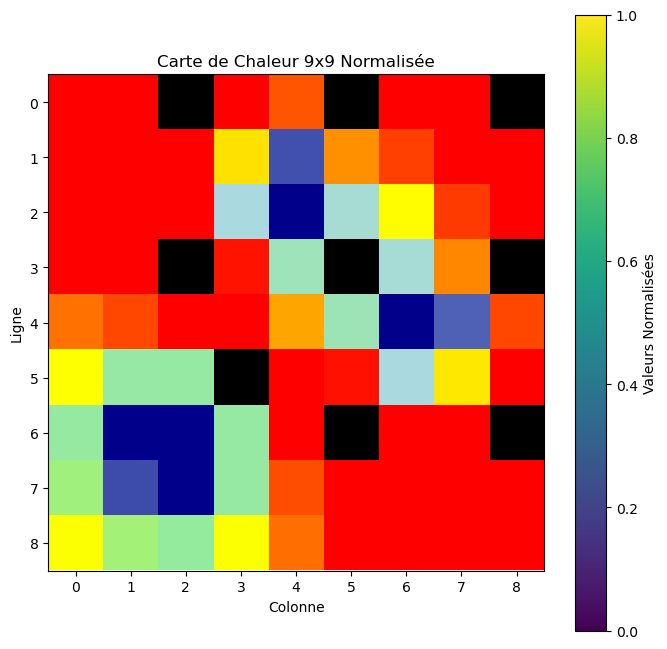

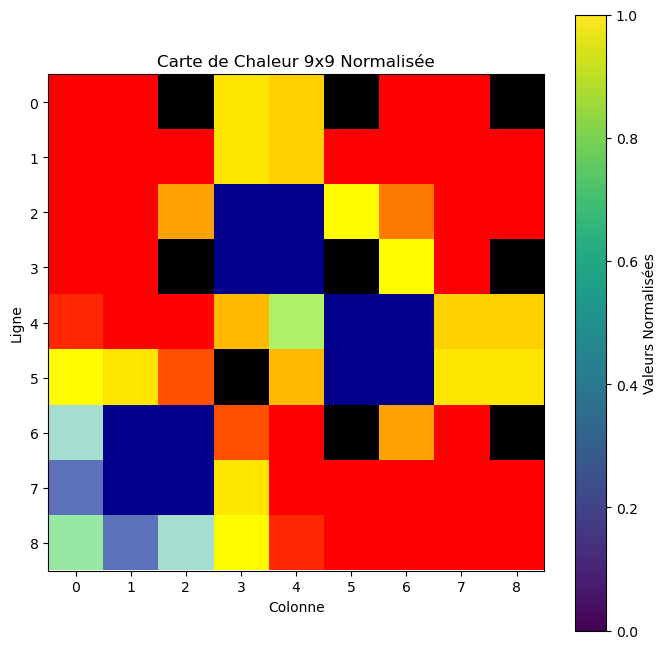

In [21]:
plot_pb('2O')

In [22]:
power_dict_openmc['2A']


array([[0.97591173, 1.01167479, 0.        , 1.03030729, 1.03369002,
        0.        , 1.03481996, 1.03276852, 0.        ],
       [0.97152463, 0.98719168, 1.02558609, 1.00339628, 1.00666164,
        1.03461266, 1.00749791, 1.00640683, 1.03433659],
       [0.96998088, 0.98616645, 1.02500345, 1.0067642 , 1.00808568,
        1.03639338, 1.00787077, 1.00692455, 1.034679  ],
       [0.97323597, 1.0095699 , 0.        , 1.0432891 , 1.04263461,
        0.        , 1.03653363, 1.03510372, 0.        ],
       [0.96362483, 0.98090582, 1.03537979, 1.04946097, 1.02951471,
        1.04383405, 1.00881299, 1.00754508, 1.0335054 ],
       [0.95326315, 0.9636989 , 1.01480773, 0.        , 1.04891348,
        1.0436793 , 1.00877543, 1.00439215, 1.03081788],
       [0.94382305, 0.94732467, 0.97223443, 1.0153483 , 1.03314593,
        0.        , 1.02651874, 1.02417828, 0.        ],
       [0.93996019, 0.93877873, 0.946363  , 0.96364993, 0.98088669,
        1.00824127, 0.9871309 , 0.98558862, 1.01046244],


In [23]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable

def relative_difference_table(pb_num):
    # Extraire les tableaux de référence et de comparaison
    array1 = power_dict_vera[pb_num]
    array2 = power_dict_openmc[pb_num]
    array3 = power_dict_opensn[pb_num]

    # Calculer l'écart relatif des valeurs des arrays 2 et 3 par rapport à array1
    # rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
    # rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)

    rel_diff_array2 = np.where(array1 != 0, array2, 0)
    rel_diff_array3 = np.where(array1 != 0, array3, 0)

    # Initialiser un DataFrame vide avec index et colonnes de 8 à 0
    table = pd.DataFrame(index=range(8, -1, -1), columns=range(8, -1, -1), dtype=object)

    # Remplir le DataFrame avec les écarts relatifs de array2 et array3
    for i in range(9):
        for j in range(9):
            # Formater les écarts relatifs avec les deux valeurs
            value1 = rel_diff_array2[i, j]
            value2 = rel_diff_array3[i, j]
            table.at[j, i] = f"{value1:.2%}\n{value2:.2%}"

    # Remplacer les valeurs NaN par des chaînes vides
    table.fillna('', inplace=True)

    # Créer une instance de PrettyTable
    pretty_table = PrettyTable()

    # Définir les noms des colonnes (8 à 0)
    pretty_table.field_names = ["Row/Col"] + [str(j) for j in range(8, -1, -1)]

    # Ajouter des lignes au PrettyTable avec des lignes horizontales
    for i in range(8, -1, -1):
        row = [str(i)]
        for j in range(8, -1, -1):
            cell_value = str(table.at[i, j])
            if cell_value == '':
                cell_value = ' '  # Remplacer les cellules vides par un espace pour une largeur constante
            row.append(cell_value)
        pretty_table.add_row(row)

        # Ajouter une ligne horizontale entre les lignes (sauf la dernière)
        if i > 0:
            pretty_table.add_row(['-'*len(col) for col in pretty_table.field_names])

    return pretty_table

# Exemple d'utilisation
for pb_num in pb_num_list:
    print(pb_num, relative_difference_table(pb_num))


2A +---------+--------+---------+---------+---------+---------+---------+---------+---------+---------+
| Row/Col |   8    |    7    |    6    |    5    |    4    |    3    |    2    |    1    |    0    |
+---------+--------+---------+---------+---------+---------+---------+---------+---------+---------+
|    8    | 97.47% | 101.05% |  0.00%  | 103.08% | 103.35% |  0.00%  | 103.47% | 103.43% |  0.00%  |
|         | 97.79% | 100.87% |  0.00%  | 100.87% | 102.20% |  0.00%  | 100.87% | 102.64% |  0.00%  |
| ------- |   -    |    -    |    -    |    -    |    -    |    -    |    -    |    -    |    -    |
|    7    | 97.00% |  98.56% | 102.42% | 100.44% | 100.75% | 103.51% | 100.69% | 100.64% | 103.28% |
|         | 97.79% | 100.87% | 101.76% | 100.87% | 102.20% | 102.20% | 100.87% | 102.64% | 102.64% |
| ------- |   -    |    -    |    -    |    -    |    -    |    -    |    -    |    -    |    -    |
|    6    | 97.09% |  98.71% | 102.65% | 100.88% | 100.88% | 103.65% | 100.79% | 100.75%

In [24]:
import numpy as np
import pandas as pd

def relative_difference_table(pb_num):
    # Extraire les tableaux de référence et de comparaison
    array1 = power_dict_vera[pb_num]
    array2 = power_dict_openmc[pb_num]
    array3 = power_dict_opensn[pb_num]

    # Calculer l'écart relatif des valeurs des arrays 2 et 3 par rapport à array1
    rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
    rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)

    # Trouver la position de la plus grande différence dans array3 par rapport à array1
    max_diff_idx = np.unravel_index(np.argmax(np.abs(rel_diff_array3)), rel_diff_array3.shape)

    # Créer un DataFrame pour l'affichage des écarts relatifs
    table = pd.DataFrame(index=range(8, -1, -1), columns=range(8, -1, -1), dtype=object)

    # Remplir le DataFrame avec les écarts relatifs de array2 et array3
    for i in range(9):
        for j in range(9):
            value1 = rel_diff_array2[i, j]
            value2 = rel_diff_array3[i, j]
            table.at[j, i] = f"{value1:.2%}\n{value2:.2%}"

    # Fonction pour colorer la cellule contenant la plus grande différence
    def highlight_max(x):
        color = 'background-color: red'
        df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
        df_styler.iloc[max_diff_idx[0], max_diff_idx[1]] = color
        return df_styler

    # Retourner un DataFrame stylé avec la mise en évidence de la plus grande différence
    return table.style.apply(highlight_max, axis=None).set_properties(**{'text-align': 'center'})

# Exemple d'utilisation
for pb_num in pb_num_list:
    print(pb_num)
    display(relative_difference_table(pb_num))


2A


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.17% 0.16%,-0.17% -0.34%,0.00% 0.00%,-0.19% -2.33%,-0.17% -1.29%,0.00% 0.00%,-0.23% -2.73%,-0.20% -0.97%,0.00% 0.00%
7,-0.22% 0.60%,-0.24% 2.10%,-0.24% -0.88%,-0.09% 0.34%,-0.13% 1.29%,-0.16% -1.43%,-0.24% -0.05%,-0.25% 1.73%,-0.35% -0.97%
6,-0.05% 0.22%,-0.09% 0.76%,-0.15% -2.31%,-0.01% -0.89%,-0.30% 0.13%,-0.20% -2.45%,-0.25% -1.04%,-0.18% -0.05%,-0.22% -2.73%
5,-0.08% 0.41%,-0.32% -0.27%,0.00% 0.00%,-0.20% -3.12%,-0.12% -1.79%,0.00% 0.00%,-0.21% -2.45%,-0.21% -1.43%,0.00% 0.00%
4,-0.15% 0.93%,-0.29% 2.55%,-0.28% -0.08%,-0.26% -1.98%,-0.17% 0.38%,-0.24% -1.79%,-0.37% 0.13%,-0.22% 1.29%,-0.16% -1.29%
3,-0.16% 0.54%,-0.13% 2.72%,-0.26% 0.82%,0.00% 0.00%,-0.20% -1.98%,-0.24% -3.12%,-0.21% -0.89%,-0.19% 0.34%,-0.24% -2.33%
2,-0.19% 0.14%,-0.20% 2.19%,-0.14% 3.16%,-0.31% 0.82%,-0.06% -0.08%,0.00% 0.00%,-0.30% -2.31%,-0.10% -0.88%,0.00% 0.00%
1,-0.01% -0.37%,-0.01% 0.87%,-0.10% 2.19%,-0.12% 2.72%,-0.28% 2.55%,-0.19% -0.27%,-0.19% 0.76%,-0.08% 2.10%,-0.05% -0.34%
0,-0.19% -0.98%,-0.20% -0.37%,-0.21% 0.14%,-0.19% 0.54%,-0.09% 0.93%,-0.07% 0.41%,-0.15% 0.22%,-0.06% 0.60%,-0.05% 0.16%


2B


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.16% 0.32%,-0.07% -0.68%,0.00% 0.00%,-0.12% -1.80%,0.02% -1.21%,0.00% 0.00%,-0.29% -2.31%,-0.15% -1.39%,0.00% 0.00%
7,-0.25% 0.72%,-0.18% 1.42%,-0.13% -1.17%,-0.14% 0.56%,-0.09% 1.11%,-0.12% -1.42%,-0.15% 0.10%,-0.16% 0.97%,-0.11% -1.39%
6,-0.18% 0.30%,-0.31% 0.98%,-0.09% -1.75%,-0.16% -0.61%,-0.02% -0.01%,-0.13% -2.41%,-0.14% -0.86%,-0.09% 0.10%,-0.24% -2.31%
5,-0.03% 0.16%,-0.17% -0.64%,0.00% 0.00%,-0.22% -2.49%,-0.04% -1.61%,0.00% 0.00%,-0.16% -2.41%,-0.20% -1.42%,0.00% 0.00%
4,-0.26% 1.09%,-0.22% 2.43%,-0.04% -0.25%,0.00% -1.66%,-0.07% -0.07%,-0.15% -1.61%,-0.24% -0.01%,-0.11% 1.11%,-0.10% -1.21%
3,-0.15% 0.72%,-0.29% 2.43%,-0.21% 0.65%,0.00% 0.00%,-0.28% -1.66%,-0.22% -2.49%,-0.17% -0.61%,-0.18% 0.56%,-0.18% -1.80%
2,-0.23% 0.28%,-0.28% 1.85%,-0.27% 2.96%,-0.28% 0.65%,-0.19% -0.25%,0.00% 0.00%,-0.32% -1.75%,-0.07% -1.17%,0.00% 0.00%
1,-0.11% -0.24%,-0.19% 1.01%,-0.26% 1.85%,-0.30% 2.43%,-0.24% 2.43%,-0.22% -0.64%,-0.33% 0.98%,-0.27% 1.42%,-0.16% -0.68%
0,-0.06% -1.16%,-0.21% -0.24%,-0.11% 0.28%,-0.16% 0.72%,-0.23% 1.09%,-0.24% 0.16%,-0.28% 0.30%,-0.19% 0.72%,-0.13% 0.32%


2C


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.13% 0.10%,-0.18% -0.41%,0.00% 0.00%,-0.13% -1.95%,-0.26% -1.47%,0.00% 0.00%,-0.14% -2.07%,-0.08% -1.14%,0.00% 0.00%
7,-0.07% 0.51%,-0.13% 1.71%,-0.15% -0.96%,-0.15% 0.39%,-0.12% 0.91%,-0.27% -1.21%,-0.21% 0.36%,-0.20% 1.29%,-0.08% -1.14%
6,-0.10% 0.10%,-0.20% 0.81%,-0.18% -1.94%,-0.20% -0.79%,-0.16% 0.25%,-0.15% -2.17%,-0.18% -0.63%,-0.21% 0.36%,-0.05% -2.07%
5,-0.06% 0.40%,-0.19% -0.41%,0.00% 0.00%,-0.15% -2.65%,-0.12% -1.76%,0.00% 0.00%,-0.17% -2.17%,-0.19% -1.21%,0.00% 0.00%
4,-0.08% 0.92%,-0.16% 2.24%,-0.18% -0.39%,-0.12% -1.81%,-0.12% 0.22%,-0.20% -1.76%,-0.16% 0.25%,-0.16% 0.91%,-0.08% -1.47%
3,-0.11% 0.51%,-0.28% 2.23%,-0.30% 0.88%,0.00% 0.00%,-0.20% -1.81%,-0.10% -2.65%,-0.15% -0.79%,-0.20% 0.39%,-0.13% -1.95%
2,-0.22% 0.03%,-0.28% 2.20%,-0.18% 2.85%,-0.19% 0.88%,-0.25% -0.39%,0.00% 0.00%,-0.13% -1.94%,-0.26% -0.96%,0.00% 0.00%
1,-0.17% -0.46%,-0.21% 0.72%,-0.16% 2.20%,-0.35% 2.23%,-0.34% 2.24%,-0.15% -0.41%,-0.24% 0.81%,-0.23% 1.71%,-0.10% -0.41%
0,-0.17% -0.91%,-0.36% -0.46%,-0.19% 0.03%,-0.27% 0.51%,-0.23% 0.92%,-0.16% 0.40%,-0.23% 0.10%,-0.19% 0.51%,0.01% 0.10%


2D


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.21% 0.19%,-0.23% -0.82%,0.00% 0.00%,-0.08% -1.81%,0.00% -1.30%,0.00% 0.00%,-0.17% -2.37%,-0.09% -1.03%,0.00% 0.00%
7,-0.27% 0.64%,-0.17% 1.35%,-0.09% -0.78%,-0.05% 0.51%,0.02% 1.07%,-0.23% -1.51%,-0.16% -0.01%,-0.26% 1.36%,-0.26% -1.03%
6,-0.17% 0.22%,-0.05% 0.93%,-0.16% -1.80%,-0.22% -0.68%,-0.10% -0.04%,-0.16% -2.51%,-0.09% -0.93%,-0.20% -0.01%,-0.18% -2.37%
5,-0.23% 0.53%,-0.17% -0.27%,0.00% 0.00%,-0.25% -2.46%,-0.14% -1.66%,0.00% 0.00%,-0.10% -2.51%,-0.23% -1.51%,0.00% 0.00%
4,-0.20% 0.98%,-0.28% 2.41%,-0.16% -0.28%,-0.25% -1.68%,-0.25% -0.15%,-0.11% -1.66%,-0.17% -0.04%,-0.10% 1.07%,-0.26% -1.30%
3,-0.22% 0.61%,-0.20% 2.45%,-0.24% 0.59%,0.00% 0.00%,-0.18% -1.68%,-0.08% -2.46%,-0.22% -0.68%,-0.14% 0.51%,-0.32% -1.81%
2,-0.21% 0.15%,-0.21% 1.78%,-0.17% 2.95%,-0.10% 0.59%,-0.16% -0.28%,0.00% 0.00%,-0.10% -1.80%,-0.15% -0.78%,0.00% 0.00%
1,-0.24% -0.29%,-0.28% 0.90%,-0.21% 1.78%,-0.10% 2.45%,-0.09% 2.41%,-0.22% -0.27%,-0.19% 0.93%,-0.33% 1.35%,-0.22% -0.82%
0,-0.12% -0.83%,-0.11% -0.29%,-0.17% 0.15%,-0.16% 0.61%,-0.15% 0.98%,-0.23% 0.53%,-0.22% 0.22%,-0.34% 0.64%,-0.13% 0.19%


2E


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.00% 0.76%,0.07% -0.04%,0.00% 0.00%,0.20% -3.03%,-0.16% -4.40%,0.00% 0.00%,-0.14% 6.23%,0.01% 1.53%,0.00% 0.00%
7,-0.00% 1.82%,0.06% 3.44%,0.00% 1.20%,-0.01% -0.56%,-0.16% -7.83%,-0.03% -4.77%,0.04% 2.53%,-0.00% 3.98%,-0.09% 1.53%
6,-0.06% 1.22%,-0.03% 3.22%,-0.19% 6.46%,0.03% 2.33%,0.06% -0.93%,0.13% -3.14%,0.12% -0.34%,0.01% 2.53%,-0.09% 6.23%
5,0.01% -0.10%,-0.14% -3.95%,0.00% 0.00%,-0.16% 5.30%,0.06% 0.61%,0.00% 0.00%,0.05% -3.14%,-0.09% -4.77%,0.00% 0.00%
4,-0.09% -1.25%,-0.09% -7.69%,-0.19% -4.13%,0.04% 0.00%,0.02% 2.27%,0.12% 0.61%,0.01% -0.93%,-0.13% -7.83%,-0.05% -4.40%
3,-0.04% -0.41%,0.19% -0.19%,-0.05% -0.96%,0.00% 0.00%,0.13% 0.00%,-0.06% 5.30%,-0.11% 2.33%,-0.10% -0.56%,-0.03% -3.03%
2,0.15% 0.11%,0.03% 1.26%,0.01% 2.52%,0.06% -0.96%,0.03% -4.13%,0.00% 0.00%,0.06% 6.46%,-0.06% 1.20%,0.00% 0.00%
1,-0.08% 0.26%,0.20% 0.83%,-0.05% 1.26%,0.05% -0.19%,0.01% -7.69%,-0.12% -3.95%,0.07% 3.22%,0.02% 3.44%,-0.05% -0.04%
0,-0.00% 0.10%,-0.02% 0.26%,0.02% 0.11%,-0.00% -0.41%,0.06% -1.25%,0.01% -0.10%,0.07% 1.22%,-0.02% 1.82%,0.03% 0.76%


2F


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.05% 0.68%,0.02% -3.70%,0.00% 0.00%,0.17% 5.28%,-0.09% -1.62%,0.00% 0.00%,0.10% 7.96%,-0.26% 2.89%,0.00% 0.00%
7,0.14% 0.13%,0.09% -6.60%,0.15% -2.73%,0.17% 1.59%,0.14% -5.04%,-0.04% -0.64%,0.13% 5.86%,0.05% 6.39%,-0.06% 2.89%
6,0.30% 0.45%,0.13% 0.41%,0.05% 4.99%,0.04% 3.06%,0.17% 2.38%,0.06% 6.68%,-0.01% 6.02%,-0.06% 5.86%,-0.09% 7.96%
5,0.32% -0.08%,0.11% -4.18%,0.00% 0.00%,0.06% 6.44%,-0.05% -1.32%,0.00% 0.00%,-0.01% 6.68%,0.03% -0.64%,0.00% 0.00%
4,0.26% -0.60%,0.27% -7.92%,0.13% -4.36%,0.08% 4.67%,0.08% -4.05%,-0.00% -1.32%,0.13% 2.38%,0.11% -5.04%,0.17% -1.62%
3,0.35% -0.45%,0.29% -2.24%,0.10% -5.82%,0.00% 0.00%,-0.08% 4.67%,0.07% 6.44%,-0.08% 3.06%,0.03% 1.59%,0.13% 5.28%
2,0.20% 0.11%,0.21% -1.64%,0.13% -8.18%,0.11% -5.82%,-0.09% -4.36%,0.00% 0.00%,0.09% 4.99%,-0.06% -2.73%,0.00% 0.00%
1,0.16% 0.28%,0.32% 0.01%,0.07% -1.64%,0.28% -2.24%,0.09% -7.92%,-0.01% -4.18%,0.12% 0.41%,0.01% -6.60%,-0.01% -3.70%
0,0.06% 0.44%,0.14% 0.28%,0.34% 0.11%,0.18% -0.45%,0.25% -0.60%,0.25% -0.08%,0.11% 0.45%,0.10% 0.13%,0.26% 0.68%


2G


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.41% 0.84%,0.17% -4.83%,0.00% 0.00%,0.10% 8.19%,0.40% -1.58%,0.00% 0.00%,0.35% 12.19%,0.33% 4.82%,0.00% 0.00%
7,0.38% -0.06%,0.18% -8.73%,0.26% -3.91%,0.13% 2.49%,0.36% -6.54%,0.43% 0.02%,0.27% 9.09%,0.11% 8.65%,0.45% 4.82%
6,0.24% 0.62%,0.29% -0.13%,0.19% 6.18%,0.33% 5.27%,0.27% 4.00%,0.10% 10.68%,0.25% 8.54%,0.36% 9.09%,0.20% 12.19%
5,0.44% 0.25%,0.47% -6.11%,0.00% 0.00%,0.31% 9.52%,0.33% -0.70%,0.00% 0.00%,0.42% 10.68%,0.30% 0.02%,0.00% 0.00%
4,0.49% -1.31%,0.18% -11.06%,0.23% -6.63%,0.18% 7.15%,0.38% -5.09%,0.40% -0.70%,0.32% 4.00%,0.38% -6.54%,0.46% -1.58%
3,0.25% -0.67%,0.35% -3.71%,0.26% -9.52%,0.00% 0.00%,0.24% 7.15%,0.16% 9.52%,0.30% 5.27%,0.19% 2.49%,0.25% 8.19%
2,0.32% 0.16%,0.15% -2.39%,0.26% -11.24%,0.34% -9.52%,0.26% -6.63%,0.00% 0.00%,0.27% 6.18%,0.20% -3.91%,0.00% 0.00%
1,0.25% 0.92%,0.23% -0.32%,0.22% -2.39%,0.31% -3.71%,0.23% -11.06%,0.21% -6.11%,0.24% -0.13%,0.34% -8.73%,0.53% -4.83%
0,0.24% 1.57%,0.28% 0.92%,0.14% 0.16%,0.37% -0.67%,0.32% -1.31%,0.26% 0.25%,0.26% 0.62%,0.08% -0.06%,-0.12% 0.84%


2H


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.41% 1.15%,0.62% -5.08%,0.00% 0.00%,0.50% 8.64%,0.40% -1.13%,0.00% 0.00%,0.42% 13.37%,0.24% 5.83%,0.00% 0.00%
7,0.50% 0.12%,0.51% -9.16%,0.38% -4.38%,0.37% 2.62%,0.23% -6.46%,0.26% 0.63%,0.41% 10.26%,0.41% 9.90%,0.36% 5.83%
6,0.39% 0.66%,0.41% -0.01%,0.33% 6.47%,0.38% 5.65%,0.35% 4.48%,0.35% 11.64%,0.47% 9.70%,0.37% 10.26%,0.40% 13.37%
5,0.42% -0.03%,0.41% -6.23%,0.00% 0.00%,0.46% 9.93%,0.35% -0.38%,0.00% 0.00%,0.32% 11.64%,0.26% 0.63%,0.00% 0.00%
4,0.41% -0.96%,0.28% -11.75%,0.36% -7.46%,0.38% 6.79%,0.43% -5.20%,0.47% -0.38%,0.40% 4.48%,0.40% -6.46%,0.25% -1.13%
3,0.43% -0.13%,0.53% -4.30%,0.29% -10.37%,0.00% 0.00%,0.29% 6.79%,0.33% 9.93%,0.31% 5.65%,0.39% 2.62%,0.30% 8.64%
2,0.38% 0.28%,0.37% -2.82%,0.39% -11.86%,0.36% -10.37%,0.30% -7.46%,0.00% 0.00%,0.28% 6.47%,0.44% -4.38%,0.00% 0.00%
1,0.40% 1.18%,0.50% -0.54%,0.31% -2.82%,0.44% -4.30%,0.24% -11.75%,0.36% -6.23%,0.45% -0.01%,0.34% -9.16%,0.36% -5.08%
0,0.33% 2.15%,0.39% 1.18%,0.35% 0.28%,0.40% -0.13%,0.30% -0.96%,0.48% -0.03%,0.28% 0.66%,0.30% 0.12%,0.41% 1.15%


2I


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.41% 0.01%,-0.50% -0.69%,0.00% 0.00%,-0.11% -2.18%,-0.21% -1.13%,0.00% 0.00%,1.12% -1.88%,3.43% 0.57%,0.00% 0.00%
7,-0.40% 0.45%,-0.36% 1.59%,-0.38% -0.76%,-0.27% 0.32%,-0.13% 1.46%,0.18% -0.96%,0.73% 0.35%,1.80% 1.74%,3.54% 0.57%
6,-0.52% -0.00%,-0.40% 0.67%,-0.47% -2.23%,-0.16% -0.88%,-0.14% 0.29%,-0.00% -2.55%,0.07% -0.59%,0.75% 0.35%,1.01% -1.88%
5,-0.37% 0.34%,-0.34% -0.26%,0.00% 0.00%,-0.33% -2.55%,-0.26% -1.63%,0.00% 0.00%,0.02% -2.55%,0.20% -0.96%,0.00% 0.00%
4,-0.46% 0.71%,-0.51% 2.50%,-0.38% -0.45%,-0.52% -1.82%,-0.30% -0.03%,-0.20% -1.63%,-0.17% 0.29%,-0.05% 1.46%,-0.22% -1.13%
3,-0.42% 0.43%,-0.45% 2.54%,-0.45% 0.89%,0.00% 0.00%,-0.32% -1.82%,-0.25% -2.55%,-0.30% -0.88%,-0.31% 0.32%,-0.31% -2.18%
2,-0.40% -0.05%,-0.46% 2.00%,-0.46% 3.10%,-0.34% 0.89%,-0.46% -0.45%,0.00% 0.00%,-0.31% -2.23%,-0.32% -0.76%,0.00% 0.00%
1,-0.46% -0.54%,-0.44% 0.71%,-0.53% 2.00%,-0.54% 2.54%,-0.56% 2.50%,-0.36% -0.26%,-0.41% 0.67%,-0.32% 1.59%,-0.26% -0.69%
0,-0.42% -1.14%,-0.39% -0.54%,-0.43% -0.05%,-0.39% 0.43%,-0.49% 0.71%,-0.37% 0.34%,-0.54% -0.00%,-0.63% 0.45%,-0.46% 0.01%


2K


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.10% 0.62%,0.23% -3.24%,0.00% 0.00%,0.24% 5.57%,0.17% -1.57%,0.00% 0.00%,0.04% 8.55%,0.16% 2.03%,0.00% 0.00%
7,0.23% 0.10%,0.29% -6.05%,0.17% -2.37%,0.23% 2.10%,0.26% -4.72%,0.04% -0.14%,0.04% 6.87%,0.19% 7.89%,0.14% 2.03%
6,0.22% 0.80%,0.32% 0.49%,0.09% 4.82%,0.12% 3.54%,0.04% 2.77%,0.13% 7.24%,0.02% 6.45%,0.03% 6.87%,0.02% 8.55%
5,0.24% 0.20%,0.26% -3.85%,0.00% 0.00%,-0.04% 6.06%,0.16% -0.61%,0.00% 0.00%,0.15% 7.24%,0.15% -0.14%,0.00% 0.00%
4,0.34% -0.62%,0.32% -7.19%,0.13% -3.67%,0.10% 4.95%,-0.02% -3.32%,0.09% -0.61%,0.20% 2.77%,-0.02% -4.72%,0.06% -1.57%
3,0.33% -0.36%,0.30% -2.00%,0.21% -5.86%,0.00% 0.00%,0.05% 4.95%,0.11% 6.06%,0.14% 3.54%,0.10% 2.10%,0.03% 5.57%
2,0.42% -2.33%,0.24% -2.02%,0.25% -8.05%,0.13% -5.86%,-0.01% -3.67%,0.00% 0.00%,0.02% 4.82%,0.05% -2.37%,0.00% 0.00%
1,0.29% -1.69%,0.25% -2.44%,0.28% -2.02%,0.21% -2.00%,0.15% -7.19%,0.06% -3.85%,0.31% 0.49%,0.16% -6.05%,0.13% -3.24%
0,0.27% -0.92%,0.17% -1.69%,0.17% -2.33%,0.23% -0.36%,0.19% -0.62%,0.10% 0.20%,0.28% 0.80%,0.35% 0.10%,0.45% 0.62%


2J


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.01% 0.60%,-0.24% -3.79%,0.00% 0.00%,-0.02% 5.28%,0.08% -1.58%,0.00% 0.00%,1.87% 8.88%,4.54% 5.03%,0.00% 0.00%
7,-0.15% -0.03%,-0.19% -6.64%,0.04% -2.73%,0.00% 1.54%,0.03% -4.95%,0.28% -0.26%,1.14% 6.29%,2.62% 6.97%,4.46% 5.03%
6,-0.14% 0.28%,-0.26% 0.32%,-0.28% 4.89%,-0.20% 3.06%,-0.22% 2.34%,0.21% 6.93%,0.63% 6.12%,1.16% 6.29%,1.68% 8.88%
5,-0.10% -0.24%,-0.25% -4.22%,0.00% 0.00%,-0.19% 6.34%,-0.09% -1.37%,0.00% 0.00%,0.23% 6.93%,0.32% -0.26%,0.00% 0.00%
4,-0.16% -0.76%,-0.13% -8.04%,-0.20% -4.50%,-0.14% 4.58%,-0.12% -4.24%,-0.10% -1.37%,-0.01% 2.34%,0.17% -4.95%,-0.04% -1.58%
3,-0.03% -0.53%,-0.24% -2.41%,-0.35% -5.99%,0.00% 0.00%,-0.24% 4.58%,-0.12% 6.34%,-0.06% 3.06%,0.12% 1.54%,-0.05% 5.28%
2,-0.12% -0.01%,0.02% -1.72%,-0.11% -8.26%,-0.29% -5.99%,-0.19% -4.50%,0.00% 0.00%,-0.11% 4.89%,-0.08% -2.73%,0.00% 0.00%
1,-0.17% 0.65%,-0.03% -0.15%,-0.23% -1.72%,-0.15% -2.41%,-0.32% -8.04%,-0.09% -4.22%,-0.14% 0.32%,-0.12% -6.64%,-0.26% -3.79%
0,-0.12% 0.84%,-0.05% 0.65%,-0.05% -0.01%,-0.18% -0.53%,-0.13% -0.76%,-0.10% -0.24%,-0.10% 0.28%,-0.12% -0.03%,-0.15% 0.60%


2L


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.03% -2.13%,-0.14% 4.10%,0.00% 0.00%,0.16% -4.15%,0.10% 3.45%,0.00% 0.00%,0.17% -3.78%,0.09% 3.73%,0.00% 0.00%
7,-0.00% -2.61%,0.08% -1.55%,0.06% 5.20%,-0.09% -1.75%,0.00% -1.54%,0.04% 5.06%,0.14% -0.64%,0.07% -1.32%,0.35% 3.73%
6,-0.04% -1.33%,0.21% -1.77%,-0.03% -3.58%,0.07% -0.17%,0.03% -1.16%,0.07% -4.88%,-0.13% 5.60%,-0.05% -0.64%,0.10% -3.78%
5,0.05% -2.10%,0.03% 5.65%,0.00% 0.00%,-0.05% 4.03%,0.08% 6.70%,0.00% 0.00%,0.19% -4.88%,-0.06% 5.06%,0.00% 0.00%
4,-0.00% -2.42%,0.02% -1.61%,-0.25% 1.98%,-0.04% 1.49%,-0.03% -0.33%,-0.03% 6.70%,0.06% -1.16%,-0.01% -1.54%,0.14% 3.45%
3,0.15% -1.54%,0.02% -1.79%,-0.03% -3.82%,0.00% 0.00%,0.07% 1.49%,-0.20% 4.03%,0.00% -0.17%,-0.02% -1.75%,-0.02% -4.15%
2,-0.08% -0.62%,-0.02% -1.03%,0.03% 7.49%,-0.07% -3.82%,-0.07% 1.98%,0.00% 0.00%,-0.01% -3.58%,-0.05% 5.20%,0.00% 0.00%
1,-0.09% 0.65%,0.11% -1.88%,0.04% -1.03%,0.12% -1.79%,0.01% -1.61%,0.13% 5.65%,-0.00% -1.77%,-0.06% -1.55%,0.15% 4.10%
0,-0.05% 8.07%,0.09% 0.65%,-0.00% -0.62%,0.08% -1.54%,-0.04% -2.42%,-0.01% -2.10%,-0.02% -1.33%,0.00% -2.61%,-0.02% -2.13%


2M


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.03% -2.72%,-0.01% 3.06%,0.00% 0.00%,0.03% 2.15%,-0.01% 3.13%,0.00% 0.00%,0.07% 1.82%,0.13% 3.08%,0.00% 0.00%
7,0.18% 3.95%,0.17% -1.65%,0.19% 3.19%,-0.02% -3.24%,0.08% -2.26%,0.04% 3.08%,-0.01% -3.54%,0.04% -2.44%,0.05% 3.08%
6,0.00% -2.99%,0.13% -3.71%,0.27% 1.97%,0.24% -0.94%,0.01% -3.24%,0.20% 2.05%,0.09% -0.85%,0.00% -3.54%,0.16% 1.82%
5,0.09% -2.02%,0.18% 2.94%,0.00% 0.00%,0.16% 2.64%,0.31% 3.85%,0.00% 0.00%,0.17% 2.05%,0.07% 3.08%,0.00% 0.00%
4,0.09% 4.09%,0.15% -1.42%,0.14% 2.26%,0.12% 1.12%,0.22% -1.23%,0.20% 3.85%,0.09% -3.24%,0.19% -2.26%,0.11% 3.13%
3,0.14% -3.44%,-0.01% -3.05%,0.26% 2.08%,0.00% 0.00%,0.05% 1.12%,0.03% 2.64%,0.18% -0.94%,-0.03% -3.24%,-0.06% 2.15%
2,0.16% -3.77%,0.24% 3.85%,0.09% -0.72%,0.18% 2.08%,0.05% 2.26%,0.00% 0.00%,0.12% 1.97%,0.16% 3.19%,0.00% 0.00%
1,0.29% -3.26%,0.18% -3.96%,0.12% 3.85%,0.21% -3.05%,0.24% -1.42%,0.13% 2.94%,0.11% -3.71%,0.08% -1.65%,0.22% 3.06%
0,0.23% 5.81%,0.26% -3.26%,0.14% -3.77%,0.11% -3.44%,0.17% 4.09%,0.16% -2.02%,-0.01% -2.99%,0.13% 3.95%,0.06% -2.72%


2O


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,-0.66% -1.14%,-0.65% -2.32%,0.00% 0.00%,-0.79% -5.34%,-0.61% -2.63%,0.00% 0.00%,-0.78% -2.67%,-0.71% -1.84%,0.00% 0.00%
7,-0.49% -0.62%,-0.58% 0.16%,-0.56% -3.00%,-0.73% -0.71%,-0.68% 5.64%,-0.72% 0.88%,-0.72% 0.92%,-0.86% 1.27%,-0.86% -1.84%
6,-0.66% -1.20%,-0.64% -0.69%,-0.61% -4.83%,-0.62% -8.27%,-1.43% 134.53%,-0.68% 3.04%,-0.76% 1.68%,-0.80% 0.92%,-0.70% -2.67%
5,-0.48% -0.83%,-0.62% -2.02%,0.00% 0.00%,-0.71% -13.66%,-0.70% -8.29%,0.00% 0.00%,-0.66% 3.04%,-0.83% 0.88%,0.00% 0.00%
4,-0.61% 0.20%,-0.71% 1.62%,-0.73% -1.76%,-0.62% -5.18%,-0.67% -3.98%,-0.81% -8.29%,-1.44% 134.53%,-0.84% 5.64%,-0.78% -2.63%
3,-0.71% -0.64%,-0.73% 2.23%,-0.73% 4.73%,0.00% 0.00%,-0.71% -5.18%,-0.75% -13.66%,-0.59% -8.27%,-0.58% -0.71%,-0.58% -5.34%
2,-0.66% -1.80%,-0.63% -4.74%,-1.38% 139.31%,-0.75% 4.73%,-0.61% -1.76%,0.00% 0.00%,-0.60% -4.83%,-0.66% -3.00%,0.00% 0.00%
1,-0.61% -3.88%,-0.71% -11.13%,-0.66% -4.74%,-0.76% 2.23%,-0.63% 1.62%,-0.56% -2.02%,-0.59% -0.69%,-0.62% 0.16%,-0.77% -2.32%
0,-0.69% -3.03%,-0.69% -3.88%,-0.72% -1.80%,-0.65% -0.64%,-0.66% 0.20%,-0.64% -0.83%,-0.78% -1.20%,-0.66% -0.62%,-0.50% -1.14%


2P


/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:11: RuntimeWarning: invalid value encountered in divide
  rel_diff_array2 = np.where(array1 != 0, (array2 - array1) / array1, 0)
/var/folders/_y/lr9yy4fs6b59m644y01wkfn40000gt/T/ipykernel_29388/861995690.py:12: RuntimeWarning: invalid value encountered in divide
  rel_diff_array3 = np.where(array1 != 0, (array3 - array1) / array1, 0)


,8,7,6,5,4,3,2,1,0
8,0.31% -1.75%,0.34% -3.42%,0.00% 0.00%,-0.60% 120.80%,0.05% 2.40%,0.00% 0.00%,0.08% -3.37%,0.28% -8.53%,0.00% 0.00%
7,0.15% -0.04%,0.21% -0.05%,0.32% -11.63%,0.27% -6.90%,0.11% 0.87%,0.00% -0.87%,0.08% 4.72%,0.20% -3.82%,0.10% -8.53%
6,0.16% 0.47%,0.22% 4.56%,0.16% -2.41%,0.28% -2.36%,0.06% -1.23%,0.14% -7.90%,-0.55% 124.63%,0.12% 4.72%,0.11% -3.37%
5,0.26% -4.97%,-0.51% 124.82%,0.00% 0.00%,0.24% -2.57%,0.16% 0.60%,0.00% 0.00%,0.24% -7.90%,0.11% -0.87%,0.00% 0.00%
4,0.21% -10.45%,0.05% -3.91%,0.12% -0.55%,0.16% -7.66%,-0.69% 124.54%,0.17% 0.60%,-0.01% -1.23%,0.20% 0.87%,0.04% 2.40%
3,0.33% -3.68%,0.17% -0.49%,0.04% 1.94%,0.00% 0.00%,0.05% -7.66%,0.03% -2.57%,0.04% -2.36%,0.25% -6.90%,-0.66% 120.80%
2,0.37% -3.27%,0.15% -6.43%,-0.72% 123.35%,0.17% 1.94%,-0.02% -0.55%,0.00% 0.00%,0.13% -2.41%,0.06% -11.63%,0.00% 0.00%
1,0.19% -4.27%,0.21% -11.88%,0.22% -6.43%,0.17% -0.49%,-0.02% -3.91%,-0.61% 124.82%,0.04% 4.56%,0.13% -0.05%,0.15% -3.42%
0,0.29% -3.90%,0.18% -4.27%,0.25% -3.27%,0.15% -3.68%,0.15% -10.45%,-0.04% -4.97%,0.06% 0.47%,0.03% -0.04%,0.19% -1.75%
